In [4]:
#This creates a datetime to represent "now".

from datetime import datetime
d1 = datetime.now()

In [5]:
import pickle
import spacy
import pandas as pd
from openie import StanfordOpenIE
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import random
from nltk.sentiment import SentimentIntensityAnalyzer
import scipy
import netgraph
import torch
from torch_geometric.data import Data
from torch_geometric.utils.convert import from_networkx
import dateutil.parser as dparser
import yfinance as yf
import datetime
import numpy as np

In [8]:
#This creates a list of pre-built multi-article knowledge graphs, generated seperately. 
#This simply saves us time when we would otherwise have to recompute everything.
#If you're wondering where 2005 went, the file that contains 2005 data had an issue loading.

multiArticleKgs = []

Arts2005 = []
Arts2008 = [2, 12, 16, 17, 18, 21, 76, 176, 257, 300, 356, 405, 674, 681, 695, 699, 704, 710, 711, 712, 782, 913, 925, 993, 1000, 1070, 1075, 1076, 1077, 1081, 1110, 1130, 1137, 1142, 1164, 1169, 1194, 1295, 1349, 1366, 1388, 1390, 1398, 1410, 1424, 1426, 1438, 1439, 1506, 1511, 1554, 1566, 1582, 1595, 1604, 1606, 1608, 1612, 1620, 1637, 1643, 1671, 1678, 1690, 1740, 1751, 1756, 1757, 1762, 1776, 1792, 1794, 1795, 1796, 1797, 1829, 1847, 1853, 1856, 1881, 1898, 1901, 1917, 1942, 1976, 1983, 1995, 2005, 2020, 2027, 2031, 2038, 2055, 2059, 2069, 2074, 2088, 2100, 2105, 2108, 2148, 2150, 2161, 2202, 2206, 2210, 2217, 2220, 2226, 2234, 2235, 2236, 2246, 2270, 2283, 2320, 2329, 2330, 2354, 2375, 2407, 2422, 2436, 2463, 2492, 2540, 2542, 2544, 2547, 2593, 2594, 2596, 2608, 2615, 2617, 2618, 2621, 2623, 2624, 2666, 2669, 2670, 2689, 2691, 2699, 2705, 2709, 2758, 2777, 2782, 2826, 2879, 2976, 3051, 3068, 3073, 3098, 3107, 3116, 3118, 3122, 3141, 3147, 3148, 3149, 3150, 3165, 3173, 3201, 3202, 3204, 3207, 3214, 3218, 3244, 3258, 3260, 3272, 3276, 3285, 3330, 3332, 3334, 3335, 3352, 3353, 3354, 3359, 3366, 3370, 3403, 3415, 3417, 3419, 3422, 3426, 3446, 3458, 3459, 3474, 3476, 3477, 3519, 3551, 3566, 3568, 3584, 3586, 3604, 3616, 3617, 3627, 3647, 3660, 3672, 3726, 3745, 3746, 3766, 3789, 3822, 3827, 3843, 3853, 3865, 3869, 3922, 3930, 3934, 3962, 3966, 3967, 3970, 3971, 3972, 3973, 4021, 4060, 4078, 4100, 4108, 4116, 4129, 4151, 4162, 4170, 4186, 4192, 4206, 4212, 4231, 4251, 4255, 4286, 4290, 4307, 4325, 4333, 4335, 4336, 4348, 4351, 4364, 4386, 4390, 4391, 4397, 4423, 4425, 4427, 4436, 4455, 4478, 4480, 4490, 4500, 4532, 4543, 4547, 4586, 4592, 4606, 4618, 4631, 4633, 4634, 4637, 4639, 4650, 4672, 4687, 4691, 4715, 4718, 4725, 4754, 4761, 4770, 4793, 4818, 4833, 4837, 4839, 4844, 4858, 4861, 4874, 4890, 4891, 4904, 4974, 4986, 5073, 5249, 5270, 5271, 5275, 5493, 5504, 5517, 5520, 5533, 5606, 5713, 5722, 5754, 5759, 5772, 5827, 5828, 5862, 5900, 5943, 6006, 6030, 6079, 6082, 6119, 6159, 6236, 6243, 6325, 6326, 6339, 6356, 6372, 6377, 6406, 6451, 6531, 6557, 6630, 6632, 6643, 6703, 6711, 6716, 6754, 6794, 6796, 6824, 6825, 6828, 6831, 6841, 6917, 6946, 6956, 6958, 6996, 7007, 7020, 7042, 7048, 7061, 7115, 7137, 7150, 7194, 7204, 7209, 7245, 7257, 7275, 7318, 7331, 7333, 7336, 7337, 7361, 7384, 7394, 7404, 7424, 7441, 7531, 7533, 7544, 7553, 7568, 7589, 7631, 7661, 7693, 7703, 7735, 7752, 7753, 7761, 7786, 7794, 7795, 7804, 7837, 7838, 7840, 7867, 7870, 7877, 7882, 7915, 7918, 7931, 7940, 7942, 7949, 7961, 7967, 7972, 7985, 8004, 8008, 8055, 8060, 8068, 8087, 8103, 8115, 8125, 8202, 8209, 8211, 8216, 8217, 8251, 8254, 8268, 8296, 8327, 8328, 8330, 8353, 8394, 8458, 8459, 8467, 8500, 8517, 8638, 8645, 8676, 8694, 8701, 8705, 8719, 8743, 8763, 8786, 8835, 8870, 8920, 8924, 8932, 8991, 8998, 9006, 9013, 9014, 9015, 9051, 9072, 9115, 9149, 9195, 9215, 9258, 9281, 9308, 9313, 9339, 9345, 9348, 9351, 9361, 9362, 9363, 9408, 9412, 9413, 9451, 9481, 9513, 9523, 9528, 9539, 9544, 9554, 9562, 9565, 9570, 9582, 9612, 9640, 9651, 9660, 9683, 9693, 9732, 9750, 9784, 9833, 9845, 9848, 9849, 9862, 9867, 9872, 9882, 9887, 9900, 9953, 9994, 10045, 10067, 10083, 10215, 10219, 10235, 10270, 10285, 10311, 10317, 10321, 10322, 10323, 10327, 10334, 10346, 10360, 10395, 10402, 10509, 10520, 10531, 10582, 10599, 10604, 10608, 10611, 10621, 10623, 10631, 10636, 10647, 10675, 10678, 10692, 10717, 10719, 10782, 10831, 10833, 10840, 10857, 10874, 10923, 10928, 10933, 10946, 10958, 10973, 10994, 11003, 11026, 11034, 11043, 11044, 11045, 11046, 11048, 11049, 11064, 11083, 11121, 11126, 11137, 11142, 11150, 11172, 11209, 11214, 11229, 11243, 11251, 11257, 11293, 11308, 11319, 11322, 11333, 11372, 11383, 11393, 11405, 11420, 11435, 11446, 11447, 11448, 11449, 11451, 11472, 11535, 11543, 11549, 11584, 11588, 11602, 11605, 11618, 11622, 11636, 11643, 11650, 11654, 11657, 11667, 11690, 11714, 11723, 11743, 11749, 11762, 11766, 11769, 11774, 11793, 11804, 11813, 11838, 11988, 11998, 12003, 12155, 12156, 12196, 12200, 12209, 12231, 12244, 12246, 12303, 12324, 12359, 12360, 12372, 12375, 12405, 12434, 12482, 12491, 12521, 12539, 12541, 12581, 12615, 12622, 12626, 12669, 12680, 12700, 12706, 12724, 12773, 12778, 12780, 12792, 12825, 12834, 12835, 12837, 12839, 12840, 12869, 12891, 12893, 12929, 12936, 12941, 12960, 13010, 13046, 13053, 13060, 13128, 13136, 13197, 13201, 13202, 13203, 13205, 13237, 13238, 13251, 13258, 13260, 13272, 13277, 13290, 13302, 13304, 13450, 13451, 13453, 13458, 13462, 13470, 13471, 13476, 13479, 13480, 13491, 13494, 13496, 13499, 13504, 13511, 13512, 13594, 13604, 13618, 13619, 13636, 13646, 13655, 13661, 13673, 13677, 13679, 13681, 13688, 13827, 14442, 14444, 14504, 14507, 14509, 15897, 15922, 15976, 15986, 15989, 16001, 16006, 16009, 16017, 16019, 16021, 16027, 16030, 16032, 16039, 16048, 16082, 16086, 16089, 16090, 16091, 16097, 16103, 16107, 16119, 16124, 16125, 16138, 16144, 16148, 16151, 16152, 16157, 16160, 16181, 16211, 16215, 16217, 16228, 16231, 16239, 16343, 16383, 16405, 16440, 16441, 16510, 16579, 16580, 16607, 16639, 16652, 16677, 16762, 16767, 16777, 16794, 16804, 16806, 16810, 16848, 16849, 16877, 16932, 17020, 17053, 17070, 17073, 17112, 17145, 17146, 17149, 17156, 17157, 17162, 17166, 17170, 17183, 17197, 17200, 17251, 17252, 17263, 17267, 17268, 17269, 17271, 17299, 17306, 17315, 17326, 17338, 17355, 17367, 17391, 17397, 17429, 17434, 17453, 17462, 17482, 17487, 17492, 17506, 17508, 17517, 17538, 17564, 17567, 17575, 17576, 17590, 17607, 17628, 17639, 17679, 17691, 17693, 17701, 17705, 17708, 17721, 17732, 17735, 17753, 17757, 17760, 17768, 17774, 17777, 17782, 17808, 17809, 17818, 17824, 17834, 17837, 17852, 17871, 17873, 17876, 17877, 17888, 17889, 17896, 17914, 17921, 17922, 17928, 17932, 17965, 17966, 17971, 17977, 17981, 18002, 18006, 18029, 18034, 18048, 18050, 18054, 18074, 18079, 18126, 18157, 18167, 18183, 18187, 18211, 18213, 18268, 18269, 18284, 18299, 18302, 18312, 18333, 18340, 18341, 18362, 18367, 18390, 18422, 18439, 18449, 18459, 18471, 18473, 18493, 18523, 18542, 18546, 18557, 18568, 18575, 18592, 18624, 18643, 18654, 18665, 18668, 18688, 18721, 18742, 18821, 18854, 18859, 18869, 18880, 18894, 18895, 18902, 18989, 19002, 19005, 19025, 19026, 19028, 19029, 19030, 19056, 19078, 19096, 19105, 19114, 19129, 19132, 19151, 19158, 19184, 19215, 19247, 19254, 19268, 19274, 19351, 19352, 19353, 19380, 19385, 19395, 19404, 19413, 19433, 19434, 19461, 19463, 19469, 19475, 19479, 19481, 19499, 19501, 19506, 19521, 19536, 19542, 19557, 19576, 19580, 19581, 19584, 19599, 19602, 19608, 19615, 19638, 19645, 19687, 19694, 19741, 19749, 19779, 19805, 19920, 19931, 19939, 19956, 19960, 19962, 20084, 20105, 20116, 20127, 20144, 20169, 20179, 20212, 20213, 20214, 20311, 20325, 20351, 20356, 20357, 20358, 20462, 20491, 20614, 20634, 20645, 20679, 20686, 20704, 20711, 20747, 20766, 20770, 20772, 20776, 20779, 20834, 20849, 20877, 20926, 20937, 20942, 20956, 20968, 20971, 21001, 21006, 21017, 21036, 21050, 21051, 21064, 21066, 21094, 21095, 21107, 21140, 21144, 21179, 21196, 21223, 21227, 21236, 21272, 21279, 21289, 21291, 21326, 21330, 21345, 21360, 21365, 21394, 21401, 21407, 21502, 21503, 21507, 21527, 21539, 21552, 21566, 21577, 21587, 21592, 21593, 21626, 21656, 21685, 21704, 21723, 21733, 21785, 21829, 21834, 21836, 21898, 21947, 21950, 21955, 21968, 21970, 21972, 21975, 21977, 21978, 21979, 21987, 21988, 21994, 21995, 21996, 22000, 22002, 22019, 22021, 22033, 22053, 22083, 22105, 22113, 22140, 22160, 22164, 22174, 22274, 22288, 22290, 22297, 22305, 22307, 22309, 22323, 22337, 22339, 22342, 22352, 22365, 22370, 22417, 22423, 22590, 22644, 22645, 22661, 22687, 22779, 22847, 22896, 22925, 22944, 22955, 22967, 22968, 22998, 23017, 23042, 23070, 23083, 23120, 23123, 23127, 23261, 23265, 23296, 23382, 23390, 23430, 23434, 23483, 23494, 23507, 23554, 23565, 23579, 23599, 23641, 23644, 23652, 23676, 23691, 23705, 23710, 23712, 23719, 23734, 23752, 23757, 23772, 23777, 23781, 23798, 23813, 23825, 23923, 23936, 23976, 23981, 24008, 24055, 24056, 24063, 24066, 24072, 24117, 24139, 24204, 24240, 24263, 24267, 24275, 24280, 24285, 24294, 24315, 24327, 24340, 24378, 24408, 24462, 24463, 24466, 24476, 24483, 24494, 24495, 24513, 24536, 24576, 24583, 24584, 24624, 24627, 24656, 24679, 24683, 24684, 24744, 24747, 24756, 24768, 24775, 24780, 24783, 24789, 24806, 24813, 24822, 24847, 24853, 24872, 24898, 24913, 24931, 24984, 25011, 25037, 25064, 25067, 25082, 25084, 25089, 25159, 25190, 25202, 25268, 25287, 25299, 25300, 25303, 25308, 25319, 25340, 25345, 25359, 25365, 25376, 25380, 25410, 25441, 25459, 25460, 25478, 25486, 25502, 25508, 25520, 25617, 25690, 25694, 25739, 25740, 25766, 25773, 25786, 25844, 25846, 25881, 25882, 25891, 25895, 25909, 25944, 25976, 25983, 26010, 26011, 26020, 26037, 26042, 26051, 26090, 26093, 26095, 26096, 26097, 26123, 26128, 26134, 26137, 26149, 26209, 26239, 26241, 26243, 26249, 26261, 26263, 26305, 26386, 26397, 26410, 26418, 26423, 26431, 26453, 26462, 26525, 26527, 26549, 26565, 26582, 26592, 26604, 26607, 26656, 26670, 26687, 26688, 26777, 26791, 26792, 26793, 26796, 26797, 26798, 26800, 26823, 26850, 26854, 26869, 26890, 26903, 26904, 26933, 26949, 26968, 26971, 27015, 27028, 27035, 27049, 27052, 27058, 27060, 27079, 27105, 27156, 27165, 27182, 27188, 27235, 27238, 27304, 27310, 27312, 27321, 27351, 27352, 27353, 27355, 27356, 27357, 27358, 27361, 27377, 27381, 27382, 27391, 27421, 27476, 27500, 27525, 27598, 27605, 27610, 27612, 27639, 27658, 27682, 27707, 27708, 27715, 27721, 27723, 28184, 28207, 28208, 28220, 28227, 28262, 28276, 28307, 28336, 28337, 28416, 28418, 28481, 28545, 28550, 28569, 28601, 28642, 28644, 28647, 28648, 28729, 28747, 28748, 28809, 28822, 28834, 28839, 28846, 28873, 28899, 28979, 28992, 28996, 29026, 29029, 29039, 29061, 29080, 29108, 29113, 29138, 29139, 29158, 29175, 29177, 29212, 29279, 29288, 29317, 29320, 29327, 29332, 29333, 29359, 29363, 29427, 29500, 29537, 29557, 29591, 29633, 29645, 29678, 29680, 29697, 29719, 29747, 29806, 29824, 29910, 29919, 29937, 29963, 30000, 30011, 30029, 30032, 30033, 30057, 30100, 30111, 30123, 30132, 30135, 30136, 30148, 30155, 30210, 30254, 30256, 30268, 30316, 30368, 30372, 30377, 30414, 30420, 30426, 30450, 30475, 30501, 30554, 30591, 30620, 30644, 30647, 30651, 30654, 30660, 30664, 30665, 30667, 30677, 30696, 30726, 30730, 30731, 30749, 30750, 30802, 30808, 30810, 30822, 30833, 30861, 30866, 30877, 30887, 30892, 30905, 30911, 30917, 30923, 30928, 30949, 30956, 30966, 30970, 31223, 31368, 31371, 31373, 31453, 31469, 31480, 31485, 31580, 31893, 31990, 32054, 32121, 32160, 32166, 32174, 32227, 32287, 32304, 32313, 32331, 32340, 32350, 32461, 32529, 32592, 32666, 32675, 32781, 32814, 32815, 32855, 32906, 32934, 32943, 32999, 33023, 33038, 33097, 33100, 33155, 33171, 33175, 33220, 33255, 33275, 33318, 33341, 33381, 33416, 33445, 33451, 33466, 33486, 33509, 33527, 33541, 33543, 33547, 33553, 33560, 33565, 33574, 33583, 33584, 33601, 33623, 33630, 33660, 33679, 33686, 33700, 33702, 33715, 33732, 33769, 33778, 33793, 33797, 33798, 33822, 33837, 33857, 33899, 33919, 33936, 33937, 33939, 33946, 33995, 33996, 34038, 34061, 34099, 34102, 34106, 34111, 34133, 34138, 34176, 34177, 34181, 34204, 34215, 34238, 34291, 34292, 34309, 34312, 34328, 34344, 34351, 34352, 34360, 34376, 34377, 34385, 34396, 34397, 34401, 34417, 34420, 34425, 34444, 34445, 34446, 34455, 34467, 34502, 34507, 34525, 34526, 34548, 34555, 34559, 34587, 34663, 34671, 34721, 34728, 34778, 34798, 34815, 34826, 34838, 34902, 34935, 34962, 34997, 35040, 35097, 35166, 35167, 35169, 35170, 35177, 35208, 35226, 35238, 35259, 35262, 35278, 35286, 35291, 35295, 35347, 35356, 35374, 35378, 35384, 35401, 35402, 35417, 35433, 35476, 35504, 35507, 35535, 35569, 35572, 35606, 35608, 35615, 35617, 35625, 35645, 35678, 35688, 35705, 35723, 35724, 35728, 35741, 35742, 35758, 35759, 35765, 35773, 35832, 35836, 35837, 35838, 35840, 35841, 35850, 35866, 35886, 35911, 35923, 35936, 35938, 35941, 35955, 35998, 36010, 36053, 36054, 36061, 36067, 36076, 36078, 36098, 36103, 36112, 36115, 36119, 36148, 36155, 36165, 36217, 36218, 36242, 36285, 36288, 36345, 36371, 36377, 36390, 36423, 36442, 36457, 36461, 36468, 36471, 36472, 36473, 36474, 36477, 36489, 36518, 36525, 36559, 36570, 36633, 36645, 36700, 36725, 36769, 36780, 36791, 36800, 36814, 36838, 36865, 36870, 36886, 36894, 37218, 37220, 37254, 37292, 37328, 37337, 37363, 37433, 37446, 37458, 37461, 37523]
Arts2004 = [11, 13, 36, 45, 47, 51, 69, 81, 119, 124, 125, 131, 206, 250, 331, 338, 351, 390, 422, 454, 469, 473, 513, 592, 614, 615, 676, 685, 696, 703, 705, 707, 709, 713, 714, 725, 730, 732, 738, 740, 749, 755, 800, 806, 807, 819, 848, 863, 910, 941, 949, 959, 979, 998, 1114, 1143, 1161, 1162, 1182, 1194, 1235, 1237, 1246, 1431, 1505, 1533, 1535, 1555, 1562, 1581, 1617, 1662, 1693, 1696, 1702, 1703, 1739, 1749, 1759, 1782, 1798, 1804, 1822, 1825, 1862, 1868, 1880, 1915, 1956, 1959, 1974, 1983, 1985, 2002, 2049, 2098, 2110, 2119, 2123, 2174, 2189, 2204, 2217, 2250, 2252, 2258, 2275, 2278, 2294, 2297, 2323, 2336, 2351, 2359, 2368, 2400, 2401, 2437, 2457, 2464, 2467, 2540, 2553, 2561, 2567, 2576, 2588, 2611, 2614, 2661, 2668, 2674, 2686, 2691, 2694, 2696, 2702, 2733, 2759, 2764, 2770, 2777, 2778, 2804, 2813, 2817, 2824, 2827, 2847, 2914, 2918, 2929, 2930, 2993, 3028, 3038, 3042, 3045, 3055, 3057, 3058, 3069, 3171, 3185, 3298, 3304, 3333, 3385, 3392, 3405, 3419, 3459, 3469, 3500, 3518, 3594, 3599, 3628, 3632, 3637, 3663, 3669, 3678, 3687, 3717, 3743, 3793, 3796, 3818, 3833, 3844, 3846, 3857, 3862, 3964, 3986, 4034, 4051, 4057, 4162, 4186, 4310, 4312, 4313, 4314, 4327, 4328, 4336, 4338, 4351, 4355, 4360, 4361, 4362, 4363, 4413, 4470, 4511, 4588, 4652, 4711, 4716, 4770, 4771, 4774, 4777, 4785, 4799, 4817, 4824, 4841, 4843, 4846, 4848, 4849, 4850, 4855, 4866, 4912, 4915, 4920, 4921, 4924, 4940, 4943, 4947, 4952, 4956, 4962, 4986, 4987, 4988, 4990, 4991, 5001, 5059, 5168, 5173, 5208, 5216, 5217, 5252, 5266, 5275, 5325, 5328, 5334, 5337, 5343, 5346, 5352, 5380, 5391, 5455, 5502, 5508, 5511, 5530, 5533, 5535, 5536, 5577, 5599, 5609, 5613, 5670, 5675, 5701, 5708, 5718, 5728, 5732, 5737, 5780, 5791, 5798, 5829, 5859, 5871, 5889, 5891, 5899, 5917, 5920, 5924, 5926, 5927, 5938, 5944, 5949, 5964, 5966, 5968, 5972, 5979, 5982, 5986, 6025, 6041, 6054, 6068, 6070, 6077, 6083, 6091, 6097, 6098, 6107, 6113, 6120, 6124, 6125, 6149, 6164, 6167, 6188, 6215, 6216, 6231, 6251, 6256, 6260, 6284, 6297, 6300, 6313, 6323, 6325, 6335, 6344, 6356, 6368, 6385, 6394, 6406, 6419, 6474, 6552, 6579, 6581, 6637, 6651, 6672, 6693, 6702, 6707, 6714, 6727, 6746, 6750, 6770, 6776, 6832, 6845, 6866, 6880, 6888, 6906, 6919, 6929, 6984, 6986, 6998, 7005, 7007, 7108, 7113, 7118, 7137, 7139, 7140, 7142, 7148, 7153, 7180, 7200, 7214, 7228, 7286, 7296, 7314, 7340, 7369, 7376, 7381, 7384, 7405, 7416, 7463, 7464, 7489, 7493, 7518, 7527, 7546, 7573, 7574, 7626, 7633, 7637, 7644, 7646, 7664, 7686, 7687, 7712, 7713, 7714, 7715, 7717, 7746, 7802, 7810, 7814, 7825, 7832, 7836, 7897, 7908, 7912, 7946, 7950, 7967, 7997, 8006, 8035, 8036, 8047, 8055, 8116, 8150, 8176, 8191, 8207, 8222, 8311, 8322, 8336, 8339, 8457, 8491, 8506, 8507, 8534, 8540, 8546, 8583, 8603, 8635, 8695, 8723, 8729, 8734, 8793, 8813, 8826, 8827, 8880, 8901, 8918, 8923, 8931, 8933, 8958, 8963, 8966, 8974, 8993, 9019, 9020, 9040, 9049, 9057, 9097, 9107, 9111, 9133, 9140, 9146, 9156, 9175, 9212, 9216, 9259, 9299, 9317, 9414, 9475, 9479, 9487, 9518, 9528, 9531, 9545, 9547, 9548, 9549, 9553, 9561, 9566, 9567, 9573, 9595, 9598, 9600, 9608, 9617, 9622, 9675, 9705, 9706, 9727, 9775, 9843, 9892, 9893, 9898, 9902, 9903, 9910, 9931, 9935, 9942, 9944, 9946, 9955, 9959, 10013, 10044, 10092, 10112, 10166, 10214, 10219, 10329, 10331, 10364, 10422, 10476, 10493, 10494, 10500, 10568, 10581, 10594, 10600, 10610, 10615, 10616, 10627, 10629, 10633, 10634, 10636, 10642, 10654, 10669, 10692, 10703, 10726, 10735, 10737, 10739, 10745, 10753, 10759, 10782, 10790, 10803, 10806, 10820, 10864, 10876, 10886, 10916, 10925, 10933, 10937, 10941, 10943, 10950, 10961, 10974, 10988, 11001, 11025, 11028, 11051, 11076, 11085, 11098, 11113, 11118, 11129, 11152, 11159, 11171, 11175, 11177, 11203, 11208, 11247, 11264, 11279, 11290, 11312, 11317, 11325, 11331, 11332, 11333, 11353, 11366, 11374, 11386, 11390, 11402, 11417, 11424, 11451, 11509, 11514, 11548, 11593, 11617, 11633, 11647, 11679, 11692, 11701, 11719, 11727, 11749, 11795, 11828, 11864, 11880, 11928, 11936, 11943, 11946, 11964, 11984, 11991, 12005, 12046, 12067, 12075, 12115, 12145, 12148, 12177, 12193, 12210, 12211, 12212, 12215, 12220, 12233, 12236, 12258, 12303, 12317, 12325, 12398, 12422, 12426, 12428, 12432, 12460, 12471, 12489, 12491, 12512, 12517, 12549, 12553, 12554, 12556, 12605, 12612, 12642, 12679, 12698, 12703, 12728, 12729, 12742, 12750, 12756, 12758, 12767, 12812, 12814, 12844, 12856, 12870, 12877, 12889, 12893, 12906, 12909, 12917, 12929, 12940, 12942, 12945, 12979, 13009, 13013, 13023, 13051, 13054, 13092, 13100, 13104, 13105, 13106, 13107, 13108, 13116, 13129, 13140, 13199, 13286, 13355, 13483, 13500, 13507, 13511, 13515, 13536, 13591, 13679, 13688, 13733, 13763, 13778, 13796, 13854, 13856, 13871, 13878, 13908, 13919, 13921, 13930, 13954, 14005, 14017, 14053, 14072, 14117, 14157, 14261, 14360, 14394, 14397, 14424, 14450, 14453, 14470, 14471, 14478, 14480, 14490, 14492, 14494, 14500, 14503, 14519, 14544, 14548, 14551, 14557, 14561, 14562, 14570, 14583, 14597, 14640, 14655, 14658, 14661, 14760, 14869, 14933, 14961, 14971, 14989, 14991, 15003, 15008, 15022, 15052, 15056, 15067, 15096, 15228, 15236, 15251, 15253, 15432, 15461, 15539, 15540, 15595, 15619, 15627, 15653, 15678, 15680, 15735, 15740, 15747, 15763, 15766, 15785, 15794, 15797, 15800, 15802, 15810, 15811, 15815, 15816, 15828, 15861, 15864, 15881, 15893, 15904, 15921, 15937, 15954, 16000, 16041, 16080, 16105, 16108, 16126, 16128, 16143, 16156, 16158, 16176, 16185, 16214, 16249, 16269, 16278, 16301, 16308, 16316, 16328, 16372, 16381, 16386, 16407, 16408, 16467, 16480, 16505, 16587, 16648, 16659, 16690, 16697, 16704, 16723, 16746, 16759, 16815, 16843, 16867, 16873, 16879, 16904, 16914, 16921, 16932, 16936, 16942, 16978, 16996, 17014, 17020, 17023, 17066, 17069, 17097, 17101, 17117, 17122, 17131, 17134, 17146, 17176, 17187, 17198, 17204, 17222, 17225, 17236, 17240, 17242, 17253, 17280, 17320, 17325, 17422, 17426, 17430, 17444, 17446, 17450, 17451, 17486, 17504, 17507, 17508, 17516, 17521, 17527, 17563, 17606, 17607, 17622, 17623, 17632, 17637, 17639, 17644, 17645, 17648, 17652, 17659, 17660, 17671, 17679, 17683, 17687, 17691, 17709, 17716, 17718, 17722, 17742, 17762, 17772, 17797, 17807, 17831, 17832, 17843, 17858, 17892, 17904, 17917, 17924, 17932, 17934, 17986, 17989, 18016, 18026, 18047, 18078, 18079, 18093, 18100, 18144, 18211, 18221, 18226, 18239, 18279, 18298, 18310, 18312, 18336, 18367, 18375, 18422, 18469, 18472, 18493, 18496, 18547, 18557, 18575, 18578, 18620, 18631, 18665, 18679, 18718, 18755, 18766, 18801, 18823, 18828, 18864, 18915, 18944, 18951, 19018, 19062, 19090, 19108, 19170, 19249, 19252, 19258, 19276, 19281, 19303, 19315, 19327, 19367, 19370, 19384, 19392, 19393, 19400, 19455, 19460, 19491, 19498, 19535, 19568, 19584, 19588, 19602, 19607, 19608, 19609, 19615, 19651, 19655, 19667, 19671, 19700, 19725, 19739, 19745, 19749, 19765, 20052, 20091, 20115, 20120, 20149, 20172, 20214, 20238, 20243, 20298, 20360, 20405, 20426, 20432, 20440, 20459, 20521, 20535, 20539, 20548, 20554, 20557, 20563, 20584, 20599, 20605, 20627, 20631, 20696, 20707, 20741, 20754, 20758, 20763, 20791, 20812, 20814, 20858, 20912, 20957, 20980, 21000, 21003, 21014, 21018, 21135, 21136, 21167, 21181, 21197, 21230, 21246, 21249, 21252, 21254, 21271, 21309, 21343, 21357, 21398, 21428, 21435, 21471, 21492, 21505, 21511, 21535, 21551, 21552, 21558, 21568, 21576, 21584, 21597, 21628, 21634, 21637, 21721, 21737, 21760, 21782, 21794, 21803, 21814, 21817, 21842, 21860, 21868, 21886, 21942, 21977, 21980, 21985, 22012, 22022, 22024, 22057, 22069, 22078, 22092, 22094, 22103, 22108, 22115, 22120, 22126, 22132, 22134, 22148, 22170, 22202, 22218, 22237, 22240, 22250, 22261, 22263, 22275, 22276, 22288, 22318, 22365, 22374, 22379, 22402, 22409, 22434, 22445, 22447, 22457, 22467, 22489, 22527, 22537, 22567, 22580, 22581, 22587, 22588, 22598, 22599, 22608, 22616, 22632, 22639, 22642, 22654, 22657, 22677, 22693, 22696, 22714, 22720, 22730, 22736, 22756, 22762, 22769, 22774, 22791, 22817, 22820, 22851, 22865, 22866, 22882, 22895, 22934, 22943, 23008, 23036, 23043, 23073, 23076, 23086, 23092, 23093, 23146, 23148, 23158, 23196, 23213, 23244, 23268, 23277, 23327, 23329, 23338, 23365, 23389, 23410, 23441, 23443, 23444, 23465, 23497, 23500, 23506, 23513, 23529, 23533, 23538, 23558, 23572, 23624, 23627, 23651, 23661, 23663, 23667, 23668, 23683, 23701, 23702, 23720, 23723, 23732, 23750, 23761, 23767, 23800, 23817, 23843, 23848, 23851, 24033, 24063, 24081, 24090, 24098, 24102, 24120, 24123, 24196, 24213, 24217, 24232, 24237, 24248, 24260, 24267, 24270, 24282, 24313, 24321, 24333, 24336, 24381, 24406, 24415, 24417, 24440, 24442, 24444, 24454, 24463, 24477, 24567, 24784, 24785, 24798, 24799, 24833, 24840, 24844, 24857, 24865, 24867, 24874, 24875, 24878, 24891, 24894, 24940, 24945, 25047, 25151, 25247, 25286, 25302, 25323, 25329, 25362, 25384, 25440, 25445, 25491, 25539, 25550, 25560, 25565, 25590, 25627, 25634, 25636, 25638, 25649, 25650, 25668, 25694, 25695, 25714, 25733, 25792, 25799, 25857, 25875, 25885, 25894, 25907, 25916, 25918, 25922, 25949, 25956, 25962, 25988, 26029, 26093, 26094, 26118, 26133, 26171, 26187, 26245, 26249, 26308, 26326, 26338, 26388, 26443, 26460, 26471, 26529, 26534, 26627, 26635, 26649, 26654, 26672, 26673, 26713, 26760, 26794, 26807, 26814, 26828, 26924, 26936, 27031, 27051, 27116, 27120, 27128, 27148, 27194, 27202, 27206, 27212, 27227, 27284, 27285, 27321, 27338, 27363, 27366, 27382, 27403, 27413, 27474, 27506, 27509, 27533, 27548, 27569, 27572, 27589, 27629, 27638, 27658, 27694, 27710, 27725, 27737, 27771, 27782, 27783, 27788, 27793, 27799, 27801, 27820, 27834, 27836, 27843, 27849, 27866, 27897, 27901, 27902, 27923, 27950, 27985, 28004, 28023, 28034, 28035, 28091, 28128, 28162, 28170, 28261, 28301, 28346, 28388, 28397, 28451, 28452, 28453, 28456, 28457, 28458, 28462, 28463, 28464, 28465, 28476, 28481, 28485, 28486, 28494]
Arts2007 = [4, 8, 37, 47, 55, 78, 92, 94, 106, 107, 177, 208, 211, 238, 286, 403, 443, 450, 477, 572, 646, 711, 841, 843, 889, 896, 898, 942, 1017, 1025, 1032, 1034, 1075, 1166, 1194, 1224, 1232, 1265, 1354, 1361, 1366, 1371, 1379, 1413, 1428, 1431, 1442, 1445, 1449, 1450, 1500, 1503, 1516, 1530, 1531, 1532, 1626, 1629, 1657, 1659, 1707, 1728, 1731, 1740, 1783, 1784, 1789, 1796, 1822, 1830, 1832, 1837, 1848, 1855, 1866, 1870, 1884, 1918, 1940, 1942, 1951, 1965, 2009, 2014, 2024, 2031, 2041, 2066, 2078, 2107, 2118, 2187, 2210, 2260, 2291, 2299, 2323, 2334, 2372, 2396, 2440, 2476, 2481, 2486, 2527, 2543, 2613, 2618, 2622, 2655, 2671, 2717, 2727, 2767, 2773, 2777, 2784, 2790, 2798, 2812, 2816, 2828, 2862, 2869, 2873, 2884, 2889, 2897, 2905, 2913, 2930, 2967, 2983, 3026, 3082, 3086, 3090, 3126, 3184, 3195, 3201, 3268, 3318, 3388, 3401, 3438, 3443, 3493, 3497, 3499, 3517, 3526, 3536, 3537, 3560, 3570, 3582, 3597, 3599, 3618, 3640, 3656, 3658, 3682, 3687, 3688, 3715, 3716, 3742, 3743, 3768, 3779, 3785, 3799, 3816, 3821, 3838, 3839, 3842, 3849, 3872, 3878, 3885, 3902, 3912, 3933, 3954, 4004, 4009, 4020, 4032, 4036, 4055, 4058, 4060, 4064, 4065, 4066, 4071, 4091, 4161, 4182, 4187, 4234, 4247, 4248, 4269, 4271, 4287, 4298, 4323, 4328, 4340, 4376, 4402, 4412, 4444, 4473, 4492, 4503, 4516, 4517, 4594, 4595, 4613, 4615, 4622, 4665, 4672, 4677, 4688, 4692, 4723, 4728, 4741, 4744, 4756, 4758, 4767, 4768, 4769, 4813, 4815, 4847, 4873, 4888, 4900, 4903, 4926, 4932, 4938, 5012, 5103, 5115, 5152, 5190, 5221, 5231, 5233, 5268, 5289, 5290, 5292, 5339, 5366, 5368, 5372, 5379, 5384, 5410, 5412, 5429, 5445, 5461, 5510, 5525, 5528, 5533, 5534, 5563, 5567, 5577, 5600, 5609, 5617, 5628, 5631, 5632, 5636, 5644, 5645, 5651, 5655, 5661, 5664, 5671, 5684, 5685, 5688, 5702, 5718, 5721, 5724, 5725, 5727, 5829, 5843, 5861, 5876, 5885, 5892, 5911, 5914, 5925, 5939, 5945, 5952, 5967, 6119, 6138, 6226, 6284, 6296, 6492, 6493, 6597, 6628, 6667, 6728, 6813, 6854, 6872, 6876, 6902, 6976, 6979, 6989, 7009, 7012, 7037, 7105, 7122, 7128, 7133, 7157, 7181, 7185, 7214, 7257, 7277, 7289, 7327, 7339, 7347, 7381, 7391, 7418, 7425, 7437, 7449, 7472, 7500, 7521, 7543, 7553, 7558, 7564, 7575, 7577, 7651, 7677, 7731, 7790, 7831, 7836, 7862, 7935, 7943, 7958, 7959, 8059, 8067, 8075, 8122, 8128, 8173, 8176, 8193, 8198, 8201, 8203, 8207, 8210, 8211, 8224, 8226, 8263, 8285, 8288, 8319, 8361, 8366, 8382, 8386, 8398, 8412, 8433, 8435, 8439, 8441, 8515, 8709, 8817, 8830, 8850, 8856, 8869, 8874, 8896, 8935, 9042, 9043, 9044, 9146, 9183, 9217, 9243, 9264, 9275, 9299, 9375, 9407, 9505, 9539, 9615, 9620, 9702, 9704, 9715, 9721, 9722, 9729, 9731, 9736, 9742, 9756, 9758, 9762, 9803, 9824, 9834, 9838, 9868, 9886, 9925, 9940, 10003, 10017, 10037, 10055, 10134, 10201, 10229, 10237, 10257, 10278, 10288, 10296, 10307, 10318, 10326, 10332, 10352, 10367, 10409, 10421, 10445, 10451, 10469, 10542, 10543, 10555, 10560, 10570, 10587, 10619, 10629, 10631, 10636, 10639, 10640, 10655, 10688, 10696, 10700, 10725, 10730, 10741, 10824, 10842, 10917, 10920, 10947, 10953, 10973, 10980, 10984, 11005, 11008, 11028, 11056, 11063, 11074, 11080, 11102, 11107, 11111, 11142, 11152, 11184, 11224, 11277, 11286, 11293, 11308, 11337, 11341, 11374, 11392, 11405, 11440, 11462, 11494, 11536, 11552, 11595, 11600, 11603, 11612, 11614, 11621, 11679, 11690, 11705, 11769, 11793, 11816, 11822, 11843, 11883, 11897, 11914, 11923, 11930, 11937, 11938, 12017, 12048, 12067, 12102, 12114, 12130, 12144, 12153, 12183, 12187, 12211, 12219, 12225, 12231, 12256, 12258, 12332, 12333, 12340, 12345, 12351, 12467, 12472, 12482, 12493, 12579, 12581, 12599, 12603, 12612, 12613, 12627, 12631, 12694, 12697, 12717, 12724, 12770, 12781, 12797, 12798, 12816, 12829, 12834, 12846, 12940, 12943, 12996, 13033, 13056, 13059, 13078, 13081, 13110, 13116, 13122, 13133, 13163, 13180, 13200, 13224, 13246, 13300, 13314, 13327, 13369, 13435, 13468, 13471, 13501, 13527, 13541, 13609, 13628, 13647, 13688, 13698, 13699, 13700, 13717, 13723, 13729, 13767, 13768, 13769, 13778, 13783, 13795, 13797, 13799, 13800, 13801, 13802, 13803, 13805, 13813, 13841, 14001, 14054, 14086, 14100, 14206, 14208, 14228, 14230, 14232, 14233, 14237, 14239, 14240, 14246, 14249, 14253, 14258, 14263, 14265, 14300, 14337, 15099, 15101, 15159, 15161, 15163, 16586, 16748, 16751, 16758, 16762, 16768, 16784, 16861, 16865, 16867, 16868, 16889, 16890, 16937, 16940, 16946, 16947, 16948, 16955, 16978, 16980, 16984, 17026, 17070, 17096, 17111, 17173, 17367, 17407, 17413, 17418, 17422, 17475, 17489, 17520, 17530, 17567, 17691, 17716, 17730, 17803, 17867, 17879, 17891, 17908, 17919, 17937, 17940, 17971, 17982, 18011, 18012, 18021, 18028, 18043, 18100, 18105, 18122, 18130, 18140, 18151, 18160, 18163, 18177, 18185, 18187, 18254, 18257, 18259, 18262, 18269, 18276, 18280, 18286, 18288, 18315, 18321, 18328, 18340, 18343, 18387, 18405, 18408, 18414, 18422, 18439, 18444, 18449, 18451, 18456, 18471, 18473, 18475, 18532, 18535, 18549, 18565, 18588, 18613, 18620, 18655, 18675, 18684, 18698, 18719, 18724, 18729, 18775, 18820, 18851, 18862, 18873, 18882, 18901, 18902, 18908, 18913, 18920, 18927, 18935, 18941, 18980, 19004, 19007, 19010, 19013, 19035, 19049, 19051, 19080, 19097, 19103, 19156, 19231, 19256, 19296, 19321, 19357, 19389, 19397, 19429, 19442, 19454, 19473, 19474, 19483, 19484, 19510, 19571, 19585, 19598, 19628, 19633, 19662, 19687, 19721, 19735, 19753, 19796, 19808, 19811, 19850, 19865, 19872, 19893, 19952, 19953, 20018, 20042, 20055, 20056, 20069, 20071, 20089, 20107, 20206, 20218, 20297, 20352, 20357, 20363, 20365, 20414, 20436, 20437, 20480, 20523, 20528, 20568, 20596, 20606, 20610, 20635, 20646, 20664, 20670, 20693, 20714, 20719, 20736, 20743, 20749, 20766, 20780, 20794, 20799, 20816, 20819]
Arts2002 = [3, 5, 10, 37, 59, 60, 76, 79, 225, 231, 318, 328, 396, 397, 468, 519, 521, 532, 538, 542, 553, 605, 618, 645, 676, 699, 710, 735, 741, 761, 764, 789, 855, 864, 923, 1010, 1033, 1034, 1064, 1141, 1142, 1224, 1297, 1318, 1341, 1350, 1405, 1413, 1493, 1495, 1500, 1532, 1591, 1599, 1654, 1667, 1674, 1680, 1685, 1713, 1726, 1756, 1757, 1779, 1800, 1807, 1827, 1828, 1862, 1864, 1880, 1889, 1896, 1909, 1929, 1941, 1948, 1957, 1981, 1982, 2011, 2037, 2048, 2055, 2057, 2083, 2112, 2129, 2143, 2145, 2156, 2165, 2196, 2272, 2290, 2292, 2295, 2371, 2378, 2383, 2449, 2497, 2527, 2532, 2572, 2575, 2653, 2663, 2666, 2673, 2674, 2703, 2705, 2742, 2744, 2779, 2806, 2810, 2813, 2815, 2842, 2884, 2898, 2917, 2918, 2957, 2981, 2995, 3013, 3018, 3038, 3063, 3066, 3069, 3082, 3121, 3137, 3142, 3151, 3155, 3171, 3203, 3243, 3245, 3247, 3255, 3260, 3270, 3272, 3273, 3279, 3281, 3282, 3285, 3385, 3392, 3534, 3538, 3548, 3563, 3577, 3582, 3603, 3612, 3647, 3691, 3693, 3696, 3699, 3700, 3706, 3709, 3712, 3717, 3727, 3728, 3740, 3741, 3769, 3771, 3779, 3786, 3801, 3802, 3835, 3841, 3855, 3856, 3858, 3868, 3875, 3886, 3900, 3902, 3907, 3983, 4001, 4131, 4222, 4266, 4310, 4339, 4366, 4452, 4464, 4496, 4499, 4542, 4548, 4555, 4564, 4569, 4579, 4583, 4585, 4587, 4600, 4618, 4622, 4637, 4638, 4668, 4671, 4688, 4740, 4755, 4818, 4835, 4853, 4861, 4869, 4876, 4885, 4887, 4925, 4932, 4940, 4984, 4987, 5010, 5029, 5053, 5054, 5069, 5099, 5100, 5102, 5114, 5159, 5165, 5173, 5183, 5211, 5231, 5234, 5253, 5259, 5276, 5337, 5345, 5354, 5364, 5429, 5437, 5442, 5532, 5552, 5563, 5567, 5578, 5584, 5605, 5662, 5674, 5694, 5713, 5755, 5767, 5824, 5856, 5862, 5896, 5900, 5920, 5922, 5953, 5963, 5995, 6002, 6003, 6080, 6085, 6110, 6153, 6156, 6169, 6186, 6195, 6198, 6204, 6206, 6230, 6236, 6252, 6267, 6268, 6272, 6299, 6343, 6376, 6407, 6415, 6453, 6489, 6499, 6507, 6536, 6576, 6582, 6586, 6693, 6707, 6719, 6730, 6855, 6892, 6896, 6901, 6909, 6929, 6941, 6980, 6981, 6987, 6988, 7004, 7012, 7029, 7049, 7106, 7157, 7184, 7192, 7214, 7257, 7303, 7304, 7319, 7322, 7323, 7333, 7369, 7394, 7426, 7456, 7467, 7474, 7483, 7511, 7525, 7530, 7551, 7580, 7619, 7630, 7704, 7708, 7711, 7748, 7758, 7771, 7786, 7807, 7813, 7824, 7868, 7886, 7896, 7900, 7915, 7945, 7952, 7953, 7972, 7978, 7980, 7989, 7995, 8016, 8059, 8062, 8064, 8067, 8099, 8106, 8110, 8133, 8145, 8152, 8153, 8172, 8175, 8217, 8231, 8235, 8264, 8294, 8371, 8422, 8531, 8618, 8680, 8684, 8709, 8711, 8715, 8799, 8800, 8845, 8851, 8855, 8909, 8916, 8923, 8986, 8987, 8994, 8995, 9005, 9008, 9040, 9079, 9099, 9106, 9107, 9128, 9131, 9133, 9168, 9181, 9184, 9205, 9222, 9232, 9244, 9263, 9283, 9310, 9344, 9357, 9381, 9386, 9393, 9434, 9483, 9489, 9490, 9509, 9620, 9627, 9641, 9675, 9683, 9690, 9691, 9714, 9728, 9783, 9786, 9798, 9808, 9809, 9859, 9907, 9915, 9936, 9959, 9960, 10000, 10057, 10098, 10172, 10197, 10219, 10265, 10340, 10375, 10428, 10430, 10449, 10467, 10513, 10553, 10566, 10567, 10596, 10601, 10607, 10616, 10622, 10664, 10674, 10684, 10687, 10721, 10729, 10733, 10758, 10761, 10765, 10766, 10795, 10819, 10823, 10824, 10836, 10852, 10864, 10881, 10901, 10973, 10976, 10995, 11020, 11027, 11065, 11085, 11145, 11168, 11173, 11175, 11373, 11393, 11411, 11444, 11452, 11483, 11493, 11499, 11560, 11624, 11654, 11677, 11678, 11680, 11704, 11751, 11756, 11762, 11771, 11801, 11807, 11827, 11865, 11902, 11906, 11908, 11929, 12026, 12028, 12034, 12046, 12061, 12062, 12078, 12099, 12195, 12240, 12242, 12328, 12335, 12339, 12396, 12425, 12430, 12441, 12493, 12494, 12565, 12570, 12571, 12578, 12583, 12585, 12616, 12625, 12635, 12658, 12661, 12738, 12745, 12832, 12867, 12868, 12877, 12880, 12881, 12962, 12993, 13044, 13136, 13173, 13181, 13203, 13297, 13329, 13566, 13646, 13669, 13672, 13714, 13784, 13786, 13812, 13815, 13900, 13931, 13942, 13961, 13988, 13994, 14002, 14063, 14083, 14105, 14125, 14138, 14150, 14151, 14177, 14184, 14217, 14248, 14294, 14314, 14318, 14325, 14331, 14338, 14342, 14345, 14346, 14358, 14382, 14418, 14458, 14460, 14476, 14491, 14494, 14500, 14516, 14596, 14618, 14639, 14674, 14716, 14775, 14804, 14851, 14863, 14883, 14928, 14968, 14987, 15031, 15131, 15149, 15162, 15200, 15214, 15251, 15266, 15282, 15289, 15296, 15308, 15322, 15347, 15386, 15388, 15390, 15393, 15405, 15422, 15429, 15431, 15432, 15443, 15505, 15518, 15530, 15555, 15579, 15589, 15601, 15620, 15661, 15670, 15681, 15702, 15738, 15768, 15830, 15839, 15840, 15860, 15872, 15917, 15931, 15941, 15945, 16035, 16040, 16042, 16105, 16116, 16189, 16208, 16209, 16255, 16280, 16385, 16386, 16387, 16388, 16439, 16440, 16441, 16447, 16461, 16511, 16519, 16535, 16551, 16578, 16596, 16597, 16628, 16674, 16689, 16694, 16716, 16718, 16776, 16800, 16809, 16836, 16842, 16872, 16877, 16917, 16943, 16950, 16960, 16967, 16977, 17000, 17013, 17018, 17040, 17067, 17068, 17070, 17141, 17161, 17190, 17207, 17221, 17232, 17260, 17283, 17296, 17304, 17306, 17363, 17374, 17467, 17471, 17485, 17502, 17505, 17506, 17509, 17511, 17513, 17516, 17519, 17549, 17570, 17648, 17660, 17688, 17740, 17772, 17786, 17795, 17797, 17798, 17832, 17837, 17841, 17858, 18298, 18326, 18364, 18416, 18432, 18529, 18602, 18670, 18767, 18823, 18928, 18931, 18942, 18958, 18990, 19007, 19016, 19017, 19044, 19108, 19120, 19121, 19123, 19127, 19128, 19130, 19134, 19143, 19153, 19163, 19284, 19315, 19330, 19331, 19399, 19401, 19479, 19552, 19612, 19620, 19621, 19654, 19682, 19699, 19706, 19806, 19889, 19903, 19930, 19946, 19980, 19981, 19987, 19991, 20021, 20058, 20090, 20092, 20105, 20132, 20137, 20138, 20153, 20164, 20166, 20236, 20246, 20269, 20291, 20293, 20294, 20303, 20315, 20348, 20356, 20366, 20383, 20393, 20430, 20437, 20497, 20585, 20637, 20661, 20691, 20712, 20965, 21025, 21043, 21045, 21047, 21095, 21143, 21193, 21202, 21225, 21253, 21257, 21264, 21327, 21334, 21345, 21359, 21412, 21414, 21474, 21507, 21529, 21564, 21574, 21580, 21581, 21583, 21609, 21677, 21682, 21732, 21740, 21746, 21776, 21789, 21827, 21849, 21879, 21907, 21911, 21918, 22142, 22191, 22249, 22272, 22285, 22352, 22367, 22386, 22387, 22401, 22409, 22459, 22467, 22477, 22479, 22491, 22496, 22503, 22531, 22533, 22547, 22565, 22587, 22636, 22677, 22707, 22715, 22737, 22744, 22774, 22793, 22800, 22806, 22818, 22823, 22860, 22875, 22902, 22912, 22917, 22922, 22943, 22971, 23023, 23073, 23130, 23141, 23198, 23208, 23217, 23239, 23268, 23352, 23360, 23369, 23379, 23387, 23406, 23439, 23444, 23451, 23452, 23490, 23511, 23523, 23556, 23572, 23578, 23611, 23622, 23625, 23644, 23654, 23656, 23657, 23659, 23669, 23697, 23710, 23732, 23764, 23858, 23869, 23977, 23991, 24034, 24039, 24051, 24097, 24107, 24156, 24178, 24179, 24244, 24257, 24336, 24345, 24348, 24363, 24364, 24368, 24372, 24377, 24478, 24539, 24541, 24572, 24632, 24669, 24670, 24684, 24720, 24721, 24784, 24790, 24816, 24823, 24856, 24859, 24883, 24901, 24947, 25021, 25030, 25053, 25125, 25131, 25151, 25155, 25174, 25203, 25209, 25216, 25262, 25266, 25269, 25293, 25300, 25310, 25326, 25350, 25366, 25414, 25431, 25479, 25496, 25534, 25564, 25573, 25592, 25596, 25615, 25632, 25663, 25713, 25759, 25767, 25776, 25783, 25788, 25815, 25852, 25859, 25880, 25881, 25902, 25913, 25930, 25938, 25939, 25965, 25976, 25979, 26002, 26009, 26066, 26130, 26145, 26152, 26164, 26254, 26321, 26361, 26387, 26419, 26430, 26491, 26496, 26509, 26513, 26523, 26524, 26540, 26542, 26548, 26561, 26563, 26570, 26574, 26593, 26596, 26599, 26615, 26640, 26649, 26666, 26708, 26738, 26744, 26754, 26839, 26884, 26885, 26906, 26920, 26944, 26946, 26959, 26961, 26962, 26971, 26973, 26978, 26982, 26983, 26985, 27024, 27038, 27066, 27199, 27240, 27264, 27352, 27355, 27379, 27412, 27422, 27428, 27430, 27436, 27458, 27500, 27503, 27504, 27505, 27517, 27518, 27521, 27525, 27526, 27543, 27555, 27567, 27579, 27588, 27596, 27597, 27603, 27709, 27719, 27739, 27766, 27847, 27862, 27867, 27877, 27984, 28053, 28077, 28124, 28128, 28142, 28194, 28221, 28225, 28239, 28266, 28273, 28308, 28332, 28336, 28348, 28378, 28380, 28383, 28392, 28402, 28413, 28420, 28442, 28444, 28474, 28482, 28489, 28501, 28538, 28540, 28543, 28549, 28582, 28584, 28585, 28588, 28590, 28617, 28621, 28635, 28639, 28645, 28654, 28660, 28683, 28734, 28784, 28788, 28902, 28955, 29004, 29170, 29248]
Arts2006 = [2, 7, 9, 10, 24, 31, 56, 90, 156, 168, 193, 343, 368, 384, 396, 461, 483, 489, 493, 519, 546, 582, 655, 659, 708, 738, 793, 990, 997, 1052, 1101, 1160, 1166, 1195, 1202, 1219, 1244, 1332, 1343, 1346, 1355, 1358, 1367, 1371, 1372, 1377, 1385, 1392, 1400, 1458, 1483, 1495, 1500, 1508, 1564, 1613, 1615, 1619, 1620, 1633, 1645, 1663, 1675, 1677, 1682, 1696, 1705, 1708, 1710, 1751, 1784, 1787, 1797, 1819, 1832, 1836, 1866, 1871, 1879, 1880, 1893, 1894, 1904, 1907, 1909, 1930, 1941, 1949, 1957, 1967, 1981, 1985, 2008, 2014, 2020, 2041, 2050, 2120, 2125, 2127, 2173, 2181, 2212, 2214, 2225, 2263, 2283, 2312, 2315, 2338, 2361, 2388, 2418, 2460, 2467, 2492, 2568, 2573, 2574, 2595, 2603, 2612, 2614, 2618, 2623, 2629, 2644, 2650, 2711, 2727, 2742, 2774, 2822, 2827, 2841, 2861, 2874, 2885, 2886, 2903, 2918, 2926, 2934, 2949, 3001, 3006, 3008, 3017, 3021, 3046, 3094, 3108, 3112, 3143, 3151, 3175, 3189, 3201, 3220, 3236, 3246, 3287, 3292, 3295, 3323, 3324, 3329, 3335, 3339, 3357, 3380, 3414, 3417, 3418, 3487, 3501, 3512, 3530, 3539, 3544, 3546, 3580, 3604, 3609, 3624, 3635, 3638, 3655, 3664, 3674, 3732, 3804, 3816, 3836, 3845, 3848, 3860, 3897, 3905, 3932, 3934, 3938, 3951, 3955, 3962, 3964, 3986, 3997, 4018, 4023, 4025, 4030, 4042, 4043, 4096, 4118, 4123, 4177, 4195, 4245, 4248, 4271, 4291, 4323, 4327, 4333, 4336, 4350, 4405, 4410, 4427, 4447, 4452, 4464, 4468, 4487, 4490, 4498, 4521, 4620, 4733, 4742, 4753, 4758, 4826, 4836, 4838, 4841, 4970, 4979, 5054, 5077, 5092, 5122, 5123, 5144, 5160, 5239, 5253, 5272, 5273, 5281, 5337, 5342, 5376, 5397, 5412, 5416, 5417, 5426, 5438, 5444, 5457, 5470, 5487, 5515, 5542, 5560, 5616, 5661, 5691, 5697, 5698, 5765, 5768, 5772, 5803, 5809, 5851, 5875, 5877, 5940, 5984, 6052, 6057, 6081, 6122, 6136, 6151, 6177, 6194, 6247, 6347, 6348, 6392, 6443, 6451, 6481, 6482, 6487, 6489, 6492, 6500, 6525, 6529, 6533, 6536, 6560, 6578, 6591, 6631, 6639, 6665, 6700, 6720, 7390, 7395, 7396, 7406, 7414, 7431, 7432, 7461, 7507, 7510, 7524, 7615, 7623, 7772, 7796, 7811, 7850, 7852, 7862, 7932, 7959, 7988, 8042, 8045, 8127, 8201, 8351, 8362, 8404, 8457, 8483, 8484, 8498, 8518, 8529, 8535, 8571, 8655, 8764, 8799, 8808, 8827, 8836, 8838, 8840, 8851, 8864, 8908, 8915, 8916, 8973, 8976, 8995, 9009, 9019, 9102, 9116, 9170, 9271, 9308, 9325, 9345, 9360, 9363, 9388, 9446, 9452, 9467, 9476, 9479, 9485, 9498, 9511, 9520, 9535, 9558, 9580, 9582, 9609, 9610, 9624, 9644, 9649, 9652, 9687, 9730, 9766, 9771, 9775, 9781, 9792, 9800, 9811, 9813, 9818, 9824, 9837, 9911, 9990, 10068, 10137, 10202, 10226, 10231, 10236, 10253, 10260, 10286, 10310, 10311, 10317, 10346, 10398, 10415, 10423, 10428, 10436, 10451, 10460, 10461, 10465, 10469, 10486, 10487, 10495, 10502, 10510, 10518, 10523, 10526, 10531, 10532, 10535, 10550, 10563, 10584, 10594, 10604, 10608, 10624, 10628, 10630, 10644, 10657, 10662, 10668, 10679, 10680, 10712, 10723, 10753, 10795, 10833, 10843, 10845, 10848, 10884, 10898, 10909, 10918, 10927, 10956, 10961, 10967, 10983, 10984, 11015, 11035, 11045, 11084, 11108, 11143, 11144, 11151, 11168, 11212, 11213, 11214, 11221, 11241, 11250, 11263, 11284, 11290, 11297, 11299, 11307, 11326, 11328, 11370, 11381, 11400, 11414, 11428, 11448, 11475, 11476, 11508, 11518, 11528, 11535, 11556, 11567, 11571, 11575, 11576, 11586, 11611, 11641, 11646, 11663, 11669, 11672, 11695, 11698, 11715, 11724, 11738, 11751, 11752, 11754, 11773, 11774, 11778, 11798, 11854, 11863, 11874, 11958, 11984, 11997, 12015, 12026, 12039, 12047, 12053, 12056, 12217, 12225, 12388, 12437, 12439, 12461, 12669, 12686, 12692, 12721, 12771, 12784, 12789, 12800, 12832, 12891, 12901, 12912, 12928, 12942, 12946, 12956, 12991, 13020, 13048, 13077, 13090, 13094, 13107, 13123, 13142, 13151, 13170, 13185, 13198, 13249, 13343, 13363, 13416, 13437, 13473, 13475, 13541, 13549, 13556, 13574, 13612, 13616, 13629, 13649, 13655, 13699, 13730, 13742, 13759, 13760, 13765, 13808, 13883, 13892, 14034, 14035, 14122, 14136, 14137, 14153, 14160, 14166, 14171, 14223, 14234, 14268, 14344, 14403, 14426, 14458, 14495, 14540, 14542, 14546, 14549, 14554, 14565, 14590, 14593, 14595, 14597, 14610, 14628, 14679, 14737, 14752, 14753, 14766, 15009, 15032, 15132, 15138, 15180, 15253, 15262, 15267, 15276, 15284, 15303, 15404, 15433, 15447, 15480, 15517, 15523, 15525, 15545, 15578, 15606, 15610, 15611, 15631, 15646, 15705, 15715, 15737, 15772, 15779, 15789, 15792, 15808, 15817, 15838, 15868, 15881, 15884, 15897, 15920, 15925, 15930, 15937, 15944, 15945, 15958, 15962, 16009, 16011, 16070, 16079, 16108, 16110, 16111, 16122, 16164, 16174, 16198, 16231, 16250, 16253, 16274, 16290, 16326, 16336, 16403, 16424, 16446, 16484, 16540, 16624, 16630, 16705, 16714, 16754, 16757, 16775, 16789, 16792, 16832, 16851, 16885, 16918, 16927, 16930, 16938, 16943, 16975, 16983, 17020, 17030, 17037, 17067, 17069, 17093, 17096, 17098, 17146, 17167, 17210, 17233, 17258, 17317, 17318, 17320, 17334, 17358, 17378, 17420, 17436, 17479, 17488, 17491, 17513, 17535, 17538, 17560, 17589, 17591, 17627, 17649, 17670, 17681, 17722, 17738, 17745, 17753, 17762, 17764, 17781, 17784, 17797, 17811, 17844, 17885, 17888, 17901, 17906, 17955, 17975, 17982, 17987, 18005, 18006, 18035, 18046, 18053, 18075, 18077, 18091, 18163, 18179, 18186, 18190, 18294, 18327, 18349, 18353, 18404, 18424, 18434, 18451, 18524, 18542, 18550, 18581, 18633, 18707, 18734, 18760, 18792, 18824, 18828, 18835, 18852, 18867, 18873, 18888, 18890, 18913, 18921, 18943, 18949, 19012, 19033, 19121, 19137, 19150, 19214, 19292, 19325, 19416, 19440, 19443, 19444, 19448, 19453, 19491, 19492, 19494, 19507, 19508, 19509, 19514, 19517, 19523, 19525, 19538, 19548, 19573, 19579, 19981, 19983, 19985, 19987, 19990, 19992, 19995, 19999, 20001, 20014, 20017, 20024, 20027, 20028, 20030, 20031, 20035, 20036, 20039, 20045, 20048, 20050, 20055, 20056, 20168, 20175, 20198, 20277, 20294, 20302, 20313, 22439, 22484, 22493, 22496, 22538, 22547, 22564, 22569, 22573, 22575, 22576, 22584, 22585, 22616, 22621, 22639, 22642, 22679, 22681, 22682, 22684, 22687, 22729, 22737, 22743, 22760, 22765, 22767, 22769, 22772, 22774, 22777, 22778, 22798, 22809, 22830, 22831, 22838, 22839, 22840, 22842, 22914, 22958, 22971, 23086, 23100, 23126, 23133, 23229, 23249, 23251, 23254, 23257, 23262, 23308, 23324, 23352, 23384, 23402, 23428, 23448, 23454, 23471, 23480, 23496, 23507, 23517, 23523, 23545, 23566, 23569, 23590, 23607, 23628, 23632, 23655, 23666, 23679, 23692, 23695, 23698, 23750, 23753, 23757, 23782, 23785, 23795, 23811, 23815, 23817, 23830, 23837, 23838, 23842, 23845, 23846, 23875, 23892, 23894, 23906, 23936, 23950, 23976, 23984, 24001, 24002, 24018, 24019, 24020, 24026, 24045, 24067, 24078, 24083, 24098, 24100, 24103, 24104, 24125, 24131, 24132, 24135, 24142, 24146, 24149, 24152, 24155, 24157, 24169, 24170, 24172, 24173, 24177, 24180, 24186, 24187, 24220, 24226, 24232, 24242, 24251, 24263, 24277, 24281, 24324, 24328, 24334, 24401, 24403, 24404, 24409, 24421, 24429, 24437, 24443, 24452, 24462, 24478, 24485, 24502, 24504, 24507, 24512, 24522, 24539, 24559, 24566, 24575, 24581, 24589, 24590, 24605, 24632, 24650, 24664, 24677, 24697, 24702, 24709, 24721, 24723, 24755, 24787, 24798, 24808, 24821, 24827, 24861, 24866, 24876, 24884, 24895, 24903, 24911, 24914, 24921, 24933, 24940, 24972, 24973, 25009, 25030, 25038, 25039, 25054, 25058, 25068, 25082, 25091, 25100, 25116, 25117, 25125, 25129, 25135, 25148, 25156, 25157, 25158, 25179, 25186, 25210, 25224, 25258, 25303, 25311, 25312, 25342, 25349, 25395, 25400, 25408, 25453, 25455, 25478, 25480, 25481, 25507, 25508, 25512, 25562, 25573, 25578, 25592, 25641, 25650, 25660, 25674, 25696, 25715, 25721, 25722, 25734, 25748, 25767, 25776, 25804, 25806, 25819, 25831, 25843, 25847, 25850, 25852, 25889, 25907, 25913, 25916, 25923, 25934, 25944, 25950, 25951, 25967, 25969, 25980, 26007, 26009, 26019, 26030, 26038, 26041, 26048, 26052, 26070, 26079, 26084, 26096, 26129, 26139, 26141, 26147, 26163, 26171, 26190, 26198, 26218, 26235, 26241, 26243, 26245, 26247, 26258, 26270, 26278, 26302, 26337, 26361, 26364, 26379, 26405, 26418, 26428, 26467, 26495, 26507, 26515, 26553, 26562, 26590, 26622, 26631, 26636, 26645, 26647, 26757, 26760, 26764, 26765, 26779, 26782, 26790, 26811, 26850, 26852, 26910, 26926, 26934, 26935, 26938, 26943, 26944, 26957, 26993, 27065, 27071, 27084, 27100, 27124, 27137, 27165, 27169, 27194, 27243, 27257, 27279, 27284, 27296, 27336, 27352, 27364, 27407, 27440, 27455, 27472, 27474, 27522, 27524, 27525, 27536, 27568, 27628, 27637, 27638, 27652, 27726, 27758, 27780, 27851, 27853, 27866, 27908, 27917, 27926, 28005, 28006, 28066, 28097, 28103, 28115, 28116, 28123, 28125, 28132, 28144, 28147, 28159, 28174, 28177, 28179, 28180, 28189, 28204, 28243, 28291, 28302, 28445, 28633, 28636, 28639, 28646, 28647, 28652, 28655, 28672, 28673, 28675, 28677, 28679, 28682, 28711, 28713, 28766, 28801, 28827, 28828, 28836, 28847, 28949, 29018, 29021, 29036, 29146, 29220, 29243, 29318, 29323, 29339, 29371, 29377, 29427, 29456, 29550, 29553, 29675, 29676, 29681, 29691, 29701, 29737, 29741, 29796, 29807, 29861, 29865, 29886, 29888, 29891, 29902, 29932, 29941, 29957, 29967, 30021, 30033, 30034, 30055, 30105, 30112, 30117, 30129, 30136, 30158, 30165, 30166, 30171, 30173, 30219, 30226, 30233, 30239, 30250, 30336, 30372, 30374, 30404, 30409, 30416, 30425, 30447, 30449, 30456, 30466, 30479, 30500, 30567, 30574, 30575, 30584, 30633, 30675, 30681, 30686, 30712, 30717, 30728, 30743, 30751, 30756, 30762, 30772, 30776, 30787, 30790, 30811, 30828, 30837, 30838, 30845, 30847, 30849, 30875, 30883, 30906, 30911, 30914, 30955, 30988, 30991, 30993, 31034, 31052, 31108, 31114, 31124, 31126, 31143, 31149, 31193, 31229, 31257, 31261, 31290, 31317, 31334, 31374, 31380, 31394, 31413, 31432, 31434, 31441, 31443, 31503, 31532, 31534, 31544, 31559, 31562, 31580, 31619, 31623, 31637, 31638, 31639, 31640, 31641, 31646, 31691, 31701, 31707, 31709, 31712, 31715, 31717, 31732, 31740, 31772, 31774, 31776, 31796, 31798, 31801, 31804, 31827, 31836, 31840, 31892, 31894, 31902, 31909, 31916, 31920, 31923, 31928, 31945, 31966, 31990, 31992, 32000, 32061, 32070, 32080, 32107, 32109, 32122, 32142, 32143, 32192, 32196, 32216, 32226, 32239, 32246, 32258, 32261, 32291, 32299, 32306, 32312, 32314, 32323, 32324, 32333, 32348, 32352, 32358, 32359, 32393, 32397, 32412, 32426, 32435, 32466, 32468, 32488, 32502, 32508, 32510, 32546, 32571, 32587, 32601, 32675, 32687, 32692, 32708, 32744, 32757, 32763, 32779, 32788, 32862, 32989, 32994, 32997, 33001, 33013, 33045, 33179, 33198, 33289, 33290, 33306, 33316, 33325, 33328, 33374, 33375, 33380, 33391, 33414, 33417, 33423, 33433, 33459, 33472, 33497, 33499, 33500, 33537, 33540, 33555, 33569, 33570, 33615, 33642, 33682, 33703, 33704, 33728, 33744, 33768, 33814, 33833, 33837, 33838, 33839, 33850, 33885, 33977, 34023, 34041, 34043, 34055, 34068, 34082, 34083, 34089, 34120, 34130, 34152, 34170, 34172, 34181, 34204, 34229, 34230, 34232, 34239, 34280, 34284, 34310, 34348, 34366, 34370, 34371, 34379, 34391, 34394, 34399, 34403, 34415, 34419, 34423, 34424, 34425, 34435, 34446, 34450, 34471, 34505, 34578, 34605, 34890, 35018, 35019, 35024, 35026, 35030, 35057, 35093, 35098, 35102, 35108, 35114, 35137, 35261, 35273, 35414, 35526, 35561, 35582, 35636, 35658, 35674, 35695, 35733, 35949, 35970, 36006, 36008, 36010, 36014, 36026, 36032, 36035, 36108, 36116, 36118, 36125, 36128, 36133, 36151, 36174, 36188, 36190, 36206, 36216, 36225, 36254, 36261, 36266, 36325, 36332, 36355, 36360, 36370, 36372, 36375, 36379, 36386, 36387, 36394, 36397, 36414, 36471, 36540, 36553, 36573, 36641, 36650, 36651, 36652, 36709, 36725, 36727, 36741, 36755, 36756, 36764, 36809, 36836, 36847, 36870, 36905, 36912, 36947, 36982, 36995, 37052, 37054, 37055, 37062, 37084, 37134, 37138, 37177, 37181, 37238, 37251, 37339, 37376, 37428, 37437, 37440, 37454, 37485, 37491, 37495, 37500, 37501, 37507, 37526, 37556, 37577, 37587, 37598, 37614, 37624, 37626, 37652, 37683, 37686, 37691, 37696, 37699, 37704, 37707, 37727, 37728, 37731, 37749, 37765, 37769, 37791, 37825, 37835, 37842, 37853, 37860, 37864, 37911, 37920, 37934, 37951, 37954, 37959, 37995, 38007, 38015, 38017, 38059, 38085, 38101, 38146, 38232, 38238, 38252, 38260, 38265, 38271, 38275, 38302, 38306, 38349, 38355, 38396, 38424, 38440, 38486, 38500, 38526, 38551, 38556, 38575, 38584, 38600, 38614, 38641, 38649, 38654, 38657, 38678, 38711, 38713, 38721, 38735, 38737, 38755, 38756, 38766, 38795, 38797, 38803, 38807, 38808, 38815, 38822, 38824, 38871, 38886, 38926, 38928, 38940, 38945, 38959, 38970, 38995, 39002, 39009, 39020, 39037, 39045, 39052, 39083, 39087, 39091, 39094, 39099, 39103, 39108, 39110, 39127, 39158, 39166, 39168, 39169, 39178, 39205, 39246, 39265, 39267, 39316, 39337, 39344, 39428, 39437, 39439, 39456, 39462, 39577, 39578, 39588, 39594, 39598, 39601, 39602, 39604, 39618, 39629, 39646, 39653, 39663, 39751, 39758, 39767, 39772, 39787, 39789, 39790, 39806, 39837, 39859, 39904, 39970, 40032, 40042, 40064, 40071, 40072, 40076, 40134, 40139, 40199, 40209, 40230, 40236, 40245, 40285, 40288, 40340, 40367, 40421, 40431, 40467, 40487, 40502, 40559, 40651, 40655, 40674, 40675, 40686, 40714, 40722, 40725, 40731, 40899, 40910, 40921, 40937, 40962, 41042, 41066, 41072, 41088, 41092, 41098, 41101, 41107, 41109, 41118, 41124, 41156, 41172, 41175, 41198, 41210, 41221, 41255, 41280, 41313, 41314, 41962, 41993, 41994, 41997, 42003, 42004, 42014, 42019, 42097, 42167, 42191, 42194, 42210, 42316, 42515, 42536, 42602, 42604, 42710, 42713, 42722, 42749, 42876, 42884, 42954, 42997, 43005, 43094, 43126, 43127, 43128, 43129, 43130, 43156, 43249, 43280, 43284, 43289, 43294, 43300, 43321, 43325, 43344, 43346, 43371, 43393, 43428, 43469, 43512, 43526, 43527, 43539, 43541, 43548, 43559, 43575, 43577, 43579, 43589, 43601, 43610, 43654, 43721, 43750, 43834, 43867, 43895, 43907, 43920, 43922, 43935, 43946, 43956, 44047, 44067, 44133, 44165, 44169, 44197, 44248, 44262, 44272, 44279, 44350, 44353, 44355, 44377, 44389, 44411, 44416, 44423, 44463, 44513, 44519, 44546, 44632, 44707, 44737, 44740, 44744, 44746, 44769, 44808, 44849, 44868, 44906, 44921, 44927, 44941, 45009, 45025, 45031, 45082, 45140, 45141, 45149, 45152, 45225, 45250, 45268, 45377, 45403, 45406, 45419, 45438, 45488, 45519, 45522, 45531, 45557, 45562, 45599, 45633, 45635, 45648, 45681, 45684, 45690, 45696, 45705, 45709, 45721, 45732, 45757, 45769, 45787, 45788, 45798, 45825, 45829, 45840, 45845, 45876, 45877, 45878, 45896, 45901, 45903, 45920, 45940, 45968, 45974, 45981, 45988, 45995, 46005, 46018, 46045, 46050, 46064, 46066, 46093, 46100, 46144, 46165, 46170, 46177, 46186, 46231, 46248, 46261, 46318, 46352, 46391, 46396, 46411, 46424, 46437, 46627, 46643, 46681, 46682, 46707, 46711, 46724, 46794, 46822, 46848, 46858, 46868, 46888, 46896, 46900, 46908, 46909, 46957, 46973, 46993, 47001, 47002, 47005, 47017, 47022, 47040, 47052, 47058, 47069, 47076, 47107, 47115, 47116, 47119, 47128, 47151, 47154, 47156, 47164, 47169, 47173, 47183, 47184, 47186, 47196, 47197, 47202, 47210, 47215, 47223, 47244, 47260, 47268, 47273, 47312, 47315, 47318, 47343, 47370, 47418, 47508, 47528, 47532, 47589, 47592, 47654, 47666, 47699, 47750]
Arts2003 = [16, 48, 62, 63, 76, 98, 117, 155, 164, 236, 244, 247, 249, 263, 266, 284, 309, 321, 354, 372, 429, 436, 534, 617, 620, 624, 625, 626, 640, 689, 710, 713, 723, 741, 744, 756, 762, 775, 840, 841, 845, 863, 867, 868, 873, 894, 895, 900, 914, 917, 931, 932, 938, 958, 967, 971, 972, 976, 1019, 1023, 1071, 1076, 1080, 1084, 1086, 1105, 1132, 1139, 1152, 1184, 1196, 1211, 1212, 1245, 1259, 1263, 1283, 1284, 1313, 1337, 1361, 1451, 1453, 1457, 1458, 1460, 1462, 1464, 1466, 1470, 1487, 1508, 1532, 1548, 1619, 1623, 1624, 1643, 1668, 1701, 1717, 1725, 1743, 1768, 1771, 1783, 1795, 1798, 1806, 1811, 1828, 1845, 1861, 1880, 1892, 1906, 1913, 1935, 1950, 1962, 1970, 1996, 2009, 2020, 2047, 2049, 2070, 2084, 2094, 2113, 2132, 2145, 2153, 2168, 2193, 2195, 2196, 2207, 2225, 2230, 2231, 2235, 2264, 2266, 2279, 2297, 2304, 2316, 2333, 2338, 2357, 2400, 2442, 2459, 2475, 2476, 2491, 2508, 2527, 2536, 2603, 2605, 2610, 2619, 2632, 2639, 2646, 2649, 2684, 2765, 2789, 2807, 2821, 2881, 2892, 2912, 2924, 2941, 2944, 2973, 2976, 2990, 3004, 3044, 3046, 3067, 3075, 3101, 3106, 3122, 3134, 3139, 3146, 3150, 3151, 3152, 3173, 3174, 3177, 3201, 3223, 3230, 3242, 3258, 3342, 3354, 3445, 3468, 3480, 3495, 3501, 3510, 3511, 3532, 3587, 3624, 3652, 3661, 3678, 3697, 3734, 3752, 3756, 3760, 3763, 3774, 3790, 3798, 3845, 3856, 3859, 3865, 3903, 3935, 3939, 3995, 4031, 4044, 4066, 4067, 4075, 4141, 4173, 4185, 4256, 4258, 4265, 4294, 4297, 4315, 4316, 4317, 4328, 4333, 4367, 4376, 4383, 4390, 4392, 4408, 4459, 4493, 4498, 4505, 4507, 4628, 4633, 4671, 4724, 4766, 4790, 4808, 4822, 4863, 4888, 4934, 4943, 5014, 5020, 5029, 5048, 5081, 5092, 5097, 5109, 5117, 5130, 5143, 5146, 5156, 5162, 5164, 5170, 5189, 5190, 5193, 5195, 5208, 5225, 5263, 5275, 5291, 5305, 5308, 5312, 5316, 5376, 5379, 5409, 5420, 5431, 5434, 5447, 5497, 5538, 5559, 5561, 5563, 5586, 5639, 5658, 5662, 5667, 5671, 5703, 5705, 5714, 5717, 5731, 5749, 5832, 5846, 5869, 5911, 5925, 5936, 5950, 6039, 6058, 6069, 6135, 6162, 6202, 6209, 6228, 6256, 6346, 6364, 6398, 6405, 6506, 6510, 6533, 6550, 6562, 6583, 6587, 6609, 6623, 6637, 6641, 6643, 6667, 6673, 6768, 6772, 6793, 6808, 6827, 6831, 6838, 6864, 6871, 6875, 6901, 6940, 6974, 6977, 6981, 6988, 7028, 7052, 7053, 7074, 7139, 7147, 7155, 7162, 7169, 7175, 7194, 7239, 7279, 7292, 7312, 7333, 7344, 7353, 7367, 7393, 7397, 7427, 7429, 7431, 7462, 7470, 7501, 7504, 7533, 7556, 7561, 7582, 7583, 7604, 7615, 7617, 7629, 7635, 7649, 7650, 7668, 7674, 7719, 7746, 7753, 7754, 7764, 7797, 7812, 7813, 7818, 7920, 7938, 7968, 7999, 8003, 8008, 8020, 8036, 8049, 8053, 8092, 8123, 8135, 8137, 8141, 8163, 8167, 8173, 8212, 8226, 8263, 8323, 8349, 8414, 8434, 8440, 8467, 8495, 8511, 8518, 8533, 8544, 8558, 8567, 8569, 8582, 8583, 8590, 8592, 8593, 8594, 8595, 8601, 8602, 8603, 8612, 8625, 8634, 8655, 8657, 8658, 8663, 8664, 8689, 8698, 8715, 8733, 8755, 8762, 8772, 8780, 8792, 8802, 8807, 8833, 8835, 8836, 8839, 8840, 8871, 8878, 8882, 8936, 9057, 9130, 9131, 9152, 9182, 9231, 9256, 9257, 9308, 9322, 9339, 9342, 9377, 9381, 9406, 9416, 9426, 9455, 9457, 9474, 9543, 9552, 9554, 9561, 9564, 9567, 9571, 9578, 9580, 9616, 9617, 9649, 9655, 9656, 9694, 9700, 9710, 9714, 9715, 9717, 9718, 9745, 9755, 9772, 9779, 9785, 9794, 9806, 9807, 9826, 9828, 9898, 9901, 9920, 9944, 9963, 9981, 9986, 9994, 10061, 10107, 10120, 10153, 10155, 10176, 10251, 10252, 10278, 10288, 10294, 10319, 10339, 10395, 10407, 10417, 10492, 10495, 10512, 10527, 10558, 10568, 10608, 10614, 10634, 10653, 10660, 10673, 10687, 10688, 10701, 10707, 10729, 10732, 10735, 10748, 10754, 10766, 10780, 10785, 10791, 10795, 10796, 10810, 10823, 10828, 10850, 10856, 10870, 10871, 10885, 10908, 10930, 10936, 10954, 10980, 10992, 11020, 11027, 11030, 11031, 11069, 11071, 11087, 11106, 11128, 11132, 11141, 11142, 11159, 11163, 11167, 11168, 11197, 11199, 11207, 11211, 11222, 11231, 11245, 11253, 11263, 11270, 11272, 11281, 11333, 11362, 11367, 11385, 11423, 11434, 11445, 11455, 11551, 11641, 11683, 11688, 11689, 11827, 11838, 11852, 11885, 11887, 11936, 11937, 11951, 11976, 11978, 11987, 12008, 12027, 12052, 12056, 12082, 12086, 12099, 12127, 12128, 12130, 12137, 12157, 12162, 12168, 12184, 12209, 12235, 12295, 12298, 12317, 12359, 12401, 12438, 12440, 12505, 12514, 12524, 12527, 12540, 12565, 12616, 12633, 12648, 12662, 12666, 12674, 12749, 12761, 12801, 12803, 12805, 12808, 12810, 12812, 12814, 12835, 12836, 12847, 12848, 12868, 12889, 12973, 13112, 13198, 13412, 13460, 13504, 13510, 13569, 13579, 13619, 13627, 13650, 13687, 13720, 13741, 13760, 13777, 13790, 13806, 13807, 13815, 13886, 13895, 13897, 13951, 13957, 13958, 13966, 13969, 13972, 13974, 13982, 13995, 14044, 14100, 14107, 14150, 14155, 14190, 14195, 14204, 14259, 14263, 14264, 14280, 14298, 14339, 14362, 14411, 14423, 14425, 14435, 14451, 14497, 14532, 14551, 14565, 14572, 14586, 14599, 14600, 14602, 14613, 14634, 14672, 14682, 14688, 14763, 14771, 14827, 14837, 14843, 14897, 14922, 14944, 14966, 14992, 15019, 15031, 15039, 15074, 15083, 15089, 15168, 15175, 15222, 15230, 15239, 15258, 15265, 15284, 15306, 15310, 15336, 15347, 15359, 15396, 15429, 15453, 15469, 15481, 15485, 15507, 15509, 15523, 15549, 15582, 15629, 15636, 15643, 15680, 15684, 15694, 15744, 15752, 15783, 15804, 15805, 15814, 15818, 15828, 15863, 15899, 15917, 15980, 15993, 16000, 16001, 16002, 16009, 16069, 16115, 16149, 16197, 16273, 16283, 16288, 16298, 16302, 16334, 16336, 16343, 16346, 16378, 16427, 16432, 16434, 16438, 16440, 16459, 16497, 16552, 16554, 16611, 16618, 16620, 16624, 16645, 16681, 16691, 16724, 16738, 16749, 16751, 16756, 16776, 16783, 16785, 16790, 16827, 16920, 16947, 16972, 17102, 17125, 17141, 17157, 17161, 17170, 17172, 17248, 17249, 17251, 17256, 17279, 17281, 17293, 17297, 17304, 17330, 17335, 17350, 17360, 17365, 17384, 17398, 17422, 17538, 17616, 17641, 17690, 17751, 17754, 17766, 17790, 17811, 17823, 17838, 17867, 17871, 17879, 17888, 17943, 17957, 17961, 17986, 18045, 18048, 18059, 18072, 18088, 18126, 18228, 18252, 18261, 18279, 18321, 18343, 18424, 18480, 18481, 18512, 18518, 18520, 18534, 18560, 18575, 18634, 18664, 18679, 18695, 18710, 18726, 18729, 18732, 18735, 18740, 18767, 18814, 18816, 18817, 18853, 18855, 18859, 18902, 18936, 18940, 18950, 18960, 18975, 18984, 18995, 19036, 19040, 19051, 19073, 19089, 19117, 19120, 19156, 19171, 19175, 19199, 19211, 19227, 19236, 19243, 19244, 19284, 19303, 19309, 19321, 19330, 19337, 19342, 19355, 19379, 19381, 19395, 19414, 19443, 19458, 19473, 19522, 19549, 19557, 19588, 19606, 19611, 19642, 19644, 19646, 19752, 19768, 19779, 19791, 19803, 19809, 19815, 19865, 19890, 19905, 19911, 19935, 19937, 19955, 19960, 19981, 20048, 20053, 20070, 20091, 20115, 20131, 20204, 20226, 20228, 20256, 20268, 20270, 20272, 20273, 20275, 20276, 20278, 20281, 20285, 20289, 20290, 20301, 20303, 20307, 20311, 20319, 20406, 20488, 20492, 20534, 20546, 20552]
Arts2009 = [7, 18, 20, 22, 24, 28, 29, 30, 37, 38, 45, 47, 49, 50, 51, 181, 186, 198, 891, 894, 951, 953, 955, 2280, 2414, 2432, 2437, 2438, 2442, 2451, 2470, 2476, 2483, 2497, 2504, 2514, 2515, 2519, 2577, 2593, 2597, 2660, 2707, 2846, 2924, 2998, 3022, 3039, 3049, 3223, 3258, 3285, 3327, 3346, 3430, 3445, 3470, 3474, 3479, 3528, 3534, 3543, 3548, 3550, 3554, 3595, 3615, 3706, 3738, 3760, 3793, 3849, 3863, 3873, 3875, 3925, 3929, 3943, 3953, 3962, 3964, 3965, 3970, 3973, 3991, 4043, 4074, 4090, 4096, 4098, 4101, 4105, 4118, 4147, 4166, 4169, 4175, 4180, 4183, 4189, 4190, 4226, 4261, 4274, 4292, 4317, 4334, 4343, 4365, 4382, 4385, 4411, 4416, 4472, 4474, 4476, 4501, 4502, 4574, 4582, 4619, 4656, 4676, 4685, 4689, 4697, 4699, 4725, 4730, 4736, 4754, 4762, 4767, 4771, 4773, 4776, 4780, 4826, 4843, 4857, 4858, 4875, 4889, 4891, 4964, 4978, 4983, 4985, 4997, 5002, 5007, 5024, 5031, 5032, 5038, 5046, 5059, 5062, 5080, 5082, 5085, 5087, 5109, 5113, 5114, 5117, 5124, 5129, 5130, 5135, 5142, 5156, 5195, 5196, 5211, 5212, 5216, 5218, 5221, 5229, 5240, 5246, 5258, 5262, 5264, 5271, 5282, 5290, 5297, 5316, 5345, 5346, 5347, 5349, 5354, 5363, 5364, 5371, 5374, 5379, 5384, 5426, 5431, 5440, 5442, 5448, 5461, 5462, 5486, 5490, 5504, 5554, 5558, 5592, 5593, 5620, 5624, 5636, 5639, 5641, 5658, 5669, 5670, 5679, 5689, 5690, 5697, 5700, 5720, 5738, 5775, 5810, 5841, 5848, 5853, 5867, 5868, 5870, 5872, 5988, 6033, 6051, 6082, 6112, 6115, 6163, 6189, 6198, 6227, 6234, 6239, 6249, 6258, 6274, 6275, 6280, 6319, 6325, 6326, 6329, 6338, 6342, 6347, 6353, 6354, 6364, 6369, 6373, 6392, 6397, 6409, 6416, 6418, 6420, 6423, 6424, 6426, 6430, 6432, 6433, 6435, 6445, 6461, 6468, 6486, 6487, 6508, 6518, 6538, 6546, 6644, 6788, 6797, 6805, 7048, 7065, 7066, 7077, 7095, 7102, 7108, 7236, 7254, 7261, 7341, 7350, 7369, 7375, 7378, 7470, 7534, 7564, 7617, 7640, 7643, 7724, 7752, 7774, 7808, 7857, 7900, 7910, 7941, 7949, 7976, 8009, 8016, 8029, 8030, 8035, 8040, 8050, 8065, 8143, 8150, 8236, 8245, 8246, 8273, 8275, 8283, 8289, 8291, 8324, 8369, 8400, 8432, 8458, 8461, 8584, 8585, 8586, 8597, 8652, 8675, 8681, 8690, 8707, 8735, 8742, 8746, 8758, 8777, 8809, 8863, 8873, 8882, 8891, 8893, 8894, 8908, 8982, 8991, 8994, 9001, 9033, 9037, 9090, 9094, 9102, 9107, 9111, 9119, 9240, 9243, 9270, 9304, 9334, 9354, 9358, 9385, 9428, 9497, 9937, 9942, 9999, 10002, 10063, 10108, 10176, 10266, 10267, 10284, 10290, 10367, 10401, 10408, 10411, 10414, 10489, 10505, 10637, 10660, 10671, 10680, 10721, 10741, 10783, 10801, 10808, 10839, 10869, 10875, 10895, 10896, 10914, 10938, 10939, 11095, 11096, 11103, 11238, 11267, 11290, 11334, 11422, 11528, 11553, 11564, 11584, 11631, 11687, 11715, 11720, 11736, 11750, 11757, 11762, 11774, 11794, 11805, 11806, 11859, 11899, 11901, 11905, 11931, 11941, 11974, 12012, 12013, 12031, 12061, 12072, 12098, 12108, 12186, 12212, 12230, 12233, 12275, 12278, 12435, 12483, 12506, 12508, 12533, 12536, 12544, 12547, 12548, 12569, 12573, 12591, 12593, 12595, 12627, 12633, 12647, 12661, 12670, 12671, 12672, 12673, 12676, 12687, 12699, 12701, 12710, 12740, 12746, 12753, 12756, 12760, 12763, 12766, 12767, 12774, 12781, 12787, 12798, 12804, 12830, 12832, 12833, 12838, 12895, 12952, 12977, 13022, 13035, 13039, 13040, 13043, 13044, 13054, 13111, 13155, 13169, 13173, 13179, 13187, 13194, 13199, 13207, 13250, 13252, 13253, 13268, 13285, 13288, 13296, 13299, 13317, 13325, 13338, 13347, 13362, 13370, 13379, 13380, 13381, 13385, 13395, 13397, 13405, 13418, 13430, 13446, 13457, 13483, 13485, 13526, 13529, 13532, 13570, 13602, 13622, 13627, 13656, 13694, 13708, 13710, 13720, 13724, 13725, 13750, 13757, 13781, 13791, 13809, 13812, 13831, 13833, 13842, 13848, 13853, 13875, 13886, 13921, 13931, 13932, 13984, 14011, 14027, 14029, 14034, 14053, 14068, 14074, 14086, 14114, 14123, 14127, 14137, 14139, 14169, 14173, 14188, 14203, 14221, 14224, 14230, 14238, 14348, 14349, 14435, 14459, 14461, 14462, 14474, 14535, 14545, 14549, 14550, 14562, 14567, 14572, 14592, 14603, 14633, 14638, 14648, 14672, 14681, 14683, 14698, 14726, 14753, 14755, 14756, 14757, 14801, 14806, 14810, 14861, 14862, 14866, 14898, 14939, 15200, 15213, 15214, 15225, 15231, 15233, 15493, 15506, 15514, 15531, 15533, 15545, 15548, 15549, 15567, 15591, 15629, 15739, 15764, 15809, 15845, 15846, 15856, 15867, 15900, 16031, 16047, 16061, 16092, 16120, 16159, 16163, 16223, 16252, 16318, 16319, 16354, 16358, 16359, 16449, 16450, 16498, 16704, 16747, 16836, 16852, 16925, 16957, 16995, 17019, 17055, 17083, 17137, 17155, 17157, 17171, 17172, 17240, 17244, 17285, 17297, 17305, 17318, 17341, 17358, 17360, 17442, 17448, 17514, 17609, 17658, 17704, 17710, 17711, 17741, 17757, 17816, 17817, 17818, 17853, 17858, 17911, 17914, 17917, 18001, 18011, 18025, 18026, 18029, 18030, 18031, 18034, 18067, 18074, 18088, 18089, 18111, 18113, 18146, 18185, 18186, 18200, 18232, 18252, 18287, 18299, 18319, 18324, 18328, 18336, 18338, 18340, 18341, 18353, 18358, 18371, 18418, 18419, 18440, 18496, 18498, 18512, 18514, 18522, 18539, 18560, 18615, 19170, 19185, 19323, 19349, 19356, 19369, 19444, 19610, 19628, 19647, 19664, 19686, 19689, 19709, 19784, 19785, 19808, 19826, 19834, 19884, 19966, 19969, 20011, 20019, 20028, 20050, 20069, 20071]
Arts2001 = [3, 7, 572, 586, 597, 604, 616, 804, 807, 833, 838, 899, 939, 1095, 1152, 1183, 1228, 1235, 1254, 1274, 1288, 1308, 1320, 1363, 1412, 1417, 1428, 1431, 1432, 1439, 1511, 1515, 1519, 1522, 1533, 1539, 1544, 1546, 1547, 1592, 1645, 1853, 1860, 1875, 1885, 1908, 1981, 1998, 2025, 2034, 2036, 2041, 2053, 2076, 2095, 2102, 2155, 2185, 2214, 2242, 2267, 2289, 2324, 2333, 2341, 2368, 2380, 2390, 2401, 2442, 2446, 2453, 2470, 2489, 2504, 2518, 2565, 2591, 2595, 2618, 2629, 2630, 2633, 2641, 2670, 2675, 2695, 2720, 2762, 2765, 2790, 2795, 2818, 2822, 2828, 2855, 2875, 2885, 2896, 2901, 2904, 2920, 2938, 2967, 3003, 3008, 3026, 3044, 3065, 3066, 3068, 3080, 3090, 3110, 3115, 3121, 3185, 3201, 3209, 3213, 3227, 3248, 3278, 3293, 3319, 3352, 3360, 3362, 3380, 3401, 3414, 3418, 3443, 3458, 3468, 3503, 3518, 3522, 3530, 3537, 3544, 3545, 3564, 3611, 3664, 3666, 3679, 3680, 3687, 3693, 3727, 3728, 3729, 3782, 3816, 3872, 3894, 3898, 3915, 3937, 3951, 3952, 4039, 4047, 4074, 4098, 4124, 4180, 4182, 4227, 4245, 4250, 4276, 4293, 4348, 4374, 4379, 4403, 4419, 4423, 4426, 4435, 4445, 4460, 4462, 4463, 4470, 4475, 4477, 4488, 4534, 4543, 4545, 4551, 4554, 4561, 4582, 4589, 4590, 4600, 4603, 4643, 4658, 4693, 4720, 4744, 4793, 4822, 4839, 4892, 4947, 4949, 4951, 4959, 4971, 4992, 4997, 5035, 5039, 5046, 5072, 5078, 5112, 5124, 5137, 5138, 5141, 5142, 5144, 5146, 5148, 5153, 5155, 5156, 5165, 5180, 5183, 5189, 5196, 5225, 5228, 5801, 5806, 5809, 5811, 5821, 5825, 6062, 6079, 6121, 6158, 6248, 6254, 6311, 6312, 6360, 6370, 6466, 6468, 6479, 6482, 6485, 6487, 6510, 6512, 6521, 6523, 6553, 6561, 6600, 6614, 6658, 6663, 6674, 6741, 6761, 6782, 6794, 6795, 6804, 6818, 6832, 6838, 6846, 6857, 6901, 6917, 6923, 6947, 6956, 6958, 6975, 6990, 6994, 7002, 7008, 7019, 7037, 7051, 7056, 7060, 7062, 7085, 7091, 7097, 7114, 7171, 7172, 7181, 7191, 7210, 7223, 7245, 7262, 7273, 7277, 7283, 7292, 7301, 7303, 7315, 7331, 7346, 7361, 7387, 7390, 7412, 7440, 7444, 7447, 7517, 7518, 7534, 7543, 7546, 7567, 7573, 7578, 7582, 7610, 7617, 7628, 7635, 7647, 7652, 7706, 7729, 7732, 7746, 7751, 7792, 7818, 7850, 7851, 7880, 7942, 7968, 7975, 7989, 7994, 8015, 8031, 8037, 8043, 8060, 8072, 8073, 8090, 8100, 8104, 8120, 8121, 8129, 8142, 8175, 8176, 8199, 8251, 8253, 8259, 8446, 8459, 8469, 8482, 8512, 8516, 8582, 8595, 8610, 8627, 8629, 8630, 8661, 8682, 8703, 8736, 8746, 8749, 8753, 8764, 8818, 8877, 8913, 8916, 8939, 8960, 8998, 9000, 9114, 9127, 9130, 9131, 9133, 9141, 9142, 9145, 9150, 9152, 9154, 9160, 9170, 9171, 9172, 9174, 9177, 9227, 9311, 9348, 9368, 9381, 9399, 9410, 9446, 9517, 9526, 9551, 9566, 9568, 9573, 9577, 9582, 9583, 9599, 9621, 9622, 9626, 9627, 9642, 9658, 9659, 9674, 9675, 9677, 9682, 9686, 9687, 9689, 9721, 9724, 9725, 9730, 9732, 9737, 9741, 9777, 9782, 9919, 10082, 10084, 10089, 10096, 10120, 10288, 10309, 10317, 10330, 10335, 10387, 10388, 10473, 10474, 10506, 10507, 10523, 10547, 10549, 10568, 10577, 10579, 10592, 10595, 10634, 10645, 10654, 10669, 10672, 10673, 10692, 10708, 10711, 10764, 10778, 10786, 10808, 10813, 10820, 10822, 10846, 10867, 10868, 10903, 10932, 10944, 10946, 10953, 10954, 10956, 10962, 10976, 10980, 11006, 11041, 11047, 11051, 11075, 11080, 11089, 11097, 11111, 11152, 11155, 11156, 11171, 11172, 11181, 11187, 11212, 11213, 11216, 11236, 11267, 11294, 11295, 11298, 11317, 11320, 11340, 11358, 11376, 11404, 11426, 11435, 11453, 11495, 11500, 11534, 11583, 11588, 11592, 11604, 11616, 11622, 11640, 11659, 11663, 11670, 11684, 11701, 11709, 11725, 11728, 11730, 11766, 11774, 11791, 11799, 11800, 11807, 11844, 11906, 11922, 11940, 11961, 11963, 11972, 11982, 11991, 12020, 12033, 12044, 12049, 12052, 12068, 12072, 12086, 12122, 12135, 12147, 12156, 12168, 12181, 12190, 12208, 12244, 12251, 12266, 12277, 12319, 12378, 12387, 12400, 12420, 12448, 12455, 12457, 12464, 12466, 12480, 12487, 12516, 12557, 12583, 12603, 12626, 12629, 12642, 12645, 12647, 12649, 12718, 12738, 12800, 12848, 12869, 12884, 12933, 12942, 13030, 13099, 13105, 13147, 13161, 13187, 13196, 13210, 13231, 13232, 13250, 13253, 13261, 13267, 13349, 13357, 13370, 13392, 13450, 13520, 13567, 13592, 13620, 13642, 13646, 13647, 13648, 13652, 13665, 13679, 13713, 13715, 13738, 13742, 13773, 13774, 13777, 13807, 13809, 13820, 13825, 13849, 13860, 13898, 13906, 13909, 13915, 13916, 13918, 13925, 13930, 13932, 13935, 13941, 13957, 14461, 14465, 14579, 14805, 14893, 14898, 14913, 14942, 14951, 14958, 14978, 15015, 15037, 15098, 15102, 15153, 15179, 15183, 15191, 15203, 15252, 15264, 15283, 15284, 15285, 15288, 15289, 15291, 15292, 15295, 15300, 15316, 15323, 15333, 15359, 15368, 15370, 15378, 15381, 15389, 15390, 15392, 15457, 15474, 15480, 15509, 15516, 15531, 15618, 15668, 15673, 15700, 15748, 15766, 15768, 15776, 15792, 15857, 15928, 15935, 15943, 15970, 16005, 16030, 16046, 16054, 16056, 16071, 16083, 16124, 16131, 16143, 16152, 16154, 16165, 16184, 16192, 16241, 16256, 16278, 16279, 16288, 16307, 16336, 16345, 16353, 16369, 16379, 16380, 16405, 16406, 16414, 16445, 16457, 16515, 16517, 16527, 16535, 16549, 16562, 16566, 16578, 16614, 16619, 16634, 16635, 16644, 16651, 16653, 16676, 16689, 16694, 16705, 16738, 16742, 16752, 16795, 16803, 16831, 16868, 16873, 16884, 16947, 16970, 16991, 17016, 17028, 17029, 17031, 17043, 17044, 17115, 17121, 17137, 17139, 17164, 17167, 17169, 17207, 17233, 17239, 17252, 17299, 17308, 17318, 17339, 17355, 17357, 17360, 17388, 17408, 17479, 17497, 17526, 17559, 17601, 17616, 17630, 17640, 17754, 17786, 17788, 17794, 17809, 17814, 17880, 17908, 17933, 17948, 17951, 17960, 17980, 18023, 18062, 18084, 18096, 18157, 18198, 18204, 18212, 18221, 18268, 18279, 18295, 18333, 18334, 18353, 18359, 18361, 18400, 18401, 18402, 18404, 18409, 18429, 18434, 18436, 18514, 18515, 18520, 18527, 18531, 18533, 18538, 18549, 18554, 18557, 18558, 18561, 18593, 18594, 18596, 19383, 19406, 19569, 19647, 19658, 19678, 19693, 19735, 19749, 19796, 19807, 19854, 19890, 19962, 19963, 19965, 19973, 20062, 20078, 20100, 20145, 20170, 20194, 20199, 20200, 20202, 20207, 20225, 20275, 20280, 20308, 20313, 20326, 20334, 20346, 20388, 20438, 20448, 20451, 20462, 20551, 20573, 20586, 20588, 20590, 20596, 20609, 20610, 20650, 20678, 20702, 20728, 20756, 20777, 20794, 20810, 20825, 20833, 20848, 20857, 20863, 20875, 20884, 20890, 20898, 20899, 20908, 20918, 20926, 20937, 20952, 20969, 20980, 21007, 21022, 21036, 21063, 21069, 21075, 21085, 21086, 21093, 21103, 21136, 21138, 21139, 21145, 21188, 21195, 21225, 21227, 21252, 21274, 21286, 21306, 21325, 21339, 21352, 21353, 21400, 21403, 21420, 21430, 21445, 21447, 21473, 21487, 21493, 21508, 21513, 21520, 21554, 21561, 21589, 21605, 21606, 21638, 21752, 21773, 21801, 21838, 21858, 21860, 21869, 21872, 21884, 21927, 21934, 21955, 21987, 21997, 22006, 22008, 22010, 22024, 22034, 22049, 22051, 22071, 22079, 22091, 22092, 22094, 22096, 22112, 22126, 22184, 22198, 22215, 22219, 22220, 22293, 22304, 22341, 22421, 22437, 22439, 22441, 22442, 22489, 22498, 22532, 22578, 22585, 22596, 22607, 22621, 22630, 22645, 22659, 22705, 22733, 22742, 22743, 22746, 22760, 22761, 22768, 22818, 22820, 22829, 22872, 22911, 22915, 22927, 22957, 22966, 23043, 23047, 23091, 23107, 23108, 23190, 23209, 23211, 23214, 23220, 23225, 23233, 23265, 23282, 23301, 23307, 23351, 23368, 23372, 23404, 23409, 23418, 23422, 23464, 23466, 23468, 23480, 23482, 23483, 23485, 23503, 23562, 23563, 24305, 24308, 24311, 24324, 24332, 24376, 24478, 24482, 24614, 24727, 24868, 24923, 25011, 25014, 25041, 25131, 25161, 25169, 25173, 25175, 25179, 25209, 25215, 25376, 25402, 25420, 25440, 25542, 25549, 25554, 25614, 25625, 25640, 25668, 25706, 25710, 25741, 25766, 25769, 25782, 25804, 25812, 25816, 25822, 25824, 25837, 25857, 25886, 25898, 25915, 25998, 26050, 26079, 26088, 26096, 26112, 26120, 26136, 26162, 26176, 26182, 26227, 26241, 26251, 26265, 26266, 26267, 26296, 26313, 26315, 26325, 26345, 26360, 26380, 26382, 26392, 26404, 26421, 26427, 26430, 26446, 26448, 26459, 26470, 26475, 26512, 26527, 26562, 26570, 26579, 26611, 26612, 26639, 26654, 26675, 26707, 26720, 26723, 26729, 26740, 26769, 26771, 26780, 26800, 26815, 26879, 26907, 26942, 26943, 26956, 26973, 26980, 27017, 27021, 27038, 27046, 27079, 27123, 27177, 27196, 27203, 27216, 27217, 27220, 27237, 27247, 27262, 27311, 27339, 27358, 27587, 27668, 27692, 27801, 27842, 27941, 27952, 27960, 27966, 27973, 27995, 28005, 28013, 28014, 28110, 28164, 28228, 28257, 28289, 28317, 28322, 28326, 28348, 28354, 28389, 28537, 28550, 28556, 28562, 28606, 28638, 28643, 28645, 28666, 28672, 28673, 28675, 28688, 28690, 28694, 28727, 28778, 28780, 28792, 28809, 28812, 28843, 28855, 28856, 28857, 28859, 28860, 28861, 28863, 28869, 28872, 28925, 28927, 28929, 29551, 29611, 29612, 29629, 29743, 29778, 29827, 29861, 29866, 29896, 29902, 29940, 29954, 29959, 30061, 30145, 30155, 30170, 30197, 30203, 30204, 30206, 30208, 30294, 30309, 30372, 30484, 30502, 30547, 30555, 30564, 30596, 30607, 30610, 30612, 30632, 30637, 30707, 30708, 30715, 30733, 30757, 30778, 30790, 30809, 30829, 30830, 30842, 30856, 30859, 30868, 30871, 30872, 30874, 30879, 30890, 30905, 30916, 30941, 30946, 30949, 30956, 30978, 30991, 30998, 31019, 31022, 31026, 31037, 31056, 31060, 31064, 31075, 31090, 31092, 31125, 31131, 31145, 31148, 31160, 31168, 31177, 31201, 31206, 31207, 31214, 31225, 31234, 31237, 31250, 31266, 31297, 31325, 31333, 31337, 31342, 31364, 31368, 31385, 31417, 31421, 31422, 31436, 31444, 31447, 31455, 31465, 31467, 31495, 31522, 31541, 31586, 31592, 31597, 31599, 31617, 31636, 31650, 31652, 31656, 31663, 31675, 31692, 31703, 31705, 31720, 31722, 31750, 31785, 31804, 31858, 31862, 31879, 31888, 31894, 31901, 31920, 31922, 31951, 31956, 31969, 31974, 31982, 31985, 31993, 32068, 32145, 32150, 32156, 32172, 32184, 32189, 32234, 32249, 32250, 32252, 32259, 32289, 32310, 32317, 32333, 32340, 32370, 32385, 32389, 32394, 32406, 32446, 32456, 32479, 32484, 32567, 32599, 32608, 32612, 32627, 32637, 32670, 32671, 32684, 32694, 32700, 32712, 32713, 32723, 32726, 32735, 32770, 32771, 32776, 32783, 32784, 32787, 32792, 32799, 32802, 32806, 32808, 32812, 32814, 32816, 32822, 32829, 32900, 32942, 32949, 33054, 33107, 33110, 33123, 33138, 33181, 33213, 33221, 33241, 33257, 33303, 33314, 33316, 33323, 33324, 33339, 33343, 33347, 33355, 33371, 33391, 33394, 33397, 33398, 33402, 33404, 33408, 33409, 33413, 33416, 33424, 33447, 33451, 33453, 33455, 33458, 33460, 33466, 34234, 34241, 34245, 34260, 34263, 34281, 34282, 34288, 34293, 34379, 34422, 34434, 34482, 34495, 34502, 34505, 34538, 34566, 34572, 34619, 34623, 34648, 34695, 34698, 34712, 34730, 34762, 34768, 34774, 34784, 34802, 34807, 34808, 34811, 34814, 34815, 34855, 34856, 34865, 34871, 34881, 34883, 34895, 34897, 34899, 34912, 34919, 34925, 34944, 34945, 34954, 34955, 34971, 35004, 35014, 35025, 35059, 35061, 35065, 35085, 35100, 35101, 35107, 35121, 35122, 35157, 35186, 35193, 35194, 35197, 35205, 35225, 35232, 35233, 35247, 35248, 35270, 35299, 35319, 35339, 35362, 35377, 35382, 35392, 35443, 35459, 35460, 35461, 35477, 35482, 35498, 35534, 35543, 35551, 35578, 35604, 35611, 35613, 35624, 35627, 35636, 35653, 35660, 35679, 35682, 35701, 35712, 35735, 35742, 35748, 35758, 35782, 35797, 35798, 35804, 35826, 35851, 35875, 35904, 35927, 35934, 35971, 35978, 35981, 35983, 36005, 36008, 36020, 36027, 36034, 36041, 36053, 36061, 36064, 36078, 36085, 36088, 36102, 36105, 36133, 36136, 36142, 36156, 36173, 36195, 36209, 36238, 36240, 36248, 36254, 36293, 36304, 36306, 36307, 36321, 36322, 36361, 36385, 36389, 36394, 36399, 36422, 36427, 36428, 36443, 36485, 36491, 36521, 36537, 36542, 36556, 36567, 36585, 36594, 36600, 36605, 36615, 36626, 36629, 36657, 36663, 36669, 36675, 36679, 36714, 36734, 36758, 36815, 36833, 36834, 36837, 36852, 36902, 36916, 36920, 36937, 36939, 36950, 36954, 36959, 36985, 36991, 37010, 37018, 37028, 37035, 37062, 37064, 37073, 37082, 37086, 37097, 37109, 37115, 37149, 37161, 37166, 37216, 37264, 37287, 37288, 37289, 37304, 37320, 37337, 37344, 37457, 37459, 37461, 37488, 37504, 37511, 37528, 37548, 37566, 37569, 37595, 37600, 37604, 37606, 37614, 37621, 37640, 37645, 37646, 37647, 37677, 37685, 37687, 37717, 37735, 37754, 37765, 37774, 37775, 37776, 37777, 37778, 37779, 37780, 37783, 37785, 37787, 37791, 37793, 37795, 37796, 37798, 37827, 38689, 38695, 38703, 38718, 38728, 38750, 38841, 38855, 38891, 38920, 38921, 38923, 38934, 38945, 38963, 38969, 39028, 39036, 39071, 39100, 39106, 39148, 39207, 39215, 39226, 39229, 39231, 39258, 39320, 39353, 39358, 39449, 39455, 39462, 39467, 39469, 39470, 39481, 39494, 39542, 39659, 39697, 39706, 39721, 39764, 39766, 39775, 39901, 39911, 39963, 40004, 40059, 40122, 40164, 40166, 40190, 40196, 40219, 40252, 40290, 40297, 40307, 40315, 40330, 40355, 40358, 40367, 40409, 40426, 40452, 40474, 40485, 40496, 40514, 40525, 40563, 40564, 40588, 40591, 40598, 40614, 40630, 40639, 40640, 40645, 40674, 40687, 40688, 40695, 40696, 40714, 40738, 40760, 40765, 40794, 40814, 40822, 40835, 40843, 40875, 40884, 40888, 40908, 40920, 40921, 40926, 40950, 40952, 40953, 40963, 40968, 40999, 41029, 41035, 41052, 41062, 41072, 41111, 41121, 41145, 41163, 41170, 41176, 41193, 41194, 41201, 41216, 41221, 41234, 41254, 41255, 41273, 41285, 41289, 41320, 41351, 41359, 41366, 41381, 41397, 41425, 41436, 41454, 41459, 41527, 41572, 41616, 41642, 41672, 41686, 41700, 41712, 41741, 41747, 41757, 41770, 41776, 41790, 41824, 41828, 41832, 41847, 41867, 41881, 41888, 41912, 42024, 42030, 42074, 42152, 42176, 42186, 42210, 42211, 42221, 42229, 42240, 42242, 42243, 42260, 42261, 42276, 42286, 42333, 42404, 42425, 42442, 42449, 42460, 42461, 42462, 42472, 42476, 42477, 42486, 42493, 42496, 42501, 42513, 42514, 42522, 42524, 42526, 42528, 42537, 42591, 42599, 42610, 42611, 42612, 42615, 42616, 42618, 42619, 42621, 42624, 42627, 42628, 42635, 42638, 42647, 42659, 42664, 42676, 42677, 42679, 42680, 42694, 42708, 42709, 43451, 44350, 44394, 44500, 44530, 44569, 44570, 44591, 44641, 44643, 44693, 44766, 44782, 44802, 44803, 44809, 44852, 44853, 44871, 44872, 44883, 44890, 44892, 44905, 44914, 44927, 44928, 44937, 44940, 45000, 45107, 45112, 45115, 45166, 45168, 45190, 45195, 45247, 45251, 45262, 45271, 45290, 45293, 45305, 45323, 45330, 45334, 45343, 45347, 45392, 45463, 45493, 45508, 45522, 45567, 45572, 45573, 45586, 45600, 45621, 45634, 45644, 45651, 45664, 45672, 45698, 45700, 45724, 45754, 45756, 45782, 45796, 45808, 45831, 45836, 45889, 45907, 45913, 45918, 45925, 45936, 45937, 45939, 45949, 45978, 46001, 46058, 46083, 46097, 46120, 46143, 46145, 46147, 46164, 46170, 46199, 46207, 46222, 46223, 46237, 46254, 46271, 46277, 46279, 46327, 46337, 46340, 46342, 46347, 46356, 46361, 46376, 46377, 46385, 46398, 46419, 46421, 46422, 46433, 46438, 46482, 46484, 46497, 46506, 46515, 46525, 46545, 46547, 46562, 46571, 46598, 46599, 46632, 46642, 46646, 46658, 46671, 46683, 46720, 46742, 46743, 46750, 46761, 46768, 46770, 46774, 46807, 46818, 46824, 46830, 46860, 46885, 46911, 46921, 46927, 46942, 46944, 46974, 46991, 47007, 47063, 47109, 47164, 47171, 47183, 47220, 47287, 47313, 47328, 47345, 47367, 47403, 47433, 47437, 47460, 47466, 47474, 47503, 47535, 47543, 47546, 47637, 47646, 47673, 47676, 47729, 47793, 47823, 47888, 47964, 47971, 47977, 48033, 48035, 48064, 48069, 48076, 48077, 48079, 48082, 48122, 48137, 48141, 48153, 48184, 48219, 48228, 48229, 48230, 48232, 48236, 48239, 48240, 48245, 48246, 48252, 48257, 48263, 48300, 48301, 48302, 48353, 48363, 49591, 49787, 49811, 49818, 49915, 49973, 49985, 50034, 50047, 50084, 50102, 50139, 50208, 50214, 50242, 50266, 50282, 50311, 50340, 50357, 50365, 50451, 50463, 50476, 50502, 50562, 50594, 50624, 50633, 50636, 50729, 50747, 50751, 50825, 50844, 50846, 50865, 50870, 50877, 50878, 50974, 50988, 51083, 51101, 51126, 51128, 51161, 51172, 51177, 51190, 51207, 51221, 51222, 51229, 51239, 51242, 51248, 51257, 51269, 51284, 51293, 51294, 51305, 51309, 51325, 51342, 51344, 51381, 51398, 51401, 51413, 51419, 51444, 51463, 51499, 51518, 51531, 51552, 51565, 51567, 51574, 51582, 51595, 51602, 51624, 51641, 51667, 51668, 51682, 51691, 51701, 51719, 51728, 51739, 51812, 51814, 51816, 51835, 51845, 51862, 51869, 51915, 51933, 51956, 51979, 52000, 52083, 52102, 52168, 52180, 52220, 52253, 52289, 52306, 52310, 52311, 52320, 52331, 52347, 52386, 52406, 52423, 52436, 52475, 52500, 52510, 52513, 52530, 52543, 52549, 52560, 52571, 52609, 52619, 52688, 52712, 52773, 52820, 52841, 52926, 52983, 53019, 53054, 53057, 53111, 53145, 53159, 53160, 53164, 53169, 53184, 53197, 53202, 53212, 53213, 53224, 53235, 53242, 53243, 53286, 53302, 53353, 53373, 53380, 53390, 53404, 53415, 53436, 53438, 53441, 53497, 53527, 53541, 53564, 53652, 53665, 53733, 53760, 53767, 53787, 53798, 53806, 53827, 53836, 53855, 53864, 53873, 53944, 53947, 53953, 54019, 54033, 54035, 54039, 54064, 54065, 54068, 54072, 54074, 54075, 54095, 54097, 54107, 54439, 54787, 54810, 54826, 54915, 54929, 54946, 54966, 54976, 55145, 55151, 55152, 55179, 55185, 55186, 55188, 55192, 55238, 55280, 55287, 55330, 55421, 55423, 55425, 55427, 55444, 55445, 55446, 55457, 55466, 55468, 55480, 55505, 55593, 55673, 55720, 55811, 56091, 56114, 56135, 56143, 56158, 56210, 56229, 56323, 56325, 56406, 56484, 56502, 56568, 56623, 56669, 56687, 56693, 56717, 56730, 56756, 56769, 56786, 56793, 56800, 56803, 56808, 56812, 56831, 56837, 56854, 56864, 56866, 56886, 56889, 56896, 56905, 56910, 56933, 56938, 56946, 56966, 56975, 56995, 56998, 57004, 57033, 57061, 57077, 57082, 57103, 57115, 57119, 57122, 57141, 57147, 57176, 57191, 57192, 57194, 57206, 57211, 57238, 57246, 57255, 57269, 57276, 57308, 57320, 57344, 57359, 57407, 57415, 57418, 57432, 57456, 57457, 57486, 57504, 57546, 57555, 57559, 57577, 57590, 57604, 57617, 57626, 57630, 57641, 57646, 57648, 57673, 57687, 57708, 57731, 57739, 57740, 57820, 57857, 57868, 58026, 58027, 58160, 58200, 58209, 58235, 58240, 58271, 58286, 58305, 58321, 58351, 58353, 58375, 58377, 58382, 58389, 58451, 58462, 58471, 58473, 58474, 58475, 58529, 58575, 58625, 58630, 58659, 58668, 58669, 58672, 58673, 58691, 58692, 58695, 58696, 58697, 58712, 58714, 58717, 58718, 58727, 58940, 59020, 59022, 59024, 59027, 59054, 59082, 59132, 59135, 59153, 59177, 59219, 59228, 59235, 59238, 59241, 59244, 59258, 59270, 59272, 59279, 59281, 59290, 59291, 59297, 59300, 59301, 59302, 59303, 59305, 59319, 59333, 59340, 59391, 59441, 59693, 59898, 59901, 59903, 59904, 59908, 59936, 59939, 59940, 59946, 59947, 59952, 59954, 59955, 59960, 59964, 59983, 59990, 60001, 60087, 60105, 60112, 60150, 60204, 60216, 60267, 60274, 60306, 60335, 60345, 60372, 60383, 60407, 60411, 60417, 60418, 60467, 60478, 60479, 60485, 60602, 60606, 60629, 60633, 60636, 60654, 60666, 60692, 60696, 60781, 60783, 60784, 60787, 60794, 60809, 60821, 60826, 60859, 60867, 60882, 60891, 60910, 60911, 60916, 60924, 60938, 60941, 60995, 60997, 60999, 61003, 61013, 61014, 61027, 61067, 61098, 61120, 61230, 61234, 61258, 61264, 61289, 61298, 61304, 61321, 61370, 61383, 61406, 61416, 61434, 61444, 61452, 61463, 61469, 61501, 61523, 61529, 61537, 61594, 61597, 61608, 61611, 61619, 61621, 61645, 61648, 61650, 61683, 61696, 61701, 61715, 61724, 61733, 61739, 61740, 61776, 61787, 61792, 61806, 61817, 61821, 61825, 61832, 61854, 61868, 61884, 61890, 61893, 61894, 61902, 61904, 61906, 61909, 61922, 61946, 61950, 61972, 61974, 61991, 62001, 62012, 62022, 62025, 62049, 62089, 62094, 62107, 62108, 62110, 62113, 62147, 62154, 62156, 62180, 62187, 62198, 62215, 62254, 62272, 62273, 62278, 62290, 62308, 62321, 62324, 62325, 62328, 62334, 62335, 62339, 62360, 62371, 62374, 62396, 62402, 62412, 62424, 62435, 62446, 62457, 62458, 62463, 62465, 62467, 62507, 62511, 62513, 62558, 62559, 62587, 62618, 62626, 62654, 62655, 62675, 62786, 62806, 62815, 62831, 62840, 62874, 62894, 62924, 62937, 62938, 62950, 62958, 62970, 63007, 63028, 63070, 63073, 63099, 63109, 63145, 63148, 63206, 63224, 63242, 63305, 63386, 63390, 63409, 63410, 63464, 63481, 63503, 63522, 63525, 63530, 63542, 63553, 63564, 63568, 63569, 63584, 63587, 63590]
Arts2000 = [0, 4, 514, 521, 527, 531, 571, 710, 716, 795, 897, 918, 951, 993, 997, 999, 1000, 1009, 1049, 1050, 1056, 1062, 1158, 1159, 1182, 1239, 1240, 1244, 1274, 1278, 1305, 1306, 1307, 1405, 1410, 1413, 1420, 1495, 1576, 1618, 1647, 1733, 1745, 1803, 1834, 1915, 1967, 2083, 2084, 2126, 2156, 2177, 2191, 2205, 2217, 2229, 2245, 2256, 2261, 2265, 2273, 2276, 2339, 2362, 2402, 2419, 2459, 2464, 2466, 2506, 2515, 2534, 2547, 2554, 2624, 2642, 2648, 2676, 2677, 2685, 2697, 2710, 2734, 2738, 2783, 2794, 2805, 2809, 2828, 2850, 2877, 2878, 2881, 2899, 2965, 2981, 3033, 3185, 3263, 3275, 3322, 3338, 3368, 3370, 3377, 3479, 3483, 3486, 3509, 3557, 3700, 3766, 3773, 3778, 3779, 3789, 3852, 3877, 3908, 3949, 4020, 4021, 4032, 4041, 4053, 4115, 4160, 4166, 4174, 4246, 4315, 4386, 4393, 4400, 4407, 4424, 4430, 4534, 4548, 4551, 4556, 4581, 4610, 4612, 4622, 4632, 4656, 4675, 4694, 4699, 4700, 4701, 4702, 4710, 4718, 4724, 4743, 5223, 5414, 5430, 5444, 5452, 5453, 5458, 5467, 5474, 5475, 5504, 5509, 5529, 5538, 5540, 5541, 5546, 5632, 5638, 5773, 5827, 5841, 5888, 5897, 5986, 6030, 6036, 6168, 6172, 6174, 6262, 6272, 6279, 6358, 6374, 6376, 6377, 6388, 6395, 6397, 6602, 6639, 6672, 6704, 6754, 6766, 6778, 6804, 6811, 6840, 6867, 6981, 7045, 7076, 7085, 7126, 7140, 7184, 7190, 7257, 7296, 7321, 7337, 7339, 7413, 7451, 7527, 7549, 7619, 7628, 7683, 7699, 7726, 7806, 7859, 7920, 7959, 8030, 8052, 8069, 8103, 8107, 8124, 8188, 8207, 8239, 8319, 8355, 8402, 8470, 8486, 8492, 8517, 8552, 8566, 8674, 8688, 8703, 8707, 8714, 8728, 8732, 8814, 8820, 8862, 8877, 8893, 8920, 8949, 8954, 8957, 8968, 8981, 9077, 9102, 9106, 9110, 9131, 9168, 9178, 9195, 9227, 9319, 9374, 9388, 9410, 9433, 9486, 9490, 9493, 9496, 9565, 9571, 9576, 9579, 9598, 9602, 9606, 9615, 9631, 9633, 9634, 9643, 9657, 9663, 9664, 9667, 9822, 9826, 9835, 9843, 9845, 9846, 9881, 9891, 9900, 9905, 9912, 9917, 9931, 9938, 10236, 10248, 10252, 10327, 10368, 10369, 10383, 10445, 10456, 10537, 10541, 10558, 10560, 10586, 10682, 10699, 10701, 10712, 10747, 10827, 10828, 10834, 10836, 10840, 10844, 10845, 10846, 10848, 10850, 10854, 10855, 10889, 11041, 11064, 11117, 11118, 11123, 11128, 11242, 11268, 11281, 11300, 11304, 11309, 11311, 11316, 11489, 11508, 11535, 11550, 11630, 11655, 11673, 11690, 11691, 11705, 11831, 11844, 11882, 11887, 11901, 11920, 11959, 12086, 12102, 12122, 12126, 12131, 12154, 12162, 12172, 12212, 12213, 12221, 12248, 12318, 12332, 12346, 12367, 12382, 12396, 12402, 12433, 12493, 12494, 12511, 12528, 12529, 12530, 12564, 12649, 12673, 12681, 12697, 12703, 12763, 12845, 12847, 12871, 12876, 12901, 12908, 12939, 12947, 12967, 12977, 12984, 12988, 12991, 12999, 13008, 13023, 13040, 13098, 13149, 13150, 13152, 13282, 13318, 13341, 13355, 13390, 13407, 13415, 13444, 13480, 13484, 13486, 13518, 13547, 13575, 13586, 13624, 13638, 13675, 13678, 13742, 13750, 13842, 13874, 13875, 13891, 13896, 13900, 13959, 13962, 13971, 13978, 13993, 13999, 14015, 14039, 14041, 14044, 14088, 14092, 14104, 14126, 14141, 14154, 14158, 14167, 14171, 14172, 14177, 14181, 14194, 14197, 14497, 14502, 14512, 14519, 14521, 14524, 14526, 14531, 14537, 14542, 14552, 14560, 14569, 14576, 14596, 14600, 14609, 14612, 14630, 14687, 14702, 14707, 14723, 14752, 14818, 14823, 14904, 14918, 14927, 14941, 14944, 14986, 14987, 15001, 15039, 15040, 15041, 15044, 15090, 15093, 15109, 15111, 15113, 15229, 15249, 15317, 15394, 15527, 15547, 15577, 15601, 15622, 15686, 15693, 15702, 15780, 15801, 15815, 15839, 15873, 15881, 15885, 15890, 15916, 15980, 16000, 16022, 16031, 16035, 16039, 16079, 16085, 16095, 16116, 16136, 16150, 16160, 16176, 16181, 16259, 16267, 16330, 16358, 16373, 16382, 16393, 16410, 16481, 16509, 16552, 16589, 16606, 16621, 16632, 16638, 16655, 16667, 16692, 16704, 16716, 16754, 16766, 16784, 16804, 16874, 16896, 16916, 16927, 16935, 16937, 16942, 16944, 16947, 16952, 16957, 16958, 16968, 16969, 16978, 16981, 16982, 16987, 16992, 17006, 17007, 17008, 17011, 17022, 17025, 17030, 17032, 17035, 17038, 17040, 17046, 17047, 17051, 17053, 17055, 17056, 17182, 17242, 17252, 17256, 17299, 17325, 17339, 17342, 17360, 17363, 17376, 17384, 17385, 17392, 17398, 17399, 17417, 17451, 17452, 17458, 17472, 17474, 17480, 17482, 17485, 17486, 17490, 17500, 17851, 17852, 17870, 17875, 17879, 17882, 17884, 17917, 18079, 18137, 18143, 18211, 18217, 18239, 18244, 18264, 18313, 18347, 18375, 18384, 18390, 18407, 18408, 18409, 18411, 18412, 18417, 18470, 18479, 18485, 18488, 18491, 18494, 18495, 18497, 18499, 18503, 18522, 18564, 18613, 18624, 18652, 18665, 18682, 18687, 18773, 18784, 18787, 18803, 18834, 18869, 18919, 18994, 19016, 19060, 19108, 19134, 19162, 19173, 19216, 19264, 19333, 19358, 19411, 19423, 19428, 19431, 19491, 19492, 19524, 19525, 19535, 19540, 19548, 19565, 19578, 19592, 19599, 19683, 19688, 19717, 19719, 19734, 19788, 19799, 19834, 19856, 19857, 19858, 19862, 19890, 19922, 19977, 20013, 20021, 20046, 20118, 20121, 20171, 20173, 20185, 20225, 20236, 20253, 20255, 20264, 20283, 20293, 20302, 20314, 20322, 20353, 20401, 20413, 20429, 20524, 20569, 20571, 20613, 20618, 20619, 20644, 20647, 20659, 20664, 20678, 20690, 20691, 20692, 20694, 20699, 20704, 20706, 20721, 20725, 20727, 20772, 20807, 20839, 20844, 20846, 20847, 20849, 20864, 20865, 20866, 20891, 20893, 20895, 20896, 20902, 20903, 21196, 21200, 21203, 21221, 21442, 21489, 21573, 21581, 21795, 21799, 21813, 21815, 21816, 21817, 21821, 21897, 21902, 21903, 21904, 21908, 21914, 21919, 21941, 22008, 22086, 22135, 22138, 22197, 22226, 22281, 22396, 22457, 22490, 22492, 22502, 22533, 22553, 22555, 22564, 22582, 22584, 22672, 22735, 22808, 22816, 22817, 22835, 22914, 22917, 22921, 22922, 22924, 22925, 22954, 22957, 22967, 22974, 22975, 23016, 23052, 23059, 23076, 23080, 23083, 23119, 23135, 23143, 23148, 23206, 23211, 23212, 23228, 23233, 23239, 23267, 23275, 23278, 23299, 23314, 23322, 23332, 23335, 23336, 23356, 23373, 23382, 23387, 23389, 23463, 23465, 23504, 23506, 23552, 23554, 23568, 23587, 23634, 23647, 23653, 23663, 23668, 23671, 23675, 23693, 23699, 23724, 23727, 23760, 23815, 23828, 23831, 23842, 23845, 23887, 23917, 23963, 23993, 24049, 24102, 24138, 24157, 24161, 24173, 24243, 24260, 24305, 24308, 24351, 24378, 24392, 24395, 24457, 24471, 24511, 24589, 24617, 24717, 24734, 24753, 24754, 24755, 24762, 24778, 24794, 24803, 24820, 24821, 24834, 24850, 24851, 24855, 24880, 24905, 24913, 24916, 24919, 24927, 24959, 24966, 24977, 24987, 24989, 24991, 24992, 24996, 25002, 25010, 25011, 25017, 25027, 25032, 25057, 25068, 25073, 25782, 25786, 25790, 25791, 25938, 25979, 25990, 26030, 26058, 26137]

In [9]:
Arts2000A = [4, 7, 15, 17, 28, 37, 48, 55, 61, 62, 64, 76, 82, 118, 120, 122, 271, 360, 452, 526, 759, 764, 771, 779, 798, 874, 891, 910, 931, 941, 948, 954, 958, 968, 1068, 1095, 1130, 1145, 1178, 1311, 1355, 1552, 1605, 1718, 1744, 1748, 1805, 1885, 1895, 2081, 2138, 2235, 2298, 2306, 2361, 2396, 2496, 2578, 2655, 2732, 2760, 2815, 2832, 2906, 2914, 2931, 2953, 2995, 3000, 3010, 3024, 3056, 3067, 3084, 3101, 3160, 3173, 3189, 3198, 3215, 3274, 3310, 3315, 3350, 3357, 3437, 3438, 3445, 3472, 3559, 3572, 3581, 3590, 3593, 3595, 3674, 3707, 3727, 3823, 3871, 3897, 3928, 3943, 3953, 3973, 3989, 4026, 4073, 4087, 4119, 4123, 4131, 4137, 4139, 4143, 4166, 4180, 4182, 4185, 4189, 4198, 4206, 4211, 4212, 4214, 4224, 4239, 4247, 4248, 4249, 4255, 4260, 4267, 4268, 4270, 4311, 4315, 4316, 4339, 4346, 4375, 4377, 4378, 4379, 4520, 4583, 4595, 4702, 4718, 4723, 4873, 4880, 4904, 4947, 4993, 4994, 4998, 5004, 5006, 5021, 5056, 5069, 5109, 5112, 5132, 5146, 5152, 5153, 5237, 5242, 5253, 5273, 5279, 5308, 5460, 5484, 5609, 5647, 5773, 5782, 5787, 5803, 5804, 5845, 5913, 5943, 6077, 6094, 6183, 6261, 6282, 6296, 6302, 6350, 6352, 6429, 6493, 6496, 6513, 6519, 6545, 6558, 6577, 6612, 6637, 6662, 6668, 6729, 6835, 6856, 6911, 6926, 6957, 6995, 7024, 7138, 7140, 7180, 7191, 7193, 7227, 7236, 7244, 7303, 7306, 7329, 7403, 7459, 7479, 7485, 7492, 7493, 7527, 7546, 7605, 7634, 7641, 7696, 7759, 7764, 7812, 7845, 7846, 7906, 7951, 7972, 7978, 7984, 8027, 8036, 8037, 8039, 8044, 8062, 8078, 8089, 8105, 8111, 8130, 8156, 8163, 8184, 8185, 8207, 8227, 8230, 8235, 8238, 8241, 8248, 8269, 8279, 8287, 8288, 8297, 8301, 8307, 8310, 8311, 8323, 8327, 8339, 8348, 8351, 8352, 8353, 8541, 8563, 8695, 8706, 8756, 9078, 9172, 9186, 9188, 9196, 9197, 9210, 9215, 9219, 9232, 9233, 9243, 9252, 9280, 9286, 9293, 9295, 9304, 9323, 9446, 9459, 9554, 9577, 9670, 9675, 9928]
Arts2000B = [18, 39, 67, 114, 1324, 1335, 1414, 1712, 1750, 1814, 1860, 1862, 1865, 1868, 1875, 1879, 2003, 2093, 2108, 2148, 2165, 2226, 2247, 2248, 2260, 2271, 2289, 2306, 2314, 2329, 2339, 2362, 2394, 2404, 2456, 2464, 2497, 2506, 2597, 2606, 2621, 2640, 2692, 2693, 2694, 2702, 2739, 2754, 2757, 2784, 2807, 2871, 2911, 2912, 2917, 2921, 2939, 2944, 2959, 2966, 2984, 2996, 3024, 3036, 3038, 3045, 3049, 3054, 3055, 3077, 3081, 3089, 3092, 3094, 3120, 3121, 3124, 3146, 3154, 3155, 3176, 3196, 3200, 3205, 3209, 3254, 3302, 3316, 3343, 3345, 3371, 3379, 3383, 3395, 3411, 3422, 3438, 3440, 3446, 3462, 3480, 3482, 3508, 3532, 3598, 3638, 3640, 3642, 3645, 3654, 3657, 3663, 3666, 3667, 3671, 3677, 3684, 3688, 3702, 3720, 3724, 3731, 3771, 3776, 3780, 3787, 3789, 3791, 3794, 3795, 3797, 3898, 4060, 4073, 4094, 4100, 4125, 4137, 4151, 4201, 4236, 4292, 4316, 4361, 4372, 4394, 4447, 4448, 4449, 4451, 4456, 4487, 4492, 4552, 4621, 5074, 5136, 5177, 5182, 5202, 6238, 6249, 6257, 6259, 6263, 6265, 6283, 6295, 6300, 6349, 6418, 6435, 6450, 6469, 6495, 6499, 6503, 6507, 6517, 6531, 6535, 6536, 6544, 6546, 6547, 6553, 6557, 6563, 6580, 6593, 6599, 6609, 6611, 6612, 6619, 6621, 6644, 6655, 6684, 6703, 6707, 6708, 6719, 6722, 6727, 6736, 6753, 6759, 6770, 6787, 6804, 6806, 6820, 6859, 6874, 6894, 6921, 6926, 6932, 6944, 6955, 6956, 6963, 6992, 7004, 7013, 7044, 7052, 7054, 7057, 7058, 7062, 7068, 7073, 7076, 7098, 7105, 7115, 7123, 7124, 7136, 7139, 7142, 7160, 7162, 7187, 7199, 7215, 7224, 7231, 7236, 7241, 7249, 7281, 7282, 7297, 7303, 7305, 7312, 7341, 7346, 7356, 7362, 7373, 7381, 7396, 7413, 7424, 7431, 7470, 7480, 7481, 7499, 7504, 7519, 7524, 7526, 7532, 7561, 7579, 7600, 7661, 7675, 7693, 7706, 7719, 7723, 7733, 7751, 7752, 7758, 7765, 7787, 7809, 7833, 7844, 7849, 7861, 7895, 7904, 7926, 7927, 7928, 7957, 7960, 7981, 7999, 8010, 8015, 8027, 8028, 8034, 8040, 8041, 8046, 8113, 8134, 8140, 8161, 8165, 8168, 8179, 8211, 8255, 8263, 8277, 8283, 8284, 8404, 8405, 8406, 8485, 8499, 8521, 8589, 8593, 8629, 8630, 9874, 9879]
Arts2001A = [3, 7, 572, 586, 597, 604, 616, 804, 807, 833, 838, 899, 939, 1095, 1152, 1183, 1228, 1235, 1254, 1274, 1288, 1308, 1320, 1363, 1412, 1417, 1428, 1431, 1432, 1439, 1511, 1515, 1519, 1522, 1533, 1539, 1544, 1546, 1547, 1592, 1645, 1853, 1860, 1875, 1885, 1908, 1981, 1998, 2025, 2034, 2036, 2041, 2053, 2076, 2095, 2102, 2155, 2185, 2214, 2242, 2267, 2289, 2324, 2333, 2341, 2368, 2380, 2390, 2401, 2442, 2446, 2453, 2470, 2489, 2504, 2518, 2565, 2591, 2595, 2618, 2629, 2630, 2633, 2641, 2670, 2675, 2695, 2720, 2762, 2765, 2790, 2795, 2818, 2822, 2828, 2855, 2875, 2885, 2896, 2901, 2904, 2920, 2938, 2967, 3003, 3008, 3026, 3044, 3065, 3066, 3068, 3080, 3090, 3110, 3115, 3121, 3185, 3201, 3209, 3213, 3227, 3248, 3278, 3293, 3319, 3352, 3360, 3362, 3380, 3401, 3414, 3418, 3443, 3458, 3468, 3503, 3518, 3522, 3530, 3537, 3544, 3545, 3564, 3611, 3664, 3666, 3679, 3680, 3687, 3693, 3727, 3728, 3729, 3782, 3816, 3872, 3894, 3898, 3915, 3937, 3951, 3952, 4039, 4047, 4074, 4098, 4124, 4180, 4182, 4227, 4245, 4250, 4276, 4293, 4348, 4374, 4379, 4403, 4419, 4423, 4426, 4435, 4445, 4460, 4462, 4463, 4470, 4475, 4477, 4488, 4534, 4543, 4545, 4551, 4554, 4561, 4582, 4589, 4590, 4600, 4603, 4643, 4658, 4693, 4720, 4744, 4793, 4822, 4839, 4892, 4947, 4949, 4951, 4959, 4971, 4992, 4997, 5035, 5039, 5046, 5072, 5078, 5112, 5124, 5137, 5138, 5141, 5142, 5144, 5146, 5148, 5153, 5155, 5156, 5165, 5180, 5183, 5189, 5196, 5225, 5228, 5801, 5806, 5809, 5811, 5821, 5825, 6062, 6079, 6121, 6158, 6248, 6254, 6311, 6312, 6360, 6370, 6466, 6468, 6479, 6482, 6485, 6487, 6510, 6512, 6521, 6523, 6553, 6561, 6600, 6614, 6658, 6663, 6674, 6741, 6761, 6782, 6794, 6795, 6804, 6818, 6832, 6838, 6846, 6857, 6901, 6917, 6923, 6947, 6956, 6958, 6975, 6990, 6994, 7002, 7008, 7019, 7037, 7051, 7056, 7060, 7062, 7085, 7091, 7097, 7114, 7171, 7172, 7181, 7191, 7210, 7223, 7245, 7262, 7273, 7277, 7283, 7292, 7301, 7303, 7315, 7331, 7346, 7361, 7387, 7390, 7412, 7440, 7444, 7447, 7517, 7518, 7534, 7543, 7546, 7567, 7573, 7578, 7582, 7610, 7617, 7628, 7635, 7647, 7652, 7706, 7729, 7732, 7746, 7751, 7792, 7818, 7850, 7851, 7880, 7942, 7968, 7975, 7989, 7994, 8015, 8031, 8037, 8043, 8060, 8072, 8073, 8090, 8100, 8104, 8120, 8121, 8129, 8142, 8175, 8176, 8199, 8251, 8253, 8259, 8446, 8459, 8469, 8482, 8512, 8516, 8582, 8595, 8610, 8627, 8629, 8630, 8661, 8682, 8703, 8736, 8746, 8749, 8753, 8764, 8818, 8877, 8913, 8916, 8939, 8960, 8998, 9000, 9114, 9127, 9130, 9131, 9133, 9141, 9142, 9145, 9150, 9152, 9154, 9160, 9170, 9171, 9172, 9174, 9177, 9227, 9311, 9348, 9368, 9381, 9399, 9410, 9446, 9517, 9526, 9551, 9566, 9568, 9573, 9577, 9582, 9583, 9599, 9621, 9622, 9626, 9627, 9642, 9658, 9659, 9674, 9675, 9677, 9682, 9686, 9687, 9689, 9721, 9724, 9725, 9730, 9732, 9737, 9741, 9777, 9782, 9919]
Arts2001B = [3, 5, 10, 37, 59, 60, 76, 79, 225, 231, 318, 328, 396, 397, 468, 519, 521, 532, 538, 542, 553, 605, 618, 645, 676, 699, 710, 735, 741, 761, 764, 789, 855, 864, 923, 1010, 1033, 1034, 1064, 1141, 1142, 1224, 1297, 1318, 1341, 1350, 1405, 1413, 1493, 1495, 1500, 1532, 1591, 1599, 1654, 1667, 1674, 1680, 1685, 1713, 1726, 1756, 1757, 1779, 1800, 1807, 1827, 1828, 1862, 1864, 1880, 1889, 1896, 1909, 1929, 1941, 1948, 1957, 1981, 1982, 2011, 2037, 2048, 2055, 2057, 2083, 2112, 2129, 2143, 2145, 2156, 2165, 2196, 2272, 2290, 2292, 2295, 2371, 2378, 2383, 2449, 2497, 2527, 2532, 2572, 2575, 2653, 2663, 2666, 2673, 2674, 2703, 2705, 2742, 2744, 2779, 2806, 2810, 2813, 2815, 2842, 2884, 2898, 2917, 2918, 2957, 2981, 2995, 3013, 3018, 3038, 3063, 3066, 3069, 3082, 3121, 3137, 3142, 3151, 3155, 3171, 3203, 3243, 3245, 3247, 3255, 3260, 3270, 3272, 3273, 3279, 3281, 3282, 3285, 3385, 3392, 3534, 3538, 3548, 3563, 3577, 3582, 3603, 3612, 3647, 3691, 3693, 3696, 3699, 3700, 3706, 3709, 3712, 3717, 3727, 3728, 3740, 3741, 3769, 3771, 3779, 3786, 3801, 3802, 3835, 3841, 3855, 3856, 3858, 3868, 3875, 3886, 3900, 3902, 3907, 3983, 4001, 4131, 4222, 4266, 4310, 4339, 4366, 4452, 4464, 4496, 4499, 4542, 4548, 4555, 4564, 4569, 4579, 4583, 4585, 4587, 4600, 4618, 4622, 4637, 4638, 4668, 4671, 4688, 4740, 4755, 4818, 4835, 4853, 4861, 4869, 4876, 4885, 4887, 4925, 4932, 4940, 4984, 4987, 5010, 5029, 5053, 5054, 5069, 5099, 5100, 5102, 5114, 5159, 5165, 5173, 5183, 5211, 5231, 5234, 5253, 5259, 5276, 5337, 5345, 5354, 5364, 5429, 5437, 5442, 5532, 5552, 5563, 5567, 5578, 5584, 5605, 5662, 5674, 5694, 5713, 5755, 5767, 5824, 5856, 5862, 5896, 5900, 5920, 5922, 5953, 5963, 5995, 6002, 6003, 6080, 6085, 6110, 6153, 6156, 6169, 6186, 6195, 6198, 6204, 6206, 6230, 6236, 6252, 6267, 6268, 6272, 6299, 6343, 6376, 6407, 6415, 6453, 6489, 6499, 6507, 6536, 6576, 6582, 6586, 6693, 6707, 6719, 6730, 6855, 6892, 6896, 6901, 6909, 6929, 6941, 6980, 6981, 6987, 6988, 7004, 7012, 7029, 7049, 7106, 7157, 7184, 7192, 7214, 7257, 7303, 7304, 7319, 7322, 7323, 7333, 7369, 7394, 7426, 7456, 7467, 7474, 7483, 7511, 7525, 7530, 7551, 7580, 7619, 7630, 7704, 7708, 7711, 7748, 7758, 7771, 7786, 7807, 7813, 7824, 7868, 7886, 7896, 7900, 7915, 7945, 7952, 7953, 7972, 7978, 7980, 7989, 7995, 8016, 8059, 8062, 8064, 8067, 8099, 8106, 8110, 8133, 8145, 8152, 8153, 8172, 8175, 8217, 8231, 8235, 8264, 8294, 8371, 8422, 8531, 8618, 8680, 8684, 8709, 8711, 8715, 8799, 8800, 8845, 8851, 8855, 8909, 8916, 8923, 8986, 8987, 8994, 8995, 9005, 9008, 9040, 9079, 9099, 9106, 9107, 9128, 9131, 9133, 9168, 9181, 9184, 9205, 9222, 9232, 9244, 9263, 9283, 9310, 9344, 9357, 9381, 9386, 9393, 9434, 9483, 9489, 9490, 9509, 9620, 9627, 9641, 9675, 9683, 9690, 9691, 9714, 9728, 9783, 9786, 9798, 9808, 9809, 9859, 9907, 9915, 9936, 9959, 9960]
Arts2002A = [10, 11, 19, 31, 32, 104, 176, 195, 242, 308, 312, 315, 318, 349, 360, 363, 438, 440, 452, 458, 476, 499, 503, 509, 511, 515, 519, 522, 525, 527, 528, 530, 571, 586, 593, 613, 626, 667, 681, 696, 697, 771, 783, 787, 789, 805, 806, 834, 851, 879, 902, 915, 923, 982, 1031, 1074, 1075, 1121, 1155, 1203, 1250, 1357, 1381, 1397, 1398, 1400, 1464, 1515, 1543, 1547, 1548, 1601, 1606, 1613, 1615, 1655, 1660, 1666, 1671, 1673, 1677, 1695, 1703, 1762, 1773, 1804, 1807, 1810, 1812, 1820, 1877, 1886, 1906, 1944, 1946, 1966, 1979, 2019, 2044, 2053, 2054, 2099, 2113, 2129, 2131, 2158, 2187, 2193, 2215, 2216, 2249, 2252, 2257, 2275, 2279, 2280, 2311, 2341, 2352, 2362, 2398, 2400, 2415, 2436, 2456, 2467, 2482, 2486, 2521, 2543, 2638, 2650, 2668, 2796, 2809, 2817, 2818, 2848, 2870, 2997, 3011, 3025, 3042, 3054, 3079, 3104, 3128, 3133, 3179, 3180, 3199, 3204, 3215, 3231, 3252, 3259, 3262, 3279, 3303, 3309, 3310, 3336, 3342, 3346, 3403, 3438, 3442, 3460, 3515, 3557, 3576, 3580, 3600, 3607, 3661, 3679, 3680, 3681, 3730, 3769, 3822, 3828, 3833, 3835, 3842, 3853, 3866, 3876, 3887, 3900, 3910, 3915, 3953, 3969, 3979, 3980, 3997, 4049, 4057, 4058, 4060, 4071, 4075, 4079, 4095, 4096, 4097, 4103, 4104, 4128, 4135, 4139, 4140, 4142, 4157, 4161, 4322, 4355, 4367, 4371, 4416, 4421, 4447, 4483, 4484, 4504, 4512, 4519, 4532, 4547, 4578, 4604, 4619, 4648, 4686, 4703, 4706, 4743, 4744, 4753, 4760, 4773, 4779, 4782, 4783, 4784, 4792, 4796, 4883, 4896, 4906, 4910, 4923, 4929, 4971, 4974, 4982, 5029, 5047, 5062, 5074, 5076, 5093, 5103, 5143, 5156, 5172, 5177, 5273, 5278, 5280, 5316, 5350, 5352, 5385, 5395, 5415, 5429, 5443, 5511, 5531, 5535, 5536, 5543, 5555, 5563, 5576, 5590, 5610, 5707, 5726, 5748, 5749, 5753, 5763, 5775, 5787, 5814, 5834, 5848, 5852, 5859, 5873, 5878, 5894, 5898, 5919, 5923, 5933, 5943, 5961, 5998, 6010, 6028, 6054, 6093, 6112, 6145, 6160, 6166, 6186, 6209, 6210, 6212, 6254, 6255, 6258, 6279, 6280, 6283, 6294, 6298, 6300, 6327, 6352, 6360, 6362, 6427, 6471, 6473, 6485, 6495, 6498, 6533, 6598, 6609, 6625, 6628, 6641, 6652, 6666, 6679, 6743, 6748, 6756, 6760, 6761, 6766, 6776, 6783, 6792, 6799, 6842, 6852, 6855, 6859, 6911, 6943, 6944, 6976, 6991, 7010, 7011, 7012, 7014, 7119, 7128, 7258, 7263, 7265, 7289, 7326, 7329, 7339, 7388, 7431, 7459, 7460, 7468, 7477, 7482, 7519, 7544, 7596, 7620, 7637, 7689, 7704, 7708, 7755, 7758, 7762, 7775, 7808, 7826, 7827, 7844, 7866, 7874, 7876, 7879, 7881, 7892, 7898, 7901, 7955, 7977, 7990, 7999, 8038, 8051, 8102, 8114, 8145, 8195, 8236, 8237, 8238, 8267, 8315, 8320, 8328, 8330, 8331, 8340, 8344, 8353, 8362, 8381, 8384, 8393, 8474, 8476, 8502, 8507, 8583, 8585, 8586, 8589, 8595, 8597, 8600, 8630, 8633, 8645, 8648, 8651, 8667, 8676, 8684, 8710, 8733, 8860, 8882, 8906, 8917, 8977, 8994, 9030, 9136, 9148, 9151, 9183, 9193, 9295, 9298, 9299, 9321, 9330, 9354, 9370, 9377, 9378, 9389, 9410, 9416, 9447, 9551, 9567, 9579, 9595, 9654, 9657, 9692, 9735, 9752, 9772, 9819, 9892, 9931, 9936, 9971, 9986]
Arts2002B = [96, 102, 183, 244, 263, 320, 355, 363, 412, 419, 437, 464, 480, 563, 575, 600, 639, 665, 793, 798, 810, 811, 817, 849, 880, 906, 907, 913, 1030, 1072, 1078, 1082, 1096, 1098, 1103, 1122, 1128, 1132, 1133, 1138, 1140, 1167, 1213, 1224, 1244, 1257, 1300, 1307, 1366, 1372, 1387, 1389, 1415, 1416, 1451, 1476, 1482, 1490, 1531, 1563, 1566, 1607, 1608, 1632, 1661, 1662, 1696, 1717, 1725, 1744, 1811, 1815, 1816, 1826, 1827, 1840, 1842, 1846, 1859, 1863, 1865, 1912, 1938, 1948, 1968, 1977, 2017, 2033, 2041, 2045, 2047, 2061, 2069, 2109, 2118, 2123, 2148, 2182, 2193, 2207, 2210, 2228, 2231, 2255, 2275, 2330, 2348, 2358, 2383, 2385, 2400, 2410, 2422, 2426, 2445, 2453, 2458, 2469, 2509, 2522, 2539, 2541, 2549, 2550, 2553, 2561, 2562, 2568, 2661, 2684, 2692, 2701, 2743, 2768, 2774, 2812, 2833, 2872, 2886, 2887, 2898, 2962, 2992, 3017, 3028, 3044, 3128, 3172, 3182, 3317, 3337, 3345, 3364, 3378, 3411, 3512, 3531, 3617, 3627, 3633, 3648, 3725, 3728, 3762, 3772, 3873, 3882, 3904, 3906, 3924, 3934, 4153, 4203, 4210, 4224, 4252, 4258, 4276, 4282, 4309, 4337, 4341, 4346, 4350, 4354, 4367, 4374, 4384, 4396, 4404, 4417, 4419, 4422, 4426, 4437, 4440, 4442, 4451, 4454, 4465, 4468, 4472, 4476, 4477, 4479, 4483, 4496, 4500, 4512, 4513, 4527, 4567, 4580, 4609, 4610, 4613, 4614, 4631, 4634, 4655, 4656, 4666, 4840, 4858, 5095, 5239, 5266, 5329, 5350, 5385, 5391, 5395, 5397, 5400, 5414, 5449, 5476, 5483, 5486, 5499, 5543, 5575, 5584, 5599, 5611, 5630, 5632, 5633, 5635, 5638, 5647, 5649, 5651, 5656, 5776, 5782, 5785, 5811, 5826, 5834, 5873, 5882, 5885, 5897, 5905, 5907, 5913, 5938, 5939, 5963, 6004, 6007, 6020, 6048, 6073, 6074, 6113, 6115, 6156, 6167, 6193, 6202, 6238, 6243, 6252, 6253, 6263, 6270, 6283, 6287, 6295, 6323, 6324, 6329, 6344, 6360, 6362, 6380, 6441, 6475, 6504, 6518, 6524, 6532, 6539, 6542, 6562, 6599, 6624, 6627, 6654, 6675, 6676, 6727, 6730, 6735, 6738, 6781, 6792, 6795, 6808, 6876, 6887, 6902, 6905, 6919, 6920, 6944, 6949, 6970, 6971, 6986, 7009, 7026, 7036, 7055, 7058, 7076, 7092, 7094, 7124, 7208, 7223, 7238, 7252, 7257, 7260, 7266, 7269, 7275, 7312, 7337, 7359, 7367, 7370, 7389, 7401, 7417, 7430, 7435, 7439, 7441, 7445, 7460, 7467, 7481, 7507, 7512, 7529, 7532, 7533, 7538, 7550, 7574, 7576, 7590, 7606, 7624, 7642, 7650, 7657, 7662, 7666, 7686, 7704, 7711, 7718, 7731, 7742, 7750, 7786, 7817, 7832, 7834, 7860, 7892, 7919, 7977, 8006, 8018, 8046, 8107, 8132, 8139, 8141, 8205, 8209, 8216, 8247, 8257, 8260, 8283, 8318, 8321, 8324, 8338, 8397, 8402, 8449, 8478, 8546, 8593, 8604, 8621, 8685, 8711, 8722, 8730, 8759, 8764, 8771, 8773, 8782, 8783, 8786, 8811, 8813, 8815, 8841, 8871, 8889, 8904, 8938, 8956, 8988, 9038, 9040, 9049, 9051, 9064, 9086, 9093, 9098, 9099, 9107, 9108, 9130, 9131, 9147, 9155, 9170, 9172, 9173, 9180, 9218, 9243, 9261, 9272, 9288, 9289, 9293, 9294, 9296, 9298, 9305, 9308, 9320, 9325, 9504, 9505, 9706, 9717, 9721, 9796, 9849, 9854, 9903]
Arts2003A = [16, 48, 62, 63, 76, 98, 117, 155, 164, 236, 244, 247, 249, 263, 266, 284, 309, 321, 354, 372, 429, 436, 534, 617, 620, 624, 625, 626, 640, 689, 710, 713, 723, 741, 744, 756, 762, 775, 840, 841, 845, 863, 867, 868, 873, 894, 895, 900, 914, 917, 931, 932, 938, 958, 967, 971, 972, 976, 1019, 1023, 1071, 1076, 1080, 1084, 1086, 1105, 1132, 1139, 1152, 1184, 1196, 1211, 1212, 1245, 1259, 1263, 1283, 1284, 1313, 1337, 1361, 1451, 1453, 1457, 1458, 1460, 1462, 1464, 1466, 1470, 1487, 1508, 1532, 1548, 1619, 1623, 1624, 1643, 1668, 1701, 1717, 1725, 1743, 1768, 1771, 1783, 1795, 1798, 1806, 1811, 1828, 1845, 1861, 1880, 1892, 1906, 1913, 1935, 1950, 1962, 1970, 1996, 2009, 2020, 2047, 2049, 2070, 2084, 2094, 2113, 2132, 2145, 2153, 2168, 2193, 2195, 2196, 2207, 2225, 2230, 2231, 2235, 2264, 2266, 2279, 2297, 2304, 2316, 2333, 2338, 2357, 2400, 2442, 2459, 2475, 2476, 2491, 2508, 2527, 2536, 2603, 2605, 2610, 2619, 2632, 2639, 2646, 2649, 2684, 2765, 2789, 2807, 2821, 2881, 2892, 2912, 2924, 2941, 2944, 2973, 2976, 2990, 3004, 3044, 3046, 3067, 3075, 3101, 3106, 3122, 3134, 3139, 3146, 3150, 3151, 3152, 3173, 3174, 3177, 3201, 3223, 3230, 3242, 3258, 3342, 3354, 3445, 3468, 3480, 3495, 3501, 3510, 3511, 3532, 3587, 3624, 3652, 3661, 3678, 3697, 3734, 3752, 3756, 3760, 3763, 3774, 3790, 3798, 3845, 3856, 3859, 3865, 3903, 3935, 3939, 3995, 4031, 4044, 4066, 4067, 4075, 4141, 4173, 4185, 4256, 4258, 4265, 4294, 4297, 4315, 4316, 4317, 4328, 4333, 4367, 4376, 4383, 4390, 4392, 4408, 4459, 4493, 4498, 4505, 4507, 4628, 4633, 4671, 4724, 4766, 4790, 4808, 4822, 4863, 4888, 4934, 4943, 5014, 5020, 5029, 5048, 5081, 5092, 5097, 5109, 5117, 5130, 5143, 5146, 5156, 5162, 5164, 5170, 5189, 5190, 5193, 5195, 5208, 5225, 5263, 5275, 5291, 5305, 5308, 5312, 5316, 5376, 5379, 5409, 5420, 5431, 5434, 5447, 5497, 5538, 5559, 5561, 5563, 5586, 5639, 5658, 5662, 5667, 5671, 5703, 5705, 5714, 5717, 5731, 5749, 5832, 5846, 5869, 5911, 5925, 5936, 5950, 6039, 6058, 6069, 6135, 6162, 6202, 6209, 6228, 6256, 6346, 6364, 6398, 6405, 6506, 6510, 6533, 6550, 6562, 6583, 6587, 6609, 6623, 6637, 6641, 6643, 6667, 6673, 6768, 6772, 6793, 6808, 6827, 6831, 6838, 6864, 6871, 6875, 6901, 6940, 6974, 6977, 6981, 6988, 7028, 7052, 7053, 7074, 7139, 7147, 7155, 7162, 7169, 7175, 7194, 7239, 7279, 7292, 7312, 7333, 7344, 7353, 7367, 7393, 7397, 7427, 7429, 7431, 7462, 7470, 7501, 7504, 7533, 7556, 7561, 7582, 7583, 7604, 7615, 7617, 7629, 7635, 7649, 7650, 7668, 7674, 7719, 7746, 7753, 7754, 7764, 7797, 7812, 7813, 7818, 7920, 7938, 7968, 7999, 8003, 8008, 8020, 8036, 8049, 8053, 8092, 8123, 8135, 8137, 8141, 8163, 8167, 8173, 8212, 8226, 8263, 8323, 8349, 8414, 8434, 8440, 8467, 8495, 8511, 8518, 8533, 8544, 8558, 8567, 8569, 8582, 8583, 8590, 8592, 8593, 8594, 8595, 8601, 8602, 8603, 8612, 8625, 8634, 8655, 8657, 8658, 8663, 8664, 8689, 8698, 8715, 8733, 8755, 8762, 8772, 8780, 8792, 8802, 8807, 8833, 8835, 8836, 8839, 8840, 8871, 8878, 8882, 8936, 9057, 9130, 9131, 9152, 9182, 9231, 9256, 9257, 9308, 9322, 9339, 9342, 9377, 9381, 9406, 9416, 9426, 9455, 9457, 9474, 9543, 9552, 9554, 9561, 9564, 9567, 9571, 9578, 9580, 9616, 9617, 9649, 9655, 9656, 9694, 9700, 9710, 9714, 9715, 9717, 9718, 9745, 9755, 9772, 9779, 9785, 9794, 9806, 9807, 9826, 9828, 9898, 9901, 9920, 9944, 9963, 9981, 9986, 9994]
Arts2003B = [8, 10, 19, 30, 73, 292, 552, 564, 566, 611, 612, 617, 639, 655, 661, 782, 848, 865, 883, 953, 969, 998, 1018, 1020, 1027, 1073, 1096, 1099, 1101, 1125, 1126, 1127, 1139, 1165, 1207, 1210, 1229, 1245, 1268, 1296, 1298, 1302, 1309, 1312, 1353, 1370, 1395, 1431, 1457, 1520, 1605, 1683, 1687, 1694, 1756, 1836, 1857, 1859, 1943, 1956, 1967, 1990, 1995, 2005, 2006, 2033, 2038, 2043, 2044, 2082, 2092, 2095, 2100, 2104, 2124, 2140, 2151, 2188, 2221, 2222, 2245, 2253, 2255, 2269, 2283, 2293, 2295, 2296, 2298, 2344, 2363, 2378, 2389, 2400, 2405, 2408, 2410, 2412, 2450, 2490, 2526, 2539, 2564, 2592, 2618, 2626, 2628, 2642, 2667, 2693, 2697, 2720, 2726, 2738, 2780, 2835, 2861, 2910, 3005, 3030, 3037, 3038, 3042, 3077, 3085, 3094, 3119, 3122, 3123, 3131, 3137, 3140, 3150, 3162, 3175, 3176, 3183, 3189, 3190, 3196, 3209, 3220, 3251, 3257, 3259, 3277, 3286, 3287, 3317, 3332, 3336, 3339, 3340, 3363, 3372, 3391, 3404, 3405, 3420, 3450, 3455, 3470, 3500, 3509, 3517, 3531, 3532, 3542, 3575, 3596, 3622, 3624, 3630, 3634, 3640, 3647, 3650, 3680, 3699, 3701, 3704, 3708, 3719, 3730, 3732, 3744, 3765, 3779, 3780, 3785, 3838, 3841, 3844, 3847, 3860, 3876, 3881, 3895, 3921, 3925, 3941, 3984, 4028, 4031, 4046, 4049, 4054, 4067, 4075, 4087, 4090, 4096, 4100, 4127, 4132, 4141, 4158, 4168, 4186, 4207, 4217, 4228, 4235, 4239, 4254, 4294, 4404, 4496, 4506, 4518, 4549, 4644, 4655, 4668, 4684, 4692, 4693, 4698, 4712, 4728, 4750, 4754, 4764, 4771, 4772, 4801, 4822, 4827, 4829, 4833, 4835, 4845, 4864, 4870, 4893, 4899, 4930, 4934, 4949, 4952, 4971, 4973, 4977, 5008, 5014, 5027, 5059, 5061, 5062, 5091, 5119, 5135, 5136, 5150, 5153, 5154, 5174, 5193, 5205, 5224, 5271, 5272, 5280, 5282, 5292, 5297, 5305, 5309, 5318, 5321, 5326, 5327, 5337, 5339, 5348, 5354, 5371, 5388, 5395, 5405, 5490, 5508, 5510, 5512, 5514, 5521, 5522, 5545, 5546, 5556, 5561, 5564, 5566, 5576, 5577, 5579, 5583, 5599, 5720, 5729, 5776, 5836, 5864, 5865, 6039, 6057, 6084, 6091, 6097, 6130, 6142, 6145, 6150, 6156, 6157, 6159, 6193, 6215, 6219, 6225, 6226, 6264, 6289, 6301, 6311, 6330, 6342, 6394, 6400, 6403, 6415, 6418, 6422, 6427, 6444, 6447, 6450, 6456, 6469, 6518, 6523, 6550, 6552, 6568, 6580, 6592, 6617, 6634, 6649, 6667, 6684, 6701, 6735, 6745, 6754, 6765, 6776, 6781, 6782, 6806, 6808, 6815, 6818, 6837, 6886, 6888, 6891, 6908, 6910, 6929, 6944, 6949, 6951, 6965, 6979, 7052, 7058, 7076, 7103, 7105, 7132, 7135, 7146, 7176, 7229, 7244, 7274, 7296, 7301, 7354, 7358, 7363, 7368, 7393, 7419, 7421, 7424, 7446, 7515, 7545, 7566, 7574, 7577, 7599, 7603, 7630, 7643, 7668, 7729, 7736, 7769, 7784, 7802, 7808, 7810, 7817, 7838, 7843, 7848, 7854, 7858, 7893, 7911, 7925, 7957, 7976, 7999, 8037, 8047, 8084, 8099, 8100, 8106, 8166, 8173, 8199, 8249, 8261, 8274, 8277, 8281, 8289, 8302, 8311, 8321, 8336, 8349, 8354, 8366, 8406, 8425, 8427, 8453, 8458, 8462, 8471, 8481, 8500, 8528, 8537, 8552, 8564, 8565, 8590, 8610, 8617, 8624, 8626, 8660, 8661, 8675, 8712, 8756, 8759, 8764, 8785, 8791, 8795, 8841, 8905, 8906, 8920, 8925, 8956, 8959, 8982, 8987, 8991, 8995, 9002, 9016, 9087, 9132, 9167, 9170, 9171, 9185, 9187, 9190, 9194, 9221, 9222, 9229, 9240, 9282, 9295, 9304, 9342, 9364, 9393, 9409, 9415, 9420, 9426, 9436, 9444, 9447, 9485, 9491, 9502, 9512, 9518, 9521, 9522, 9540, 9607, 9624, 9635, 9669, 9689, 9731, 9735, 9746, 9749, 9763, 9770, 9772, 9773, 9778, 9779, 9787, 9794, 9795, 9796, 9841, 9844, 9848, 9882, 9894]


In [10]:
#Each year produced a minimum of 800 candidates with most producing over 1000. 
#We'll use the min of (the number of articles that year) and 1000.
AllArts = [Arts2000A,Arts2000B,Arts2001A,Arts2001B,Arts2002A,Arts2002B,Arts2003A,Arts2003B]
for i in range(len(AllArts)):
    AllArts[i] = AllArts[i][0:min(1000,len(AllArts[i])-1)]
    print(len(AllArts[i]))

316
339
466
477
502
486
562
568


In [11]:
#Read in all the articles
unpickled_df_2000 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJN/2000-08_all.pkl")
unpickled_df_2001 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJNSample/2001-03_all.pkl")
unpickled_df_2002 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJNSample/2002-11_all.pkl")
unpickled_df_2003 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJNSample/2003-06_all.pkl")
unpickled_df_2004 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJNSample/2004-10_all.pkl")
unpickled_df_2006 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJNSample/2006-03_all.pkl")
unpickled_df_2007 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJNSample/2007-03_all.pkl")
unpickled_df_2008 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJNSample/2008-05_all.pkl")
unpickled_df_2009 = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJNSample/2009-08_all.pkl")

unpickled_df_2000A = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/More DJN/2000-02_all.pkl")
unpickled_df_2000B = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/More DJN/2000-12_all.pkl")
unpickled_df_2001A = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/More DJN/2001-03_all.pkl")
unpickled_df_2001B = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/More DJN/2001-10_all.pkl")
unpickled_df_2002A = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/More DJN/2002-07_all.pkl")
unpickled_df_2002B = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/More DJN/2002-11_all.pkl")
unpickled_df_2003A = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/More DJN/2003-06_all.pkl")
unpickled_df_2003B = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/More DJN/2003-09_all.pkl")
ArtSources = [unpickled_df_2000A,unpickled_df_2000B,unpickled_df_2001A,unpickled_df_2001B,unpickled_df_2002A,unpickled_df_2002B,unpickled_df_2003A,unpickled_df_2003B]

In [12]:
#Load Spacy's english library.
nlp = spacy.load("en_core_web_sm")

#Read in the file containing articles.
unpickled_df = pd.read_pickle("/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/DJN/2000-08_all.pkl")

#Clean the text to remove random newline or apostrophe characters
def cleanText(allText):
    text = allText
    text = text.replace("\n", "")
    text = text.replace("&aposs", "")
    return text

#A helper function to see if text A contains text B or vice versa.
def checkContains(textA,textB):
    if textA == textB:
        return False
    aWords = textA.split()
    if all(word in textB for word in aWords):
        return True
    return False

from difflib import SequenceMatcher

#These two functions use sequence matching to determine how similar two entities in the KG are. If they are too
#similar, combine them.
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def removeDupeNodes(G):
    newG = G.copy()
    nodesToCombineA = []
    nodesToCombineB = []
    for nodeA in G:
        for nodeB in G:
            if nodeA != nodeB:
                score = similar(nodeA,nodeB)
                if score > .75:
                    nodesToCombineA.append(nodeA)
                    nodesToCombineB.append(nodeB)
    for i in range(len(nodesToCombineA)):
        if (nodesToCombineA[i] in newG) and (nodesToCombineB[i] in newG):
            newG = nx.contracted_nodes(newG, nodesToCombineA[i], nodesToCombineB[i])
    return newG

In [13]:
properties = {
    'openie.affinity_probability_cap': 7 / 8,
}

#Create a datafame representing a knowledge graph (subject,relation,object triplets).
def genKgDf(textChoice,client):
    sources = []
    targets = []
    relations = []
    
    allText = textChoice
    text = cleanText(allText)
    sentences = tokenize.sent_tokenize(text)
    for sent in sentences: #Look deeper into a sentence. Don't add duplicates!
        #print('Text: %s.' % sent)
        minitargets = []
        minisources = []
        minirelations = []
        for triple in client.annotate(sent):
            minisources.append(triple['subject'])
            minitargets.append(triple['object'])
            minirelations.append(triple['relation'])
        delIndices = []
        for i in range(len(minitargets)):
            for j in range(len(minitargets)):
                if checkContains(minitargets[i],minitargets[j]):
                    if i not in delIndices:
                        delIndices.append(i)
        for index in sorted(delIndices, reverse=True):
            del minitargets[index]
            del minisources[index]
            del minirelations[index]
        sources.extend(minisources)
        targets.extend(minitargets)
        relations.extend(minirelations)
    kg_df = pd.DataFrame({'source':sources, 'target':targets, 'edge':relations})
    return kg_df

#Get a list of all named companies.
df = pd.read_csv (r'/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/nasdaq_screener_v3.csv')
def genAllNames():
    allNames = []
    for i in range(len(df)):
        name2add = df["Name"][i].strip()
        if len(name2add) < 8:
            name2add = name2add + " "
        allNames.append(name2add)
    return allNames

In [14]:
allNames = genAllNames()
sia = SentimentIntensityAnalyzer()

#Create a knowledge graph that includes sentiment between nodes.
def genGstar(G2):
    nodes2keep = []

    Gstar = G2.copy()
    for component in nx.weakly_connected_components(G2):
        removeComponent = True
        for node in component:
            for i in range(len(allNames)):
                if allNames[i] in node.strip():
                    removeComponent = False
        if removeComponent:
            for node in component:
                Gstar.remove_node(node)
    
    entsFound = []
    for node in Gstar:
        nodeName = node
        for i in range(len(allNames)):
            if allNames[i] in node.strip():
                if allNames[i] not in entsFound:
                    entsFound.append(nodeName)
    
    edge_labels = nx.get_edge_attributes(Gstar, "edge")
    
    for a,b in Gstar.edges():
        relation = edge_labels[(a,b)]
        sent = str(a) + " " + str(relation) + " " + str(b)
        netPolScore = sia.polarity_scores(sent)['compound']
        #if netPolScore == 0:
        #    netPolScore = 0.01
        Gstar[a][b]['weight'] = 1 + netPolScore #We don't want negative weights, so shift them up by 1.
    return Gstar,edge_labels

#Use our corporations and sentiments to help generate our final input.
def genFinalX(corpBools,corpAvgSentiment,entityTypes):
    #print(corpAvgSentiment)
    res = []
    for i in range(len(corpAvgSentiment)):
        arr = [corpBools[i][0],corpAvgSentiment[i]-1,entityTypes[i]]
        res.append(arr)
    return res

In [15]:
import datetime
from datetime import datetime as dateT
import dateutil

tzmapping = {'ET': dateutil.tz.gettz('America/New_York')}

#A helper function to look up stock prices.
def priceLookup(ticker,date):
    date = date + datetime.timedelta(days=1)
    ft = date + datetime.timedelta(days=7)
    ft = dateT(*ft.timetuple()[:3])
    try:
        price_data = ticker.history(start=date, end=ft, interval='1d')
        end_price = price_data.iloc[0]['Close']
        return end_price
    except:
        #print("ERROR: no info found for ticker: ", ticker)
        return 0

#Testing purposes only.
def priceLookupDummy():
    return random.randint(0, 1)

#Determine relative movements of two stocks over a X day period. Return 1 for same movement, 0 otherwise.
def determineRelMovement(art,dc,daysLater):
    cleanArt = cleanText(art)
    words = cleanArt.split('(END)')
    artDate = ""
    try:
        artDate = dparser.parse(words[1],fuzzy=True, tzinfos=tzmapping)
    except:
        print("No Date Found.")
        return -1, " ", " "
    corpsChosen = []
    tickers = []
    deltas = []
    for corp in dc:
        for i in range(len(df)):
            if corp.strip() == df["Name"][i].strip():
                if corp not in corpsChosen:
                    tickers.append(str(df["Symbol"][i]).strip())
                    corpsChosen.append(corp)
    for tick in tickers:
        ticker = yf.Ticker(tick)
        p_time_0 = priceLookup(ticker,artDate)
        finalTime = artDate + datetime.timedelta(days=daysLater)
        p_time_1yr = priceLookup(ticker,finalTime)
        deltas.append(p_time_1yr - p_time_0)
    try:
        rel_move_prod = np.sign(deltas[0]*deltas[1])
        if rel_move_prod > 0:
            return 1,corpsChosen[0],corpsChosen[1]
        if rel_move_prod < 0:
            return 0,corpsChosen[0],corpsChosen[1]
        else:
            return -1,corpsChosen[0],corpsChosen[1] #When we return this, it means we couldn't find data for at least one ticker.
        return -1,corpsChosen[0],corpsChosen[1]
    except:
        print("Didn't find 2 deltas.")
        return -1," "," "

In [16]:
def getEntityType(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "PRODUCT":
            return 1
        if ent.label_ == "DATE" or ent.label_ == "TIME":
            return 2
        if ent.label_ == "GPE":
            return 3
        if ent.label_ == "MONEY":
            return 4
        if ent.label_ == "ORG":
            return 5
        if ent.label_ == "PERSON":
            return 6
    return 0 #Fallback

In [17]:
#Source: https://github.com/philipperemy/Stanford-OpenIE-Python
# Default value of openie.affinity_probability_cap was 1/3.

allData = [] #all of our Data
dataCorps = [] #a list of corps found in any given article
y_values = [] #a list of movements in stocks
y_basic_sentiment = []
y_30D = []
y_7D = []
y_1D = []


print(len(multiArticleKgs))

#Generate the graphs, y-values for the GNN.
with StanfordOpenIE(properties=properties) as client:
    for A in range(len(AllArts)):
        for z in range(len(AllArts[A])):
            textChoice = ArtSources[A]['Article'][AllArts[A][z]]
            kg_df = genKgDf(textChoice,client)
            G2 = nx.from_pandas_edgelist(kg_df[kg_df['edge']!="ahsdkjasdjashd"], "source", "target", edge_attr="edge",create_using=nx.DiGraph())
            G2 = removeDupeNodes(G2)
            Gstar,edge_labels = genGstar(G2)
            edge_labels = nx.get_edge_attributes(Gstar, "edge")
            
            G_star2 = nx.DiGraph()
            G_star2.add_nodes_from(Gstar.nodes(data=False)) #Don't keep node level data, instead supply it later.
            G_star2.add_edges_from(Gstar.edges(data=True))
            for n1, n2, d in G_star2.edges(data=True):
                d.pop('contraction', None) #Remove residue of duplicate node removal.
            pyg_graph = from_networkx(G_star2)
            
            corpBools = [] #Project if the entity is a corp or not onto the node.
            corpAvgSentiment = [] #Project average sentiment onto a node.
            entityTypes = []
            corpsListed = []
            for node in G_star2:
                nodeName = node
                isCorp = False
                for i in range(len(allNames)):
                    if allNames[i] in node.strip():
                        if allNames[i] not in corpsListed:
                            corpsListed.append(allNames[i])
                        isCorp = True
            
            numCorpsFound = len(corpsListed)
            if (len(G_star2.nodes) > 0) and (len(corpsListed) > 1):
                
                #Generate stock data, add values to storage
                rel_movement,corpA,corpB = determineRelMovement(textChoice,corpsListed,365)
                if rel_movement != -1: #Ensure both corps have data
                    dataCorps.append(corpsListed)
                    y_values.append(rel_movement)
                    rel_movement2,randA,randB = determineRelMovement(textChoice,corpsListed,30)
                    y_30D.append(rel_movement2)
                    rel_movement3,randA,randB = determineRelMovement(textChoice,corpsListed,7)
                    y_7D.append(rel_movement3)
                    rel_movement4,randA,randB = determineRelMovement(textChoice,corpsListed,1)
                    y_1D.append(rel_movement4)
                    print(A,",",z)
                    
                    #Need to now only make our corps 1/0 if they're highlighted.
                    #And finally, compute trivial avg sentiment-level analysis predictor
                    TwoCorpWeights = [1,1]
                    print(corpA,corpB)
                    for node in G_star2:
                        weights = []
                        entType = getEntityType(node)
                        entityTypes.append(entType)
                        for edge in G_star2.edges(node):
                            weights.append(G_star2.get_edge_data(*edge)["weight"])
                        if len(weights) == 0: #This is mostly to avoid a crash. If we have no nodes, we don't consider the graph later.
                            weights = [1]
                        corpAvgSentiment.append(np.mean(weights))
                        if (corpA in node):
                            TwoCorpWeights[0] = np.mean(weights)
                        if (corpB in node):
                            corpBools.append([1])
                            TwoCorpWeights[1] = np.mean(weights)
                        else:
                            corpBools.append([0])
                    
                    #Generate the simple sentiment-only predictor
                    b_s_predictor = np.sign(TwoCorpWeights[0] - 1)*(TwoCorpWeights[1] - 1)
                    y_basic_sentiment.append(b_s_predictor)
                    
                    #Put it all together
                    edge_attr = pyg_graph.weight
                    finalX = genFinalX(corpBools,corpAvgSentiment,entityTypes) #gen final data
                    x = torch.tensor(finalX, dtype=torch.float)
                    edge_index = pyg_graph.edge_index
                    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr) #Create data obj for pytorch geometric.
                    allData.append(data)
                
            


0
Starting server with command: java -Xmx8G -cp /Users/Torrence/.stanfordnlp_resources/stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-a4bfdf91181148ec.props -preload openie
- GM: Data doesn't exist for startDate = 949485600, endDate = 950072400
- GM: Data doesn't exist for startDate = 981021600, endDate = 981608400
- RJAC: Data doesn't exist for startDate = 949485660, endDate = 950072400
- RJAC: Data doesn't exist for startDate = 981021660, endDate = 981608400
0 , 2
Amazon  Nasdaq 
0 , 3
Boeing  Ashland 
- ACQRW: No data found for this date range, symbol may be delisted
- ACQRW: No data found for this date range, symbol may be delisted
- KALU: Data doesn't exist for startDate = 949487400, endDate = 950072400
- KALU: Data doesn't exist for startDate = 981023400, endDate = 981608400
- PINC: Data doesn't exist for startDate = 949487700, endDate = 950072400
- PI

0 , 99
Intel  Microsoft
- USFD: Data doesn't exist for startDate = 949469520, endDate = 950072400
- USFD: Data doesn't exist for startDate = 981005520, endDate = 981608400
- USFD: Data doesn't exist for startDate = 949469520, endDate = 950072400
- USFD: Data doesn't exist for startDate = 952061520, endDate = 952664400
- USFD: Data doesn't exist for startDate = 949469520, endDate = 950072400
- USFD: Data doesn't exist for startDate = 950074320, endDate = 950677200
- USFD: Data doesn't exist for startDate = 949469520, endDate = 950072400
- USFD: Data doesn't exist for startDate = 949555920, endDate = 950158800
0 , 100
PerkinElmer Diageo 
- COHN: Data doesn't exist for startDate = 949470600, endDate = 950072400
- COHN: Data doesn't exist for startDate = 981006600, endDate = 981608400
0 , 103
Abbott Laboratories Chase 
- APPL: No data found for this date range, symbol may be delisted
- APPL: No data found for this date range, symbol may be delisted
- GM: Data doesn't exist for startDate = 

- GM: Data doesn't exist for startDate = 952209900, endDate = 952750800
- GM: Data doesn't exist for startDate = 949617900, endDate = 950158800
- GM: Data doesn't exist for startDate = 950222700, endDate = 950763600
- GM: Data doesn't exist for startDate = 949617900, endDate = 950158800
- GM: Data doesn't exist for startDate = 949704300, endDate = 950245200
0 , 196
Morgan Stanley Chevron 
0 , 198
Hasbro  American International
- GM: Data doesn't exist for startDate = 949618800, endDate = 950158800
- GM: Data doesn't exist for startDate = 981154800, endDate = 981694800
- PGRE: Data doesn't exist for startDate = 949619220, endDate = 950158800
- PGRE: Data doesn't exist for startDate = 981155220, endDate = 981694800
- IR: Data doesn't exist for startDate = 949619460, endDate = 950158800
- IR: Data doesn't exist for startDate = 981155460, endDate = 981694800
- EXPE: Data doesn't exist for startDate = 949619760, endDate = 950158800
- EXPE: Data doesn't exist for startDate = 981155760, endDa

- FRBA: Data doesn't exist for startDate = 949571520, endDate = 950158800
- FRBA: Data doesn't exist for startDate = 981107520, endDate = 981694800
- JVA: Data doesn't exist for startDate = 949659480, endDate = 950245200
- JVA: Data doesn't exist for startDate = 981195480, endDate = 981781200
- NCLH: Data doesn't exist for startDate = 949660200, endDate = 950245200
- NCLH: Data doesn't exist for startDate = 981196200, endDate = 981781200
- GM: Data doesn't exist for startDate = 949660200, endDate = 950245200
- GM: Data doesn't exist for startDate = 981196200, endDate = 981781200
- FACT: Data doesn't exist for startDate = 949660200, endDate = 950245200
- FACT: Data doesn't exist for startDate = 981196200, endDate = 981781200
- PINC: Data doesn't exist for startDate = 949660260, endDate = 950245200
- PINC: Data doesn't exist for startDate = 981196260, endDate = 981781200
0 , 275
RealNetworks Texas Instruments
0 , 276
Baker Hughes Raymond James Financial
- NCLH: Data doesn't exist for sta

- JUN: Data doesn't exist for startDate = 975801540, endDate = 976338000
- JUN: Data doesn't exist for startDate = 975887940, endDate = 976424400
1 , 56
First Capital MetLife 
- HPS: Data doesn't exist for startDate = 975801600, endDate = 976338000
- HPS: Data doesn't exist for startDate = 1007337600, endDate = 1007874000
- PM: Data doesn't exist for startDate = 975801600, endDate = 976338000
- PM: Data doesn't exist for startDate = 1007337600, endDate = 1007874000
1 , 58
Marcus  Costco 
1 , 60
Chase  Nasdaq 
1 , 61
Chase  National Bank
1 , 62
State Street General Electric
No Date Found.
- BCC: Data doesn't exist for startDate = 975804480, endDate = 976338000
- BCC: Data doesn't exist for startDate = 1007340480, endDate = 1007874000
No Date Found.
No Date Found.
No Date Found.
1 , 68
Chase  Nasdaq 
No Date Found.
- BX: Data doesn't exist for startDate = 975805500, endDate = 976338000
- BX: Data doesn't exist for startDate = 1007341500, endDate = 1007874000
1 , 71
Chase  State Street
1 

1 , 175
Tyson Foods Nasdaq 
1 , 177
Tyson Foods Nasdaq 
1 , 178
Tyson Foods Nasdaq 
1 , 180
Rigel Pharmaceuticals Chase 
1 , 181
Tyson Foods Nasdaq 
1 , 182
Tyson Foods Nasdaq 
1 , 185
Tyson Foods Nasdaq 
1 , 186
Tyson Foods Nasdaq 
1 , 187
Nasdaq  Intel 
1 , 188
Chase  Tyson Foods
1 , 189
Chase  Tyson Foods
- HUN: Data doesn't exist for startDate = 976046640, endDate = 976597200
- HUN: Data doesn't exist for startDate = 1007582640, endDate = 1008133200
- HUN: Data doesn't exist for startDate = 976046640, endDate = 976597200
- HUN: Data doesn't exist for startDate = 978638640, endDate = 979189200
- HUN: Data doesn't exist for startDate = 976046640, endDate = 976597200
- HUN: Data doesn't exist for startDate = 976651440, endDate = 977202000
- HUN: Data doesn't exist for startDate = 976046640, endDate = 976597200
- HUN: Data doesn't exist for startDate = 976133040, endDate = 976683600
1 , 191
Microsoft Boeing 
- HUN: Data doesn't exist for startDate = 976046640, endDate = 976597200
- HUN

- EVGR: Data doesn't exist for startDate = 976074240, endDate = 976597200
- EVGR: Data doesn't exist for startDate = 978666240, endDate = 979189200
- EVGR: Data doesn't exist for startDate = 976074240, endDate = 976597200
- EVGR: Data doesn't exist for startDate = 976679040, endDate = 977202000
- EVGR: Data doesn't exist for startDate = 976074240, endDate = 976597200
- EVGR: Data doesn't exist for startDate = 976160640, endDate = 976683600
1 , 310
American Express Capital One Financial
Got error from yahoo api for ticker POLY, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ATEN: Data doesn't exist for startDate = 976074480, endDate = 976597200
- ATEN: Data doesn't exist for startDate = 1007610480, endDate = 1008133200
- LMACU: Data doesn't exist for startDate = 976074480, endDate = 976597200
- LMACU: Data doesn't exist for startDate = 1007610480, endDate = 1008133200
1 , 314
Jabil  Sanmina 
- PRE: Data doesn't exist for startDate = 976076520, end

- MHI: Data doesn't exist for startDate = 983556900, endDate = 984114000
- MHI: Data doesn't exist for startDate = 986145300, endDate = 986702400
- MHI: Data doesn't exist for startDate = 983556900, endDate = 984114000
- MHI: Data doesn't exist for startDate = 984161700, endDate = 984718800
- MHI: Data doesn't exist for startDate = 983556900, endDate = 984114000
- MHI: Data doesn't exist for startDate = 983643300, endDate = 984200400
2 , 34
Starbucks Amazon 
- CNEY: Data doesn't exist for startDate = 983556960, endDate = 984114000
- CNEY: Data doesn't exist for startDate = 1015092960, endDate = 1015650000
2 , 36
Goldman Sachs Morgan Stanley
2 , 38
Deutsche Bank AG Morgan Stanley
2 , 41
American Express Redwood 
- AVGO: Data doesn't exist for startDate = 983559180, endDate = 984114000
- AVGO: Data doesn't exist for startDate = 1015095180, endDate = 1015650000
2 , 47
Murphy Oil Enbridge
- SQ: Data doesn't exist for startDate = 983560440, endDate = 984114000
- SQ: Data doesn't exist for s

- PM: Data doesn't exist for startDate = 983571000, endDate = 984114000
- PM: Data doesn't exist for startDate = 986159400, endDate = 986702400
- PM: Data doesn't exist for startDate = 983571000, endDate = 984114000
- PM: Data doesn't exist for startDate = 984175800, endDate = 984718800
- PM: Data doesn't exist for startDate = 983571000, endDate = 984114000
- PM: Data doesn't exist for startDate = 983657400, endDate = 984200400
2 , 101
Chase  Lam Research
- SQ: Data doesn't exist for startDate = 983571240, endDate = 984114000
- SQ: Data doesn't exist for startDate = 1015107240, endDate = 1015650000
- PM: Data doesn't exist for startDate = 983571600, endDate = 984114000
- PM: Data doesn't exist for startDate = 1015107600, endDate = 1015650000
- PM: Data doesn't exist for startDate = 983572020, endDate = 984114000
- PM: Data doesn't exist for startDate = 1015108020, endDate = 1015650000
No Date Found.
- PM: Data doesn't exist for startDate = 983572500, endDate = 984114000
- PM: Data does

- PM: Data doesn't exist for startDate = 983577720, endDate = 984114000
- PM: Data doesn't exist for startDate = 984182520, endDate = 984718800
- PM: Data doesn't exist for startDate = 983577720, endDate = 984114000
- PM: Data doesn't exist for startDate = 983664120, endDate = 984200400
2 , 128
Morgan Stanley International Paper
- PM: Data doesn't exist for startDate = 983578140, endDate = 984114000
- PM: Data doesn't exist for startDate = 1015114140, endDate = 1015650000
- PM: Data doesn't exist for startDate = 983578140, endDate = 984114000
- PM: Data doesn't exist for startDate = 986166540, endDate = 986702400
- PM: Data doesn't exist for startDate = 983578140, endDate = 984114000
- PM: Data doesn't exist for startDate = 984182940, endDate = 984718800
- PM: Data doesn't exist for startDate = 983578140, endDate = 984114000
- PM: Data doesn't exist for startDate = 983664540, endDate = 984200400
2 , 129
Morgan Stanley International Paper
- PM: Data doesn't exist for startDate = 9835785

- PM: Data doesn't exist for startDate = 983582820, endDate = 984114000
- PM: Data doesn't exist for startDate = 984187620, endDate = 984718800
- PM: Data doesn't exist for startDate = 983582820, endDate = 984114000
- PM: Data doesn't exist for startDate = 983669220, endDate = 984200400
2 , 144
Morgan Stanley International Paper
- APPL: No data found for this date range, symbol may be delisted
- APPL: No data found for this date range, symbol may be delisted
2 , 147
Morgan Stanley HSBC 
- FRON: Data doesn't exist for startDate = 983583060, endDate = 984114000
- FRON: Data doesn't exist for startDate = 1015119060, endDate = 1015650000
- JAQC: Data doesn't exist for startDate = 983583060, endDate = 984114000
- JAQC: Data doesn't exist for startDate = 1015119060, endDate = 1015650000
- PM: Data doesn't exist for startDate = 983583120, endDate = 984114000
- PM: Data doesn't exist for startDate = 1015119120, endDate = 1015650000
- PM: Data doesn't exist for startDate = 983583120, endDate = 

- GM: Data doesn't exist for startDate = 983513640, endDate = 984114000
- GM: Data doesn't exist for startDate = 1015049640, endDate = 1015650000
- DAL: Data doesn't exist for startDate = 983513640, endDate = 984114000
- DAL: Data doesn't exist for startDate = 1015049640, endDate = 1015650000
- AVGO: Data doesn't exist for startDate = 983513640, endDate = 984114000
- AVGO: Data doesn't exist for startDate = 1015049640, endDate = 1015650000
- PM: Data doesn't exist for startDate = 983513640, endDate = 984114000
- PM: Data doesn't exist for startDate = 1015049640, endDate = 1015650000
- GM: Data doesn't exist for startDate = 983513640, endDate = 984114000
- GM: Data doesn't exist for startDate = 986105640, endDate = 986702400
- DAL: Data doesn't exist for startDate = 983513640, endDate = 984114000
- DAL: Data doesn't exist for startDate = 986105640, endDate = 986702400
- AVGO: Data doesn't exist for startDate = 983513640, endDate = 984114000
- AVGO: Data doesn't exist for startDate = 986

- ACN: Data doesn't exist for startDate = 983656860, endDate = 984200400
- ACN: Data doesn't exist for startDate = 986245260, endDate = 986788800
- ACN: Data doesn't exist for startDate = 983656860, endDate = 984200400
- ACN: Data doesn't exist for startDate = 984261660, endDate = 984805200
- ACN: Data doesn't exist for startDate = 983656860, endDate = 984200400
- ACN: Data doesn't exist for startDate = 983743260, endDate = 984286800
2 , 331
Accenture Nasdaq 
2 , 333
Goldman Sachs HSBC 
- PSX: Data doesn't exist for startDate = 983657340, endDate = 984200400
- PSX: Data doesn't exist for startDate = 1015193340, endDate = 1015736400
- CABO: Data doesn't exist for startDate = 983657580, endDate = 984200400
- CABO: Data doesn't exist for startDate = 1015193580, endDate = 1015736400
- LMACU: Data doesn't exist for startDate = 983657700, endDate = 984200400
- LMACU: Data doesn't exist for startDate = 1015193700, endDate = 1015736400
2 , 338
Oracle  Nasdaq 
2 , 339
HSBC  Morgan Stanley
No Da

2 , 464
General Electric Boeing 
- MESA: Data doesn't exist for startDate = 1002045960, endDate = 1002600000
- MESA: Data doesn't exist for startDate = 1033581960, endDate = 1034136000
- MESA: Data doesn't exist for startDate = 1002047160, endDate = 1002600000
- MESA: Data doesn't exist for startDate = 1033583160, endDate = 1034136000
- VELO: Data doesn't exist for startDate = 1002053220, endDate = 1002600000
- VELO: Data doesn't exist for startDate = 1033589220, endDate = 1034136000
No Date Found.
3 , 205
Lockheed Martin Raytheon
3 , 270
Accenture Redwood 
3 , 303
Abbott Laboratories Titan Pharmaceuticals
- SQ: Data doesn't exist for startDate = 1002137040, endDate = 1002686400
- SQ: Data doesn't exist for startDate = 1033673040, endDate = 1034222400
- CND: Data doesn't exist for startDate = 1002137040, endDate = 1002686400
- CND: Data doesn't exist for startDate = 1033673040, endDate = 1034222400
- SWCH: Data doesn't exist for startDate = 1002137040, endDate = 1002686400
- SWCH: Data

4 , 82
Verizon  AT&T 
- MDWT: Data doesn't exist for startDate = 1025640960, endDate = 1026187200
- MDWT: Data doesn't exist for startDate = 1057176960, endDate = 1057723200
4 , 84
Raytheon Home Depot
4 , 85
Capital One Financial American Express
4 , 86
Goldman Sachs JPMorgan
- JVA: Data doesn't exist for startDate = 1025641800, endDate = 1026187200
- JVA: Data doesn't exist for startDate = 1057177800, endDate = 1057723200
- FSNB: Data doesn't exist for startDate = 1025641800, endDate = 1026187200
- FSNB: Data doesn't exist for startDate = 1057177800, endDate = 1057723200
- MDWT: Data doesn't exist for startDate = 1025642040, endDate = 1026187200
- MDWT: Data doesn't exist for startDate = 1057178040, endDate = 1057723200
- MDWT: Data doesn't exist for startDate = 1025642880, endDate = 1026187200
- MDWT: Data doesn't exist for startDate = 1057178880, endDate = 1057723200
4 , 92
AT&T  Hanmi Financial
- MDWT: Data doesn't exist for startDate = 1025643780, endDate = 1026187200
- MDWT: Data

- GHLD: Data doesn't exist for startDate = 1025652360, endDate = 1026187200
- GHLD: Data doesn't exist for startDate = 1057188360, endDate = 1057723200
- PM: Data doesn't exist for startDate = 1025652600, endDate = 1026187200
- PM: Data doesn't exist for startDate = 1057188600, endDate = 1057723200
4 , 127
Kopin  Eli Lilly
- DNUT: Data doesn't exist for startDate = 1025652900, endDate = 1026187200
- DNUT: Data doesn't exist for startDate = 1057188900, endDate = 1057723200
- MDWT: Data doesn't exist for startDate = 1025653140, endDate = 1026187200
- MDWT: Data doesn't exist for startDate = 1057189140, endDate = 1057723200
- MDWT: Data doesn't exist for startDate = 1025653140, endDate = 1026187200
- MDWT: Data doesn't exist for startDate = 1028245140, endDate = 1028779200
- MDWT: Data doesn't exist for startDate = 1025653140, endDate = 1026187200
- MDWT: Data doesn't exist for startDate = 1026257940, endDate = 1026792000
- MDWT: Data doesn't exist for startDate = 1025653140, endDate = 10

- NWE: Data doesn't exist for startDate = 1025582940, endDate = 1026187200
- NWE: Data doesn't exist for startDate = 1057118940, endDate = 1057723200
- WSBCP: Data doesn't exist for startDate = 1025582940, endDate = 1026187200
- WSBCP: Data doesn't exist for startDate = 1057118940, endDate = 1057723200
4 , 186
Nasdaq  Adams 
4 , 187
Alkermes Nasdaq 
4 , 188
Pfizer  Merck 
- WMG: Data doesn't exist for startDate = 1025584080, endDate = 1026187200
- WMG: Data doesn't exist for startDate = 1057120080, endDate = 1057723200
- WMG: Data doesn't exist for startDate = 1025584080, endDate = 1026187200
- WMG: Data doesn't exist for startDate = 1028176080, endDate = 1028779200
- WMG: Data doesn't exist for startDate = 1025584080, endDate = 1026187200
- WMG: Data doesn't exist for startDate = 1026188880, endDate = 1026792000
- WMG: Data doesn't exist for startDate = 1025584080, endDate = 1026187200
- WMG: Data doesn't exist for startDate = 1025670480, endDate = 1026273600
4 , 189
General Electric 

4 , 283
Chase  Deutsche Bank AG
- HZON: Data doesn't exist for startDate = 1025718960, endDate = 1026273600
- HZON: Data doesn't exist for startDate = 1057254960, endDate = 1057809600
- ROSS: Data doesn't exist for startDate = 1025719200, endDate = 1026273600
- ROSS: Data doesn't exist for startDate = 1057255200, endDate = 1057809600
- ACQRW: No data found for this date range, symbol may be delisted
- ACQRW: No data found for this date range, symbol may be delisted
4 , 288
Qualcomm Morgan Stanley
4 , 289
Qualcomm Morgan Stanley
4 , 290
Qualcomm Morgan Stanley
4 , 291
National Bank First National
4 , 294
Nasdaq  Qualcomm
- BCC: Data doesn't exist for startDate = 1025721360, endDate = 1026273600
- BCC: Data doesn't exist for startDate = 1057257360, endDate = 1057809600
- MDWT: Data doesn't exist for startDate = 1025721720, endDate = 1026273600
- MDWT: Data doesn't exist for startDate = 1057257720, endDate = 1057809600
- JVA: Data doesn't exist for startDate = 1025721720, endDate = 102627

4 , 383
Nasdaq  Target 
- DG: Data doesn't exist for startDate = 1025741400, endDate = 1026273600
- DG: Data doesn't exist for startDate = 1057277400, endDate = 1057809600
- DG: Data doesn't exist for startDate = 1025741400, endDate = 1026273600
- DG: Data doesn't exist for startDate = 1028333400, endDate = 1028865600
- DG: Data doesn't exist for startDate = 1025741400, endDate = 1026273600
- DG: Data doesn't exist for startDate = 1026346200, endDate = 1026878400
- DG: Data doesn't exist for startDate = 1025741400, endDate = 1026273600
- DG: Data doesn't exist for startDate = 1025827800, endDate = 1026360000
4 , 385
Nasdaq  Target 
4 , 386
BlackBerry AT&T 
4 , 387
BlackBerry Nasdaq 
4 , 388
Wells Fargo BOK Financial
- MORN: Data doesn't exist for startDate = 1025741640, endDate = 1026273600
- MORN: Data doesn't exist for startDate = 1057277640, endDate = 1057809600
4 , 390
Gartner  Accenture
- WEBR: Data doesn't exist for startDate = 1025741880, endDate = 1026273600
- WEBR: Data doesn'

4 , 487
Advanced Micro Devices Nasdaq 
4 , 489
Advanced Micro Devices AMD 
- PAQC: No data found, symbol may be delisted
- PAQC: No data found, symbol may be delisted
- FRON: Data doesn't exist for startDate = 1025802240, endDate = 1026360000
- FRON: Data doesn't exist for startDate = 1057338240, endDate = 1057896000
- FERG: Data doesn't exist for startDate = 1025802240, endDate = 1026360000
- FERG: Data doesn't exist for startDate = 1057338240, endDate = 1057896000
- ASPU: Data doesn't exist for startDate = 1025802600, endDate = 1026360000
- ASPU: Data doesn't exist for startDate = 1057338600, endDate = 1057896000
4 , 495
Advanced Micro Devices IBM 
4 , 500
State Street PNC Financial Services
5 , 43
Nasdaq  General Mills
- SQ: Data doesn't exist for startDate = 1036277640, endDate = 1036818000
- SQ: Data doesn't exist for startDate = 1067813640, endDate = 1068354000
5 , 83
Nasdaq  Microsoft
5 , 140
Morgan Stanley Rambus 
- AVAC: Data doesn't exist for startDate = 1036389720, endDate =

- PSN: Data doesn't exist for startDate = 1054656180, endDate = 1055217600
- PSN: Data doesn't exist for startDate = 1086192180, endDate = 1086753600
6 , 59
Comcast  Nasdaq 
- BRLI: Data doesn't exist for startDate = 1054656420, endDate = 1055217600
- BRLI: Data doesn't exist for startDate = 1086192420, endDate = 1086753600
- BNNR: Data doesn't exist for startDate = 1054656420, endDate = 1055217600
- BNNR: Data doesn't exist for startDate = 1086192420, endDate = 1086753600
6 , 61
Assertio Rambus 
- SPCB: Data doesn't exist for startDate = 1054656480, endDate = 1055217600
- SPCB: Data doesn't exist for startDate = 1086192480, endDate = 1086753600
6 , 65
Universal IBM 
- DFS: Data doesn't exist for startDate = 1054656720, endDate = 1055217600
- DFS: Data doesn't exist for startDate = 1086192720, endDate = 1086753600
- APPL: No data found for this date range, symbol may be delisted
- APPL: No data found for this date range, symbol may be delisted
6 , 71
FuelCell Energy Caterpillar
- PSX: 

6 , 167
Eli Lilly Bristol Myers Squibb
6 , 168
Morgan Stanley Goldman Sachs
6 , 169
Morgan Stanley Goldman Sachs
- ONYX: Data doesn't exist for startDate = 1054675020, endDate = 1055217600
- ONYX: Data doesn't exist for startDate = 1086211020, endDate = 1086753600
6 , 171
Morgan Stanley Goldman Sachs
- BX: Data doesn't exist for startDate = 1054675620, endDate = 1055217600
- BX: Data doesn't exist for startDate = 1086211620, endDate = 1086753600
6 , 173
Morgan Stanley Goldman Sachs
6 , 174
Morgan Stanley Goldman Sachs
6 , 175
Nasdaq  Barclays
- GM: Data doesn't exist for startDate = 1054677420, endDate = 1055217600
- GM: Data doesn't exist for startDate = 1086213420, endDate = 1086753600
6 , 178
Morgan Stanley Goldman Sachs
- GNS: Data doesn't exist for startDate = 1054678200, endDate = 1055217600
- GNS: Data doesn't exist for startDate = 1086214200, endDate = 1086753600
6 , 180
Morgan Stanley Goldman Sachs
6 , 182
Morgan Stanley Goldman Sachs
- AAL: Data doesn't exist for startDate = 

- AAL: Data doesn't exist for startDate = 1086261480, endDate = 1086840000
No Date Found.
6 , 274
IBM  Automotive
6 , 275
IBM  Barclays
6 , 278
Universal Morgan Stanley
- MHI: Data doesn't exist for startDate = 1054736340, endDate = 1055304000
- MHI: Data doesn't exist for startDate = 1054736340, endDate = 1055304000
- MHI: Data doesn't exist for startDate = 1057328340, endDate = 1057896000
- MHI: Data doesn't exist for startDate = 1054736340, endDate = 1055304000
- MHI: Data doesn't exist for startDate = 1055341140, endDate = 1055908800
- MHI: Data doesn't exist for startDate = 1054736340, endDate = 1055304000
- MHI: Data doesn't exist for startDate = 1054822740, endDate = 1055390400
6 , 280
Pioneer  Cabot 
6 , 281
AT&T  Cisco Systems
6 , 282
Alaska Air Boeing 
6 , 283
Nasdaq  Barclays
6 , 284
IBM  Barclays
6 , 285
Automotive Textron 
6 , 286
Monro  Brunswick
6 , 287
Pulte  Raymond James Financial
6 , 288
Tapestry Interface
6 , 289
Peoples Ban Nasdaq 
- SPCB: Data doesn't exist for st

6 , 383
VeriSign FedEx 
- NRG: Data doesn't exist for startDate = 1054760940, endDate = 1055304000
- NRG: Data doesn't exist for startDate = 1054760940, endDate = 1055304000
- NRG: Data doesn't exist for startDate = 1057352940, endDate = 1057896000
- NRG: Data doesn't exist for startDate = 1054760940, endDate = 1055304000
- NRG: Data doesn't exist for startDate = 1055365740, endDate = 1055908800
- NRG: Data doesn't exist for startDate = 1054760940, endDate = 1055304000
- NRG: Data doesn't exist for startDate = 1054847340, endDate = 1055390400
6 , 384
Xcel Energy NRG Energy
6 , 385
Barclays Wells Fargo
- MTAL: Data doesn't exist for startDate = 1054761360, endDate = 1055304000
- MTAL: Data doesn't exist for startDate = 1086297360, endDate = 1086840000
- NVGS: Data doesn't exist for startDate = 1054761420, endDate = 1055304000
- NVGS: Data doesn't exist for startDate = 1086297420, endDate = 1086840000
- DAL: Data doesn't exist for startDate = 1054761660, endDate = 1055304000
- DAL: Data 

- USFD: Data doesn't exist for startDate = 1054824540, endDate = 1055390400
- USFD: Data doesn't exist for startDate = 1086360540, endDate = 1086926400
- USFD: Data doesn't exist for startDate = 1054824540, endDate = 1055390400
- USFD: Data doesn't exist for startDate = 1057416540, endDate = 1057982400
- USFD: Data doesn't exist for startDate = 1054824540, endDate = 1055390400
- USFD: Data doesn't exist for startDate = 1055429340, endDate = 1055995200
- USFD: Data doesn't exist for startDate = 1054824540, endDate = 1055390400
- USFD: Data doesn't exist for startDate = 1054910940, endDate = 1055476800
6 , 517
Nasdaq  Deutsche Bank AG
6 , 519
Monro  Brunswick
6 , 520
Pulte  Raymond James Financial
6 , 521
American Express Marriott International
- FAF: Data doesn't exist for startDate = 1054827000, endDate = 1055390400
- FAF: Data doesn't exist for startDate = 1086363000, endDate = 1086926400
- JUN: Data doesn't exist for startDate = 1054827000, endDate = 1055390400
- JUN: Data doesn't ex

7 , 127
Morgan Stanley Microsoft
7 , 128
Netflix  Regis 
7 , 129
Nasdaq  Goldman Sachs
7 , 132
Morgan Stanley Microsoft
7 , 134
Unilever Helen of Troy
7 , 135
Unilever Helen of Troy
7 , 136
Morgan Stanley Microsoft
7 , 137
Tapestry Franklin Resources
7 , 138
Nasdaq  OraSure Technologies
7 , 139
FuelCell Energy Caterpillar
7 , 141
Goldman Sachs Universal
7 , 143
Tenet Healthcare Morgan Stanley
- XFOR: Data doesn't exist for startDate = 1062614280, endDate = 1063166400
- XFOR: Data doesn't exist for startDate = 1094150280, endDate = 1094702400
- HAYW: Data doesn't exist for startDate = 1062614280, endDate = 1063166400
- HAYW: Data doesn't exist for startDate = 1094150280, endDate = 1094702400
7 , 145
Seagate Technology Tenet Healthcare
- TWND: Data doesn't exist for startDate = 1062614880, endDate = 1063166400
- TWND: Data doesn't exist for startDate = 1094150880, endDate = 1094702400
- RJAC: Data doesn't exist for startDate = 1062614880, endDate = 1063166400
- RJAC: Data doesn't exist f

7 , 203
Morgan Stanley Seagate Technology
- AMCX: Data doesn't exist for startDate = 1062628140, endDate = 1063166400
- AMCX: Data doesn't exist for startDate = 1094164140, endDate = 1094702400
7 , 205
Citizens National Bank
7 , 206
Nasdaq  National Bank
- GPACU: Data doesn't exist for startDate = 1062628620, endDate = 1063166400
- GPACU: Data doesn't exist for startDate = 1094164620, endDate = 1094702400
- G: Data doesn't exist for startDate = 1062628620, endDate = 1063166400
- G: Data doesn't exist for startDate = 1094164620, endDate = 1094702400
7 , 208
Morgan Stanley Seagate Technology
7 , 209
General Electric Cisco Systems
- PINC: Data doesn't exist for startDate = 1062628920, endDate = 1063166400
- PINC: Data doesn't exist for startDate = 1094164920, endDate = 1094702400
7 , 211
AT&T  Verizon 
- GMDA: Data doesn't exist for startDate = 1062629520, endDate = 1063166400
- GMDA: Data doesn't exist for startDate = 1094165520, endDate = 1094702400
7 , 214
Morgan Stanley Seagate Techno

- MDWT: Data doesn't exist for startDate = 1062641520, endDate = 1063166400
- MDWT: Data doesn't exist for startDate = 1094177520, endDate = 1094702400
- MEI: No data found for this date range, symbol may be delisted
7 , 274
Methode Electronics Automotive
- BAH: Data doesn't exist for startDate = 1062642060, endDate = 1063166400
- BAH: Data doesn't exist for startDate = 1094178060, endDate = 1094702400
- BAH: Data doesn't exist for startDate = 1062642060, endDate = 1063166400
- BAH: Data doesn't exist for startDate = 1065234060, endDate = 1065758400
- BAH: Data doesn't exist for startDate = 1062642060, endDate = 1063166400
- BAH: Data doesn't exist for startDate = 1063246860, endDate = 1063771200
- BAH: Data doesn't exist for startDate = 1062642060, endDate = 1063166400
- BAH: Data doesn't exist for startDate = 1062728460, endDate = 1063252800
7 , 275
Universal General Electric
7 , 276
Pioneer  Intel 
- V: Data doesn't exist for startDate = 1062643920, endDate = 1063166400
- V: Data do

- VNCE: Data doesn't exist for startDate = 1062689460, endDate = 1063252800
- VNCE: Data doesn't exist for startDate = 1062775860, endDate = 1063339200
7 , 350
Morgan Stanley General Electric
7 , 351
Universal Honeywell
- GWH: Data doesn't exist for startDate = 1062689460, endDate = 1063252800
- GWH: Data doesn't exist for startDate = 1094225460, endDate = 1094788800
7 , 353
Ford Motor Barclays
7 , 354
Universal General Electric
- MSCI: Data doesn't exist for startDate = 1062689580, endDate = 1063252800
- MSCI: Data doesn't exist for startDate = 1094225580, endDate = 1094788800
- ATNF: Data doesn't exist for startDate = 1062689580, endDate = 1063252800
- ATNF: Data doesn't exist for startDate = 1094225580, endDate = 1094788800
- BAH: Data doesn't exist for startDate = 1062689580, endDate = 1063252800
- BAH: Data doesn't exist for startDate = 1094225580, endDate = 1094788800
- VAQC: Data doesn't exist for startDate = 1062690600, endDate = 1063252800
- VAQC: Data doesn't exist for startD

- MDWT: Data doesn't exist for startDate = 1062793320, endDate = 1063339200
7 , 448
Lockheed Martin Raytheon
7 , 449
Morgan Stanley Universal
7 , 450
Northrop Grumman Boeing 
7 , 451
Nasdaq  Microsoft
- RJAC: Data doesn't exist for startDate = 1062707880, endDate = 1063252800
- RJAC: Data doesn't exist for startDate = 1094243880, endDate = 1094788800
- RJAC: Data doesn't exist for startDate = 1062707880, endDate = 1063252800
- RJAC: Data doesn't exist for startDate = 1065299880, endDate = 1065844800
- RJAC: Data doesn't exist for startDate = 1062707880, endDate = 1063252800
- RJAC: Data doesn't exist for startDate = 1063312680, endDate = 1063857600
- RJAC: Data doesn't exist for startDate = 1062707880, endDate = 1063252800
- RJAC: Data doesn't exist for startDate = 1062794280, endDate = 1063339200
7 , 452
Pepsi  Nasdaq 
- RJAC: Data doesn't exist for startDate = 1062708960, endDate = 1063252800
- RJAC: Data doesn't exist for startDate = 1094244960, endDate = 1094788800
7 , 455
Nordstro

7 , 549
FirstEnergy Microsoft
- PSX: Data doesn't exist for startDate = 1062730140, endDate = 1063252800
- PSX: Data doesn't exist for startDate = 1094266140, endDate = 1094788800
- POR: Data doesn't exist for startDate = 1062730200, endDate = 1063252800
- POR: Data doesn't exist for startDate = 1094266200, endDate = 1094788800
- MDWT: Data doesn't exist for startDate = 1062730980, endDate = 1063252800
- MDWT: Data doesn't exist for startDate = 1094266980, endDate = 1094788800
7 , 554
Crown  Crown Castle
7 , 556
Barclays Goldman Sachs
- DAL: Data doesn't exist for startDate = 1062732660, endDate = 1063252800
- DAL: Data doesn't exist for startDate = 1094268660, endDate = 1094788800
- ACCD: Data doesn't exist for startDate = 1062732900, endDate = 1063252800
- ACCD: Data doesn't exist for startDate = 1094268900, endDate = 1094788800
7 , 559
Morgan Stanley Universal
7 , 560
Beazer Homes USA Cisco Systems
7 , 561
Oracle  Wells Fargo
7 , 562
Intel  Nasdaq 
7 , 564
FedEx  Omnicom 
- AAL: Dat

In [475]:
#Write our data to an excel file for safekeeping.
import pandas as pd

array = [dataCorps,y_values,y_basic_sentiment,y_30D,y_7D,y_1D]

df = pd.DataFrame(array).T
df.to_excel(excel_writer = "/Users/Torrence/Documents/Documents - MacBook Pro (4)/ResearchStuff/SavedData.xlsx")

import pickle 

from datetime import datetime

f = open("my_pickle", "wb") # remember to open the file in binary mode
pickle.dump(allData, f)

f.close()

In [476]:
import datetime
from datetime import datetime as dateT

#Select the Y data we want to use

dataset = []
for i in range(len(allData)):
    if y_7D[i] != -1:
        dataset.append(allData[i])
        dataset[len(dataset)-1].y = y_7D[i]
        print(y_7D[i])
        



1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
1
0
0
1
0
0
1
0
1
1
0
1
1
0
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
0
0
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
0
1
0
1
0
1
0
0
1
0
1
1
0
1
0
1
1
0
1
0
1
0
1
1
1
0
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
0
1
0
1
0
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
0
0
1
0
0
1
1
0
0
1
1
0
0
1
0
1
0
1
1
0
1
0
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
0
0
0
1
0
1
1
1
1
0
0
0
1
1
0
1
1
0
1
1
1
0
0
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
1
0
1
1
0
1
1
0
0
0
0
1
0
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
0
1
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
0
0
0
1


In [477]:
#More imports, sanity checks
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, GATv2Conv, TransformerConv
from torch_geometric.nn import global_mean_pool

data = allData[0]

data.is_undirected()

print(type(data))
print(data.edge_weight)


<class 'torch_geometric.data.data.Data'>
tensor([1.2960, 1.2960, 0.8469, 0.8469, 1.1779, 1.6597, 1.5719])


In [489]:
#dataset = allData

import torch
from torch_geometric.datasets import TUDataset

#dataset = TUDataset(dataset)

print('Number of graphs',len(dataset))
data = dataset[0]  # Get the first graph object.

Number of graphs 1165


In [479]:
#Another sanity check
zeroCount = 0
oneCount = 0
for i in range(900,len(dataset)):
    if dataset[i].y == 0:
        zeroCount = zeroCount + 1
    else:
        oneCount = oneCount + 1
print(oneCount,zeroCount)
print(oneCount/(oneCount + zeroCount))

#For all data, baseline is 64 percent.
#For the final set of data, baseline is 67.5 percent.

141 124
0.5320754716981132


In [480]:
from torch_geometric.loader import DataLoader
import random

#random.shuffle(dataset) #Use this if we want to shuffle our dataset

#A universal variable for batch size
bs = 32
numInTest = 900 #actually this is the number in the training set...
hd = 16
#train_dataset = randomDset[:numInTest]
train_dataset = dataset[:numInTest]
print(len(train_dataset))
#test_dataset = randomDset[numInTest:]
test_dataset = dataset[numInTest:]
print(len(test_dataset))

#Create a data loader for train and test data.
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=int(bs/2), shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

900
265
Step 1:
Number of graphs in the current batch: 32
DataBatch(x=[486, 3], edge_index=[2, 411], edge_attr=[411], y=[32], edge_weight=[411], batch=[486], ptr=[33])

Step 2:
Number of graphs in the current batch: 32
DataBatch(x=[424, 3], edge_index=[2, 351], edge_attr=[351], y=[32], edge_weight=[351], batch=[424], ptr=[33])

Step 3:
Number of graphs in the current batch: 32
DataBatch(x=[551, 3], edge_index=[2, 482], edge_attr=[482], y=[32], edge_weight=[482], batch=[551], ptr=[33])

Step 4:
Number of graphs in the current batch: 32
DataBatch(x=[492, 3], edge_index=[2, 408], edge_attr=[408], y=[32], edge_weight=[408], batch=[492], ptr=[33])

Step 5:
Number of graphs in the current batch: 32
DataBatch(x=[638, 3], edge_index=[2, 551], edge_attr=[551], y=[32], edge_weight=[551], batch=[638], ptr=[33])

Step 6:
Number of graphs in the current batch: 32
DataBatch(x=[477, 3], edge_index=[2, 402], edge_attr=[402], y=[32], edge_weight=[402], batch=[477], ptr=[33])

Step 7:
Number of graphs i

In [484]:
#Source: https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb?usp=sharing

from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import TAGConv
from torch_geometric.nn import global_mean_pool

edge_weight = [0]

#Define the graph convolutional network.
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(3, hidden_channels, edge_weight=edge_weight)
        self.conv2 = GCNConv(hidden_channels, hidden_channels, edge_weight=edge_weight)
        self.conv3 = GCNConv(hidden_channels, hidden_channels, edge_weight=edge_weight)
        #self.conv4 = GCNConv(hidden_channels, hidden_channels, edge_weight=edge_weight)
        self.lin = Linear(hidden_channels, bs)

    def forward(self, x, edge_index, batch, weight):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index, weight)
        x = x.relu()
        x = self.conv2(x, edge_index, weight)
        x = x.relu()
        x = self.conv3(x, edge_index, weight)
        #x = x.relu()
        #x = self.conv4(x, edge_index, weight)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.60, training=self.training) #The .3 can be modified.
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=hd)
print(model)

GCN(
  (conv1): GCNConv(3, 16)
  (conv2): GCNConv(16, 16)
  (conv3): GCNConv(16, 16)
  (lin): Linear(in_features=16, out_features=32, bias=True)
)


In [487]:
from IPython.display import Javascript
#Original source for (later modified) code: https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb?usp=sharing

model = GCN(hidden_channels=hd)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    for data in train_loader:  # Iterate in batches over the training dataset.
        out = model(data.x, data.edge_index, data.batch, data.edge_weight) # Perform a single forward pass.
        #print(out.shape)
        loss = criterion(out, data.y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def test(loader):
    model.eval()
    correct = 0
    for data in loader:  #Iterate in batches over the training/test dataset.
        out = model(data.x, data.edge_index, data.batch, data.edge_weight)  
        pred = out.argmax(dim=1) 
        correct += int((pred == data.y).sum())  #Check against ground-truth labels.
    return correct / len(loader.dataset)  #Compute ratio of correct predictions.

trainaccs = []
testaccs = []
for epoch in range(1, 1000):
    train()
    train_acc = test(train_loader)
    trainaccs.append(train_acc)
    test_acc = test(test_loader)
    testaccs.append(test_acc)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}') #Print results.

Epoch: 001, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 002, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 003, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 004, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 005, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 006, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 007, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 008, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 009, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 010, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 011, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 012, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 013, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 014, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 015, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 016, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 017, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 018, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 019, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 020, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 021, Train Acc: 0.6400, Test Acc:

Epoch: 173, Train Acc: 0.6533, Test Acc: 0.5321
Epoch: 174, Train Acc: 0.6489, Test Acc: 0.5321
Epoch: 175, Train Acc: 0.6500, Test Acc: 0.5283
Epoch: 176, Train Acc: 0.6533, Test Acc: 0.5283
Epoch: 177, Train Acc: 0.6489, Test Acc: 0.5283
Epoch: 178, Train Acc: 0.6500, Test Acc: 0.5283
Epoch: 179, Train Acc: 0.6489, Test Acc: 0.5245
Epoch: 180, Train Acc: 0.6533, Test Acc: 0.5321
Epoch: 181, Train Acc: 0.6489, Test Acc: 0.5245
Epoch: 182, Train Acc: 0.6500, Test Acc: 0.5283
Epoch: 183, Train Acc: 0.6500, Test Acc: 0.5321
Epoch: 184, Train Acc: 0.6500, Test Acc: 0.5283
Epoch: 185, Train Acc: 0.6500, Test Acc: 0.5283
Epoch: 186, Train Acc: 0.6522, Test Acc: 0.5283
Epoch: 187, Train Acc: 0.6500, Test Acc: 0.5283
Epoch: 188, Train Acc: 0.6511, Test Acc: 0.5321
Epoch: 189, Train Acc: 0.6489, Test Acc: 0.5283
Epoch: 190, Train Acc: 0.6511, Test Acc: 0.5283
Epoch: 191, Train Acc: 0.6511, Test Acc: 0.5283
Epoch: 192, Train Acc: 0.6489, Test Acc: 0.5283
Epoch: 193, Train Acc: 0.6511, Test Acc:

Epoch: 345, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 346, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 347, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 348, Train Acc: 0.6400, Test Acc: 0.5321
Epoch: 349, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 350, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 351, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 352, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 353, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 354, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 355, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 356, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 357, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 358, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 359, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 360, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 361, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 362, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 363, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 364, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 365, Train Acc: 0.6456, Test Acc:

Epoch: 517, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 518, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 519, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 520, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 521, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 522, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 523, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 524, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 525, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 526, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 527, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 528, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 529, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 530, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 531, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 532, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 533, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 534, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 535, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 536, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 537, Train Acc: 0.6456, Test Acc:

Epoch: 689, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 690, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 691, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 692, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 693, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 694, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 695, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 696, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 697, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 698, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 699, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 700, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 701, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 702, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 703, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 704, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 705, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 706, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 707, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 708, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 709, Train Acc: 0.6456, Test Acc:

Epoch: 861, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 862, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 863, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 864, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 865, Train Acc: 0.6467, Test Acc: 0.5283
Epoch: 866, Train Acc: 0.6467, Test Acc: 0.5283
Epoch: 867, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 868, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 869, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 870, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 871, Train Acc: 0.6467, Test Acc: 0.5283
Epoch: 872, Train Acc: 0.6467, Test Acc: 0.5283
Epoch: 873, Train Acc: 0.6467, Test Acc: 0.5321
Epoch: 874, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 875, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 876, Train Acc: 0.6467, Test Acc: 0.5283
Epoch: 877, Train Acc: 0.6456, Test Acc: 0.5321
Epoch: 878, Train Acc: 0.6467, Test Acc: 0.5283
Epoch: 879, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 880, Train Acc: 0.6456, Test Acc: 0.5283
Epoch: 881, Train Acc: 0.6456, Test Acc:

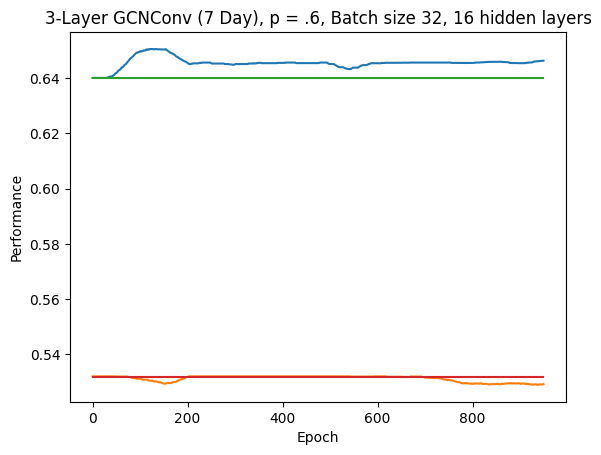

In [486]:
#Plot with baselines.
import matplotlib.pyplot as plt
import numpy as np

window = 50
average_train = []
train_baseline = []
test_baseline = []
for ind in range(len(trainaccs) - window + 1):
    average_train.append(np.mean(trainaccs[ind:ind+window]))
    train_baseline.append(.64)
    test_baseline.append(.532)
average_test = []
for ind in range(len(testaccs) - window + 1):
    average_test.append(np.mean(testaccs[ind:ind+window]))

plt.plot(average_train) #blue
plt.plot(average_test) #orange
plt.plot(train_baseline) #green
plt.plot(test_baseline) #red
plt.xlabel('Epoch')
plt.ylabel('Performance')
#plt.title("3-Layer GCNConv (365 Day), p = .5, Batch size " + str(bs) + ", " + str(hd) + " hidden layers")
plt.title("3-Layer GCNConv (7 Day), p = .6, Batch size " + str(bs) + ", " + str(hd) + " hidden layers")


plt.show()

In [320]:
y_basic_sentiment = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.07955000000000001, 0.0, 0.18579999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3817999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13660000000000005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.105375, 0.0, 0.0, 0.0, 0.4018999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4939, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7429999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.28689999999999993, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.128, -0.128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1646333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10115000000000007, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4215, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10606666666666675, 0.0, 0.0, 0.0, -0.13660000000000005, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.13790000000000013, 0.0, 0.0, 0.0, 0.0, -0.11333333333333329, 0.0, 0.0, -0.13660000000000005, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.19090000000000007, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.29600000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29600000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6369, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.128, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.29600000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.36119999999999997, -0.36119999999999997, -0.0, 0.0, -0.11399999999999999, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.4018999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.29600000000000004, -0.0, 0.0, -0.0, 0.4588, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.29600000000000004, -0.27869999999999995, -0.27869999999999995, 0.0, 0.2732, -0.0, 0.0, 0.0, 0.0, -0.3817999999999999, 0.0, 0.0, -0.09866666666666668, 0.0, 0.0, 0.0, 0.7505999999999999, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025800000000000045, 0.0, -0.0, 0.0, -0.0, -0.0, 0.29600000000000004, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6249, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20229999999999992, 0.3679999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.20229999999999992, 0.0, 0.0, 0.0, 0.2732000000000001, 0.0, 0.0, 0.5423, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3817999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2859499999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6497666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5267, 0.0, 0.0, 0.24695, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5794666666666668, 0.0, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2732000000000001, 0.0, 0.10620000000000007, 0.5794666666666668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23835000000000006, 0.090225, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.4018999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5798999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.09866666666666668, -0.09866666666666668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.3056000000000001, -0.3056000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5994000000000002, 0.0, 0.0, 0.5622, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2732000000000001, 0.0, 0.0, 0.0, 0.0, 0.22629999999999995, 0.0, 0.0, 0.5106000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.3763500000000002, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.06400000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0625, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5106000000000002, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2629999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.19090000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3817999999999999, 0.0, 0.0, 0.0, 0.15293333333333337, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3817999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.44033333333333324, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.184925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
y_b_s_preds = []
for i in range(len(y_basic_sentiment)):
    if y_basic_sentiment[i] < 0:
        y_b_s_preds.append(0)
    else:
        y_b_s_preds.append(1)

In [324]:
#Get accuracy of the basic sentiment baseline
correct = 0
total = 0
for i in range(0,900):
    if dataset[i].y == y_b_s_preds[i]:
        correct = correct + 1
    total = total + 1
print(correct/total)

0.6355555555555555


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 